In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dset
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, models, transforms
import os
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import time

In [3]:
batch_size = 100#batch_size will be used to get accuracy
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(96),
        transforms.CenterCrop(128),
        transforms.Grayscale(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(96),
        transforms.CenterCrop(128),
        transforms.Grayscale(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'validation': transforms.Compose([
        transforms.Resize(96),
        transforms.CenterCrop(128),
        transforms.Grayscale(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}
data_dir = 'data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train','test','validation']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size,
                                             shuffle=True,num_workers=4)
              for x in ['train','test','validation']}

In [4]:
class ConvNet_HBN_A(nn.Module):#original h_bn
    def __init__(self):
        super(ConvNet_HBN_A, self).__init__()
        self.all_losses = []
        self.test_accuracy = []
        self.train_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv1_bn = nn.BatchNorm2d(32)
            
        self.conv2 = nn.Conv2d(32, 32, 3, 1, 1)
        self.conv2_bn = nn.BatchNorm2d(32)
        
        self.conv3 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3_bn = nn.BatchNorm2d(64)
        
        self.conv4 = nn.Conv2d(64, 64, 3, 1, 1)
        self.conv4_bn = nn.BatchNorm2d(64)
        
        self.conv5 = nn.Conv2d(64, 128, 3, 1, 1)
        self.conv5_bn = nn.BatchNorm2d(128)
        
        self.conv6 = nn.Conv2d(128, 128, 3, 1, 1)
        self.conv6_bn = nn.BatchNorm2d(128)
        
        self.conv7 = nn.Conv2d(128, 256, 3, 1, 1)
        self.conv7_bn = nn.BatchNorm2d(256)
        
        self.conv8 = nn.Conv2d(256, 256, 3, 1, 1)
        self.conv8_bn = nn.BatchNorm2d(256)
        
        self.conv9 = nn.Conv2d(256, 256, 3, 1, 1)
        self.conv9_bn = nn.BatchNorm2d(256)
        
        self.conv10 = nn.Conv2d(256, 256, 3, 1, 1)
        self.conv10_bn = nn.BatchNorm2d(256)
        
        self.fc1 = nn.Linear(8*8*256, 4000)
        self.fc2 = nn.Linear(4000, 2048)
        self.fc3 = nn.Linear(2048, 1024)
        self.fc4 = nn.Linear(1024, 1024)
        self.fc5 = nn.Linear(1024, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)#input size, no need to change if input image doesn't change its size
        x = F.relu(self.conv1_bn(self.conv1(x)))
        x = F.max_pool2d(F.relu(self.conv2_bn(self.conv2(x))), 2, 2)
        x = F.relu(self.conv3_bn(self.conv3(x)))
        x = F.max_pool2d(F.relu(self.conv4_bn(self.conv4(x))), 2, 2)
        x = F.relu(self.conv5_bn(self.conv5(x)))
        x = F.max_pool2d(F.relu(self.conv6_bn(self.conv6(x))), 2, 2)
        x = F.relu(self.conv7_bn(self.conv7(x)))
        x = F.relu(self.conv8_bn(self.conv8(x)))
        x = F.relu(self.conv9_bn(self.conv9(x)))
        x = F.max_pool2d(F.relu(self.conv10_bn(self.conv10(x))), 2, 2)
        x = x.view(-1, 8*8*256)#3 Maxpooling from 128 down sampled to 16, 128 is channel of last Conv output not size 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return F.log_softmax(x, dim = 1)

In [5]:
# class ConvNet_HBN_B(nn.Module):#h_bn double all channels
#     def __init__(self):
#         super(ConvNet_HBN_B, self).__init__()
#         self.all_losses = []
#         self.test_accuracy = []
#         self.train_accuracy = []
#         self.conv1 = nn.Conv2d(1, 64, 3, 1, 1) 
#         self.conv1_bn = nn.BatchNorm2d(64)
            
#         self.conv2 = nn.Conv2d(64, 64, 3, 1, 1)
#         self.conv2_bn = nn.BatchNorm2d(64)
        
#         self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
#         self.conv3_bn = nn.BatchNorm2d(128)
        
#         self.conv4 = nn.Conv2d(128, 128, 3, 1, 1)
#         self.conv4_bn = nn.BatchNorm2d(128)
        
#         self.conv5 = nn.Conv2d(128, 256, 3, 1, 1)
#         self.conv5_bn = nn.BatchNorm2d(256)
        
#         self.conv6 = nn.Conv2d(256, 256, 3, 1, 1)
#         self.conv6_bn = nn.BatchNorm2d(256)
        
#         self.conv7 = nn.Conv2d(256, 512, 3, 1, 1)
#         self.conv7_bn = nn.BatchNorm2d(512)
        
#         self.conv8 = nn.Conv2d(512, 512, 3, 1, 1)
#         self.conv8_bn = nn.BatchNorm2d(512)
        
#         self.conv9 = nn.Conv2d(512, 512, 3, 1, 1)
#         self.conv9_bn = nn.BatchNorm2d(512)
        
#         self.conv10 = nn.Conv2d(512, 512, 3, 1, 1)
#         self.conv10_bn = nn.BatchNorm2d(512)
        
#         self.fc1 = nn.Linear(8*8*512, 1024)
#         self.fc2 = nn.Linear(1024, 512)
#         self.fc3 = nn.Linear(512, 512)
#         self.fc4 = nn.Linear(512, 100)

#     def forward(self, x):
#         x = x.view(-1,1,128,128)#input size, no need to change if input image doesn't change its size
#         x = F.relu(self.conv1_bn(self.conv1(x)))
#         x = F.max_pool2d(F.relu(self.conv2_bn(self.conv2(x))), 2, 2)
#         x = F.relu(self.conv3_bn(self.conv3(x)))
#         x = F.max_pool2d(F.relu(self.conv4_bn(self.conv4(x))), 2, 2)
#         x = F.relu(self.conv5_bn(self.conv5(x)))
#         x = F.max_pool2d(F.relu(self.conv6_bn(self.conv6(x))), 2, 2)
#         x = F.relu(self.conv7_bn(self.conv7(x)))
#         x = F.relu(self.conv8_bn(self.conv8(x)))
#         x = F.relu(self.conv9_bn(self.conv9(x)))
#         x = F.max_pool2d(F.relu(self.conv10_bn(self.conv10(x))), 2, 2)
#         x = x.view(-1, 8*8*512)#3 Maxpooling from 128 down sampled to 16, 128 is channel of last Conv output not size 
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = F.relu(self.fc3(x))
#         x = self.fc4(x)
#         return F.log_softmax(x, dim = 1)

In [6]:
class ConvNet_HBN_C(nn.Module):#h_bn with drop-out = 0.2
    def __init__(self):
        super(ConvNet_HBN_C, self).__init__()
        self.all_losses = []
        self.test_accuracy = []
        self.train_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv1_drop = nn.Dropout(0.2)#set dropout ratio=0.2
        self.conv1_bn = nn.BatchNorm2d(32)
            
        self.conv2 = nn.Conv2d(32, 32, 3, 1, 1)
        self.conv2_drop = nn.Dropout(0.2)#set dropout ratio=0.2
        self.conv2_bn = nn.BatchNorm2d(32)
        
        self.conv3 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3_drop = nn.Dropout(0.2)#set dropout ratio=0.2
        self.conv3_bn = nn.BatchNorm2d(64)
        
        self.conv4 = nn.Conv2d(64, 64, 3, 1, 1)
        self.conv4_drop = nn.Dropout(0.2)#set dropout ratio=0.2
        self.conv4_bn = nn.BatchNorm2d(64)
        
        self.conv5 = nn.Conv2d(64, 128, 3, 1, 1)
        self.conv5_drop = nn.Dropout(0.2)#set dropout ratio=0.2
        self.conv5_bn = nn.BatchNorm2d(128)
        
        self.conv6 = nn.Conv2d(128, 128, 3, 1, 1)
        self.conv6_drop = nn.Dropout(0.2)#set dropout ratio=0.2
        self.conv6_bn = nn.BatchNorm2d(128)
        
        self.conv7 = nn.Conv2d(128, 256, 3, 1, 1)
        self.conv7_drop = nn.Dropout(0.2)#set dropout ratio=0.2
        self.conv7_bn = nn.BatchNorm2d(256)
        
        self.conv8 = nn.Conv2d(256, 256, 3, 1, 1)
        self.conv8_drop = nn.Dropout(0.2)#set dropout ratio=0.2
        self.conv8_bn = nn.BatchNorm2d(256)
        
        self.conv9 = nn.Conv2d(256, 256, 3, 1, 1)
        self.conv9_drop = nn.Dropout(0.2)#set dropout ratio=0.2
        self.conv9_bn = nn.BatchNorm2d(256)
        
        self.conv10 = nn.Conv2d(256, 256, 3, 1, 1)
        self.conv10_drop = nn.Dropout(0.2)#set dropout ratio=0.2
        self.conv10_bn = nn.BatchNorm2d(256)
        
        self.fc1 = nn.Linear(8*8*256, 1024)
        self.fc1_drop = nn.Dropout(0.2)#set dropout ratio=0.2
        self.fc2 = nn.Linear(1024, 512)
        self.fc2_drop = nn.Dropout(0.2)#set dropout ratio=0.2
        self.fc3 = nn.Linear(512, 512)
        self.fc3_drop = nn.Dropout(0.2)#set dropout ratio=0.2
        self.fc4 = nn.Linear(512, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)#input size, no need to change if input image doesn't change its size
        x = F.relu(self.conv1_drop(self.conv1_bn(self.conv1(x))))
        x = F.max_pool2d(F.relu(self.conv2_drop(self.conv2_bn(self.conv2(x)))), 2, 2)
        x = F.relu(self.conv3_drop(self.conv3_bn(self.conv3(x))))
        x = F.max_pool2d(F.relu(self.conv4_drop(self.conv4_bn(self.conv4(x)))), 2, 2)
        x = F.relu(self.conv5_drop(self.conv5_bn(self.conv5(x))))
        x = F.max_pool2d(F.relu(self.conv6_drop(self.conv6_bn(self.conv6(x)))), 2, 2)
        x = F.relu(self.conv7_drop(self.conv7_bn(self.conv7(x))))
        x = F.relu(self.conv8_drop(self.conv8_bn(self.conv8(x))))
        x = F.relu(self.conv9_drop(self.conv9_bn(self.conv9(x))))
        x = F.max_pool2d(F.relu(self.conv10_drop(self.conv10_bn(self.conv10(x)))), 2, 2)
        x = x.view(-1, 8*8*256)#3 Maxpooling from 128 down sampled to 16, 128 is channel of last Conv output not size 
        x = F.relu(self.fc1_drop(self.fc1(x)))
        x = F.relu(self.fc2_drop(self.fc2(x)))
        x = F.relu(self.fc3_drop(self.fc3(x)))
        x = self.fc4(x)
        return F.log_softmax(x, dim = 1)

In [7]:
class ConvNet_HBN_D(nn.Module):#h_bn with xavier-init
    def __init__(self):
        super(ConvNet_HBN_D, self).__init__()
        self.all_losses = []
        self.test_accuracy = []
        self.train_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        nn.init.xavier_uniform(self.conv1.weight)#xavier initialization: Var(W)=1/n(in) 
        self.conv1_bn = nn.BatchNorm2d(32)
            
        self.conv2 = nn.Conv2d(32, 32, 3, 1, 1)
        nn.init.xavier_uniform(self.conv2.weight)#xavier initialization: Var(W)=1/n(in) 
        self.conv2_bn = nn.BatchNorm2d(32)
        
        self.conv3 = nn.Conv2d(32, 64, 3, 1, 1)
        nn.init.xavier_uniform(self.conv3.weight)#xavier initialization: Var(W)=1/n(in) 
        self.conv3_bn = nn.BatchNorm2d(64)
        
        self.conv4 = nn.Conv2d(64, 64, 3, 1, 1)
        nn.init.xavier_uniform(self.conv4.weight)#xavier initialization: Var(W)=1/n(in) 
        self.conv4_bn = nn.BatchNorm2d(64)
        
        self.conv5 = nn.Conv2d(64, 128, 3, 1, 1)
        nn.init.xavier_uniform(self.conv5.weight)#xavier initialization: Var(W)=1/n(in) 
        self.conv5_bn = nn.BatchNorm2d(128)
        
        self.conv6 = nn.Conv2d(128, 128, 3, 1, 1)
        nn.init.xavier_uniform(self.conv6.weight)#xavier initialization: Var(W)=1/n(in) 
        self.conv6_bn = nn.BatchNorm2d(128)
        
        self.conv7 = nn.Conv2d(128, 256, 3, 1, 1)
        nn.init.xavier_uniform(self.conv7.weight)#xavier initialization: Var(W)=1/n(in) 
        self.conv7_bn = nn.BatchNorm2d(256)
        
        self.conv8 = nn.Conv2d(256, 256, 3, 1, 1)
        nn.init.xavier_uniform(self.conv8.weight)#xavier initialization: Var(W)=1/n(in) 
        self.conv8_bn = nn.BatchNorm2d(256)
        
        self.conv9 = nn.Conv2d(256, 256, 3, 1, 1)
        nn.init.xavier_uniform(self.conv9.weight)#xavier initialization: Var(W)=1/n(in) 
        self.conv9_bn = nn.BatchNorm2d(256)
        
        self.conv10 = nn.Conv2d(256, 256, 3, 1, 1)
        nn.init.xavier_uniform(self.conv10.weight)#xavier initialization: Var(W)=1/n(in) 
        self.conv10_bn = nn.BatchNorm2d(256)
        
        self.fc1 = nn.Linear(8*8*256, 4000)
        nn.init.xavier_uniform(self.fc1.weight)#xavier initialization: Var(W)=1/n(in) 
        self.fc2 = nn.Linear(4000, 2048)
        nn.init.xavier_uniform(self.fc2.weight)#xavier initialization: Var(W)=1/n(in) 
        self.fc3 = nn.Linear(2048, 1024)
        nn.init.xavier_uniform(self.fc3.weight)#xavier initialization: Var(W)=1/n(in) 
        self.fc4 = nn.Linear(1024, 1024)
        nn.init.xavier_uniform(self.fc4.weight)#xavier initialization: Var(W)=1/n(in) 
        self.fc5 = nn.Linear(1024, 100)
        nn.init.xavier_uniform(self.fc5.weight)#xavier initialization: Var(W)=1/n(in) 

    def forward(self, x):
        x = x.view(-1,1,128,128)#input size, no need to change if input image doesn't change its size
        x = F.relu(self.conv1_bn(self.conv1(x)))
        x = F.max_pool2d(F.relu(self.conv2_bn(self.conv2(x))), 2, 2)
        x = F.relu(self.conv3_bn(self.conv3(x)))
        x = F.max_pool2d(F.relu(self.conv4_bn(self.conv4(x))), 2, 2)
        x = F.relu(self.conv5_bn(self.conv5(x)))
        x = F.max_pool2d(F.relu(self.conv6_bn(self.conv6(x))), 2, 2)
        x = F.relu(self.conv7_bn(self.conv7(x)))
        x = F.relu(self.conv8_bn(self.conv8(x)))
        x = F.relu(self.conv9_bn(self.conv9(x)))
        x = F.max_pool2d(F.relu(self.conv10_bn(self.conv10(x))), 2, 2)
        x = x.view(-1, 8*8*256)#3 Maxpooling from 128 down sampled to 16, 128 is channel of last Conv output not size 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return F.log_softmax(x, dim = 1)

In [8]:
class ConvNet_HBN_E(nn.Module):#h_bn with drop-out = 0.5 
    def __init__(self):
        super(ConvNet_HBN_E, self).__init__()
        self.all_losses = []
        self.test_accuracy = []
        self.train_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv1_drop = nn.Dropout(0.5)#set dropout ratio=0.5
        self.conv1_bn = nn.BatchNorm2d(32)
            
        self.conv2 = nn.Conv2d(32, 32, 3, 1, 1)
        self.conv2_drop = nn.Dropout(0.5)#set dropout ratio=0.5
        self.conv2_bn = nn.BatchNorm2d(32)
        
        self.conv3 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3_drop = nn.Dropout(0.5)#set dropout ratio=0.5
        self.conv3_bn = nn.BatchNorm2d(64)
        
        self.conv4 = nn.Conv2d(64, 64, 3, 1, 1)
        self.conv4_drop = nn.Dropout(0.5)#set dropout ratio=0.5
        self.conv4_bn = nn.BatchNorm2d(64)
        
        self.conv5 = nn.Conv2d(64, 128, 3, 1, 1)
        self.conv5_drop = nn.Dropout(0.5)#set dropout ratio=0.5
        self.conv5_bn = nn.BatchNorm2d(128)
        
        self.conv6 = nn.Conv2d(128, 128, 3, 1, 1)
        self.conv6_drop = nn.Dropout(0.5)#set dropout ratio=0.5
        self.conv6_bn = nn.BatchNorm2d(128)
        
        self.conv7 = nn.Conv2d(128, 256, 3, 1, 1)
        self.conv7_drop = nn.Dropout(0.5)#set dropout ratio=0.5
        self.conv7_bn = nn.BatchNorm2d(256)
        
        self.conv8 = nn.Conv2d(256, 256, 3, 1, 1)
        self.conv8_drop = nn.Dropout(0.5)#set dropout ratio=0.5
        self.conv8_bn = nn.BatchNorm2d(256)
        
        self.conv9 = nn.Conv2d(256, 256, 3, 1, 1)
        self.conv9_drop = nn.Dropout(0.5)#set dropout ratio=0.5
        self.conv9_bn = nn.BatchNorm2d(256)
        
        self.conv10 = nn.Conv2d(256, 256, 3, 1, 1)
        self.conv10_drop = nn.Dropout(0.5)#set dropout ratio=0.5
        self.conv10_bn = nn.BatchNorm2d(256)
        
        self.fc1 = nn.Linear(8*8*256, 1024)
        self.fc1_drop = nn.Dropout(0.5)#set dropout ratio=0.5
        self.fc2 = nn.Linear(1024, 512)
        self.fc2_drop = nn.Dropout(0.5)#set dropout ratio=0.5
        self.fc3 = nn.Linear(512, 512)
        self.fc3_drop = nn.Dropout(0.5)#set dropout ratio=0.5
        self.fc4 = nn.Linear(512, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)#input size, no need to change if input image doesn't change its size
        x = F.relu(self.conv1_drop(self.conv1_bn(self.conv1(x))))
        x = F.max_pool2d(F.relu(self.conv2_drop(self.conv2_bn(self.conv2(x)))), 2, 2)
        x = F.relu(self.conv3_drop(self.conv3_bn(self.conv3(x))))
        x = F.max_pool2d(F.relu(self.conv4_drop(self.conv4_bn(self.conv4(x)))), 2, 2)
        x = F.relu(self.conv5_drop(self.conv5_bn(self.conv5(x))))
        x = F.max_pool2d(F.relu(self.conv6_drop(self.conv6_bn(self.conv6(x)))), 2, 2)
        x = F.relu(self.conv7_drop(self.conv7_bn(self.conv7(x))))
        x = F.relu(self.conv8_drop(self.conv8_bn(self.conv8(x))))
        x = F.relu(self.conv9_drop(self.conv9_bn(self.conv9(x))))
        x = F.max_pool2d(F.relu(self.conv10_drop(self.conv10_bn(self.conv10(x)))), 2, 2)
        x = x.view(-1, 8*8*256)#3 Maxpooling from 128 down sampled to 16, 128 is channel of last Conv output not size 
        x = F.relu(self.fc1_drop(self.fc1(x)))
        x = F.relu(self.fc2_drop(self.fc2(x)))
        x = F.relu(self.fc3_drop(self.fc3(x)))
        x = self.fc4(x)
        return F.log_softmax(x, dim = 1)

In [9]:
# class ConvNet_HBN_F(nn.Module):#h_bn with drop-out = 0.2, xavier-init, double channel
#     def __init__(self):
#         super(ConvNet_HBN_F, self).__init__()
#         self.all_losses = []
#         self.test_accuracy = []
#         self.train_accuracy = []
#         self.conv1 = nn.Conv2d(1, 64, 3, 1, 1) 
#         nn.init.xavier_uniform(self.conv1.weight)#xavier initialization: Var(W)=1/n(in) 
#         self.conv1_drop = nn.Dropout(0.2)#set dropout ratio=0.2
#         self.conv1_bn = nn.BatchNorm2d(64)
            
#         self.conv2 = nn.Conv2d(64, 64, 3, 1, 1)
#         nn.init.xavier_uniform(self.conv2.weight)#xavier initialization: Var(W)=1/n(in) 
#         self.conv2_drop = nn.Dropout(0.2)#set dropout ratio=0.2
#         self.conv2_bn = nn.BatchNorm2d(64)
        
#         self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
#         nn.init.xavier_uniform(self.conv3.weight)#xavier initialization: Var(W)=1/n(in) 
#         self.conv3_drop = nn.Dropout(0.2)#set dropout ratio=0.2
#         self.conv3_bn = nn.BatchNorm2d(128)
        
#         self.conv4 = nn.Conv2d(128, 128, 3, 1, 1)
#         nn.init.xavier_uniform(self.conv4.weight)#xavier initialization: Var(W)=1/n(in) 
#         self.conv4_drop = nn.Dropout(0.2)#set dropout ratio=0.2
#         self.conv4_bn = nn.BatchNorm2d(128)
        
#         self.conv5 = nn.Conv2d(128, 256, 3, 1, 1)
#         nn.init.xavier_uniform(self.conv5.weight)#xavier initialization: Var(W)=1/n(in) 
#         self.conv5_drop = nn.Dropout(0.2)#set dropout ratio=0.2
#         self.conv5_bn = nn.BatchNorm2d(256)
        
#         self.conv6 = nn.Conv2d(256, 256, 3, 1, 1)
#         nn.init.xavier_uniform(self.conv6.weight)#xavier initialization: Var(W)=1/n(in) 
#         self.conv6_drop = nn.Dropout(0.2)#set dropout ratio=0.2
#         self.conv6_bn = nn.BatchNorm2d(256)
        
#         self.conv7 = nn.Conv2d(256, 512, 3, 1, 1)
#         nn.init.xavier_uniform(self.conv7.weight)#xavier initialization: Var(W)=1/n(in) 
#         self.conv7_drop = nn.Dropout(0.2)#set dropout ratio=0.2
#         self.conv7_bn = nn.BatchNorm2d(512)
        
#         self.conv8 = nn.Conv2d(512, 512, 3, 1, 1)
#         nn.init.xavier_uniform(self.conv8.weight)#xavier initialization: Var(W)=1/n(in) 
#         self.conv8_drop = nn.Dropout(0.2)#set dropout ratio=0.2
#         self.conv8_bn = nn.BatchNorm2d(512)
        
#         self.conv9 = nn.Conv2d(512, 512, 3, 1, 1)
#         nn.init.xavier_uniform(self.conv9.weight)#xavier initialization: Var(W)=1/n(in) 
#         self.conv9_drop = nn.Dropout(0.2)#set dropout ratio=0.2
#         self.conv9_bn = nn.BatchNorm2d(512)
        
#         self.conv10 = nn.Conv2d(512, 512, 3, 1, 1)
#         nn.init.xavier_uniform(self.conv10.weight)#xavier initialization: Var(W)=1/n(in) 
#         self.conv10_drop = nn.Dropout(0.2)#set dropout ratio=0.2
#         self.conv10_bn = nn.BatchNorm2d(512)
        
#         self.fc1 = nn.Linear(8*8*512, 4000)
#         nn.init.xavier_uniform(self.fc1.weight)#xavier initialization: Var(W)=1/n(in) 
#         self.fc2 = nn.Linear(4000, 2048)
#         nn.init.xavier_uniform(self.fc2.weight)#xavier initialization: Var(W)=1/n(in) 
#         self.fc2_drop = nn.Dropout(0.2)#set dropout ratio=0.2
#         self.fc3 = nn.Linear(2048, 1024)
#         nn.init.xavier_uniform(self.fc3.weight)#xavier initialization: Var(W)=1/n(in) 
#         self.fc3_drop = nn.Dropout(0.2)#set dropout ratio=0.2
#         self.fc4 = nn.Linear(1024, 1024)
#         nn.init.xavier_uniform(self.fc4.weight)#xavier initialization: Var(W)=1/n(in) 
#         self.fc4_drop = nn.Dropout(0.2)#set dropout ratio=0.2
#         self.fc5 = nn.Linear(1024, 100)
#         nn.init.xavier_uniform(self.fc5.weight)#xavier initialization: Var(W)=1/n(in) 

#     def forward(self, x):
#         x = x.view(-1,1,128,128)#input size, no need to change if input image doesn't change its size
#         x = F.relu(self.conv1_drop(self.conv1_bn(self.conv1(x))))
#         x = F.max_pool2d(F.relu(self.conv2_drop(self.conv2_bn(self.conv2(x)))), 2, 2)
#         x = F.relu(self.conv3_drop(self.conv3_bn(self.conv3(x))))
#         x = F.max_pool2d(F.relu(self.conv4_drop(self.conv4_bn(self.conv4(x)))), 2, 2)
#         x = F.relu(self.conv5_drop(self.conv5_bn(self.conv5(x))))
#         x = F.max_pool2d(F.relu(self.conv6_drop(self.conv6_bn(self.conv6(x)))), 2, 2)
#         x = F.relu(self.conv7_drop(self.conv7_bn(self.conv7(x))))
#         x = F.relu(self.conv8_drop(self.conv8_bn(self.conv8(x))))
#         x = F.relu(self.conv9_drop(self.conv9_bn(self.conv9(x))))
#         x = F.max_pool2d(F.relu(self.conv10_drop(self.conv10_bn(self.conv10(x)))), 2, 2)
#         x = x.view(-1, 8*8*512)#3 Maxpooling from 128 down sampled to 16, 128 is channel of last Conv output not size 
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2_drop(self.fc2(x)))
#         x = F.relu(self.fc3_drop(self.fc3(x)))
#         x = F.relu(self.fc4_drop(self.fc4(x)))
#         x = self.fc5(x)
#         return F.log_softmax(x, dim = 1)

In [10]:
def AccuracyHelper(model,dataset):
    count = 0
    for batch_idx, (data,target) in enumerate(dataset):
        data, target = Variable(data.cuda()), Variable(target.cuda())
        y_pred = model(data)#model
        prediction = torch.max(F.softmax(y_pred, dim = 1), 1)[1]
        pred_y = prediction.cpu().data.numpy().squeeze()
        target_y = target.cpu().data.numpy()
        count += sum(pred_y == target_y)
    accuracy = float(count)/float(batch_size*len(dataset))
    model.test_accuracy.append(accuracy)
    print('accuracy on test set: {:.3f}%'.format(100*accuracy),count)

In [11]:
class Training():
    def __init__(self,dataloaders,ConvNet,lr = 0.01, epoch = 50):
        self.criteria = nn.CrossEntropyLoss()
        self.model = ConvNet
        self.optimizer = optim.SGD(ConvNet.parameters(), lr=lr, momentum=0.9)
        self.log_interval=10#log_interval * batch_size = the number of displayed samples
        self.epoch = epoch
        self.data = dataloaders
        self.ConvNet = ConvNet
        
    def start(self):
        for epoch in range(self.epoch):#set epoch of iteration
            for batch_idx, (data,target) in enumerate(self.data['train']):
                data, target = Variable(data.cuda()), Variable(target.cuda())#turn x,y from tensors to Variables
                y_pred = self.model(data)#feed x, return prediction on the sample
                prediction = torch.max(F.softmax(y_pred), 1)[1]
                pred_y = prediction.cpu().data.numpy().squeeze()
                target_y = target.cpu().data.numpy()
                loss = self.criteria(y_pred, target)#cal loss
                self.optimizer.zero_grad()#set all gradient to 0
                loss.backward()#begin backprop
                self.optimizer.step()#cal grad
                if batch_idx % self.log_interval == 0:#display progress
                    accuracy = sum(pred_y == target_y) / 100.0
                    self.ConvNet.all_losses.append(loss.data[0])
                    self.ConvNet.train_accuracy.append(accuracy)
                    print('Train Epoch: {} [{}/{} ({:.3f}%)]\tLoss: {:.6f}\tAccuracy: {:.3f}'.format(
                        epoch, batch_size*batch_idx, batch_size*len(self.data['train']),
                        100. * batch_idx / len(self.data['train']), loss.data[0], accuracy))
            AccuracyHelper(self.model,self.data['test'])

In [12]:
model_l6_a = ConvNet_HBN_A()
model_l6_a.cuda()
model_l6_c = ConvNet_HBN_C()
model_l6_c.cuda()
model_l6_d = ConvNet_HBN_D()
model_l6_d.cuda()
model_l6_e = ConvNet_HBN_E()
model_l6_e.cuda()
model_l6_b = ConvNet_HBN_A()
model_l6_b.cuda()
model_l6_f = ConvNet_HBN_A()
model_l6_f.cuda()
model_l6_g = ConvNet_HBN_A()
model_l6_g.cuda()
model_l6_h = ConvNet_HBN_A()
model_l6_h.cuda()
model_l6_i = ConvNet_HBN_A()
model_l6_i.cuda()

ConvNet_HBN_A(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (conv5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
  (conv6): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
  (conv7): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv7_bn): BatchNorm2d(256, e

In [14]:
start_time = time.time()
train = Training(dataloaders, model_l6_a,0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/38000 (0.000%)]	Loss: 4.605594	Accuracy: 0.000
Train Epoch: 0 [1000/38000 (2.632%)]	Loss: 4.604867	Accuracy: 0.010
Train Epoch: 0 [2000/38000 (5.263%)]	Loss: 4.603266	Accuracy: 0.000
Train Epoch: 0 [3000/38000 (7.895%)]	Loss: 4.609121	Accuracy: 0.000
Train Epoch: 0 [4000/38000 (10.526%)]	Loss: 4.606968	Accuracy: 0.000
Train Epoch: 0 [5000/38000 (13.158%)]	Loss: 4.602581	Accuracy: 0.000
Train Epoch: 0 [6000/38000 (15.789%)]	Loss: 4.610380	Accuracy: 0.010
Train Epoch: 0 [7000/38000 (18.421%)]	Loss: 4.603552	Accuracy: 0.020
Train Epoch: 0 [8000/38000 (21.053%)]	Loss: 4.592566	Accuracy: 0.020
Train Epoch: 0 [9000/38000 (23.684%)]	Loss: 4.603222	Accuracy: 0.020
Train Epoch: 0 [10000/38000 (26.316%)]	Loss: 4.596807	Accuracy: 0.020
Train Epoch: 0 [11000/38000 (28.947%)]	Loss: 4.599082	Accuracy: 0.030
Train Epoch: 0 [12000/38000 (31.579%)]	Loss: 4.599354	Accuracy: 0.030
Train Epoch: 0 [13000/38000 (34.211%)]	Loss: 4.607374	Accuracy: 0.020
Train Epoch: 0 [14000/38000 (36.842%)

Train Epoch: 3 [3000/38000 (7.895%)]	Loss: 0.979913	Accuracy: 0.720
Train Epoch: 3 [4000/38000 (10.526%)]	Loss: 0.945247	Accuracy: 0.740
Train Epoch: 3 [5000/38000 (13.158%)]	Loss: 0.986701	Accuracy: 0.740
Train Epoch: 3 [6000/38000 (15.789%)]	Loss: 0.640579	Accuracy: 0.820
Train Epoch: 3 [7000/38000 (18.421%)]	Loss: 1.206897	Accuracy: 0.720
Train Epoch: 3 [8000/38000 (21.053%)]	Loss: 0.930077	Accuracy: 0.760
Train Epoch: 3 [9000/38000 (23.684%)]	Loss: 0.989488	Accuracy: 0.790
Train Epoch: 3 [10000/38000 (26.316%)]	Loss: 0.705596	Accuracy: 0.790
Train Epoch: 3 [11000/38000 (28.947%)]	Loss: 0.905312	Accuracy: 0.740
Train Epoch: 3 [12000/38000 (31.579%)]	Loss: 0.723620	Accuracy: 0.830
Train Epoch: 3 [13000/38000 (34.211%)]	Loss: 0.684648	Accuracy: 0.790
Train Epoch: 3 [14000/38000 (36.842%)]	Loss: 0.914588	Accuracy: 0.770
Train Epoch: 3 [15000/38000 (39.474%)]	Loss: 0.828336	Accuracy: 0.810
Train Epoch: 3 [16000/38000 (42.105%)]	Loss: 1.022865	Accuracy: 0.740
Train Epoch: 3 [17000/38000 

Train Epoch: 6 [6000/38000 (15.789%)]	Loss: 0.129445	Accuracy: 0.980
Train Epoch: 6 [7000/38000 (18.421%)]	Loss: 0.552119	Accuracy: 0.850
Train Epoch: 6 [8000/38000 (21.053%)]	Loss: 0.391649	Accuracy: 0.860
Train Epoch: 6 [9000/38000 (23.684%)]	Loss: 0.502941	Accuracy: 0.880
Train Epoch: 6 [10000/38000 (26.316%)]	Loss: 0.424090	Accuracy: 0.850
Train Epoch: 6 [11000/38000 (28.947%)]	Loss: 0.276239	Accuracy: 0.900
Train Epoch: 6 [12000/38000 (31.579%)]	Loss: 0.171395	Accuracy: 0.980
Train Epoch: 6 [13000/38000 (34.211%)]	Loss: 0.443076	Accuracy: 0.860
Train Epoch: 6 [14000/38000 (36.842%)]	Loss: 0.202898	Accuracy: 0.940
Train Epoch: 6 [15000/38000 (39.474%)]	Loss: 0.485827	Accuracy: 0.860
Train Epoch: 6 [16000/38000 (42.105%)]	Loss: 0.304700	Accuracy: 0.920
Train Epoch: 6 [17000/38000 (44.737%)]	Loss: 0.347798	Accuracy: 0.880
Train Epoch: 6 [18000/38000 (47.368%)]	Loss: 0.228856	Accuracy: 0.930
Train Epoch: 6 [19000/38000 (50.000%)]	Loss: 0.177538	Accuracy: 0.950
Train Epoch: 6 [20000/38

Train Epoch: 9 [9000/38000 (23.684%)]	Loss: 0.122037	Accuracy: 0.960
Train Epoch: 9 [10000/38000 (26.316%)]	Loss: 0.122957	Accuracy: 0.970
Train Epoch: 9 [11000/38000 (28.947%)]	Loss: 0.093802	Accuracy: 0.980
Train Epoch: 9 [12000/38000 (31.579%)]	Loss: 0.121308	Accuracy: 0.950
Train Epoch: 9 [13000/38000 (34.211%)]	Loss: 0.127435	Accuracy: 0.950
Train Epoch: 9 [14000/38000 (36.842%)]	Loss: 0.105168	Accuracy: 0.960
Train Epoch: 9 [15000/38000 (39.474%)]	Loss: 0.070448	Accuracy: 0.980
Train Epoch: 9 [16000/38000 (42.105%)]	Loss: 0.056745	Accuracy: 0.990
Train Epoch: 9 [17000/38000 (44.737%)]	Loss: 0.185488	Accuracy: 0.930
Train Epoch: 9 [18000/38000 (47.368%)]	Loss: 0.023704	Accuracy: 1.000
Train Epoch: 9 [19000/38000 (50.000%)]	Loss: 0.029172	Accuracy: 1.000
Train Epoch: 9 [20000/38000 (52.632%)]	Loss: 0.260803	Accuracy: 0.920
Train Epoch: 9 [21000/38000 (55.263%)]	Loss: 0.131129	Accuracy: 0.960
Train Epoch: 9 [22000/38000 (57.895%)]	Loss: 0.333786	Accuracy: 0.930
Train Epoch: 9 [23000

Train Epoch: 12 [11000/38000 (28.947%)]	Loss: 0.074541	Accuracy: 0.980
Train Epoch: 12 [12000/38000 (31.579%)]	Loss: 0.031495	Accuracy: 0.990
Train Epoch: 12 [13000/38000 (34.211%)]	Loss: 0.023289	Accuracy: 0.990
Train Epoch: 12 [14000/38000 (36.842%)]	Loss: 0.071995	Accuracy: 0.980
Train Epoch: 12 [15000/38000 (39.474%)]	Loss: 0.183931	Accuracy: 0.970
Train Epoch: 12 [16000/38000 (42.105%)]	Loss: 0.103650	Accuracy: 0.950
Train Epoch: 12 [17000/38000 (44.737%)]	Loss: 0.045417	Accuracy: 0.980
Train Epoch: 12 [18000/38000 (47.368%)]	Loss: 0.061334	Accuracy: 0.980
Train Epoch: 12 [19000/38000 (50.000%)]	Loss: 0.188299	Accuracy: 0.960
Train Epoch: 12 [20000/38000 (52.632%)]	Loss: 0.059765	Accuracy: 0.970
Train Epoch: 12 [21000/38000 (55.263%)]	Loss: 0.102142	Accuracy: 0.970
Train Epoch: 12 [22000/38000 (57.895%)]	Loss: 0.077117	Accuracy: 0.980
Train Epoch: 12 [23000/38000 (60.526%)]	Loss: 0.033463	Accuracy: 0.990
Train Epoch: 12 [24000/38000 (63.158%)]	Loss: 0.018388	Accuracy: 1.000
Train 

Train Epoch: 15 [12000/38000 (31.579%)]	Loss: 0.045082	Accuracy: 0.990
Train Epoch: 15 [13000/38000 (34.211%)]	Loss: 0.013310	Accuracy: 1.000
Train Epoch: 15 [14000/38000 (36.842%)]	Loss: 0.010970	Accuracy: 0.990
Train Epoch: 15 [15000/38000 (39.474%)]	Loss: 0.010276	Accuracy: 1.000
Train Epoch: 15 [16000/38000 (42.105%)]	Loss: 0.055706	Accuracy: 0.970
Train Epoch: 15 [17000/38000 (44.737%)]	Loss: 0.069498	Accuracy: 0.970
Train Epoch: 15 [18000/38000 (47.368%)]	Loss: 0.009852	Accuracy: 1.000
Train Epoch: 15 [19000/38000 (50.000%)]	Loss: 0.018182	Accuracy: 0.990
Train Epoch: 15 [20000/38000 (52.632%)]	Loss: 0.037750	Accuracy: 0.990
Train Epoch: 15 [21000/38000 (55.263%)]	Loss: 0.008822	Accuracy: 1.000
Train Epoch: 15 [22000/38000 (57.895%)]	Loss: 0.073897	Accuracy: 0.970
Train Epoch: 15 [23000/38000 (60.526%)]	Loss: 0.047095	Accuracy: 0.980
Train Epoch: 15 [24000/38000 (63.158%)]	Loss: 0.134962	Accuracy: 0.950
Train Epoch: 15 [25000/38000 (65.789%)]	Loss: 0.018271	Accuracy: 1.000
Train 

Train Epoch: 18 [13000/38000 (34.211%)]	Loss: 0.063919	Accuracy: 0.980
Train Epoch: 18 [14000/38000 (36.842%)]	Loss: 0.025643	Accuracy: 0.990
Train Epoch: 18 [15000/38000 (39.474%)]	Loss: 0.020875	Accuracy: 0.990
Train Epoch: 18 [16000/38000 (42.105%)]	Loss: 0.024233	Accuracy: 0.990
Train Epoch: 18 [17000/38000 (44.737%)]	Loss: 0.000571	Accuracy: 1.000
Train Epoch: 18 [18000/38000 (47.368%)]	Loss: 0.001669	Accuracy: 1.000
Train Epoch: 18 [19000/38000 (50.000%)]	Loss: 0.008352	Accuracy: 1.000
Train Epoch: 18 [20000/38000 (52.632%)]	Loss: 0.004239	Accuracy: 1.000
Train Epoch: 18 [21000/38000 (55.263%)]	Loss: 0.016201	Accuracy: 1.000
Train Epoch: 18 [22000/38000 (57.895%)]	Loss: 0.014318	Accuracy: 1.000
Train Epoch: 18 [23000/38000 (60.526%)]	Loss: 0.072769	Accuracy: 0.990
Train Epoch: 18 [24000/38000 (63.158%)]	Loss: 0.055482	Accuracy: 0.980
Train Epoch: 18 [25000/38000 (65.789%)]	Loss: 0.007890	Accuracy: 1.000
Train Epoch: 18 [26000/38000 (68.421%)]	Loss: 0.007490	Accuracy: 1.000
Train 

Train Epoch: 21 [14000/38000 (36.842%)]	Loss: 0.007878	Accuracy: 1.000
Train Epoch: 21 [15000/38000 (39.474%)]	Loss: 0.002895	Accuracy: 1.000
Train Epoch: 21 [16000/38000 (42.105%)]	Loss: 0.007935	Accuracy: 1.000
Train Epoch: 21 [17000/38000 (44.737%)]	Loss: 0.001922	Accuracy: 1.000
Train Epoch: 21 [18000/38000 (47.368%)]	Loss: 0.006735	Accuracy: 1.000
Train Epoch: 21 [19000/38000 (50.000%)]	Loss: 0.047893	Accuracy: 0.990
Train Epoch: 21 [20000/38000 (52.632%)]	Loss: 0.070159	Accuracy: 0.980
Train Epoch: 21 [21000/38000 (55.263%)]	Loss: 0.015863	Accuracy: 0.990
Train Epoch: 21 [22000/38000 (57.895%)]	Loss: 0.010133	Accuracy: 0.990
Train Epoch: 21 [23000/38000 (60.526%)]	Loss: 0.000400	Accuracy: 1.000
Train Epoch: 21 [24000/38000 (63.158%)]	Loss: 0.029596	Accuracy: 0.990
Train Epoch: 21 [25000/38000 (65.789%)]	Loss: 0.009112	Accuracy: 1.000
Train Epoch: 21 [26000/38000 (68.421%)]	Loss: 0.035993	Accuracy: 0.990
Train Epoch: 21 [27000/38000 (71.053%)]	Loss: 0.031451	Accuracy: 0.990
Train 

Train Epoch: 24 [15000/38000 (39.474%)]	Loss: 0.008482	Accuracy: 1.000
Train Epoch: 24 [16000/38000 (42.105%)]	Loss: 0.001951	Accuracy: 1.000
Train Epoch: 24 [17000/38000 (44.737%)]	Loss: 0.002255	Accuracy: 1.000
Train Epoch: 24 [18000/38000 (47.368%)]	Loss: 0.006045	Accuracy: 1.000
Train Epoch: 24 [19000/38000 (50.000%)]	Loss: 0.001400	Accuracy: 1.000
Train Epoch: 24 [20000/38000 (52.632%)]	Loss: 0.002934	Accuracy: 1.000
Train Epoch: 24 [21000/38000 (55.263%)]	Loss: 0.001882	Accuracy: 1.000
Train Epoch: 24 [22000/38000 (57.895%)]	Loss: 0.002942	Accuracy: 1.000
Train Epoch: 24 [23000/38000 (60.526%)]	Loss: 0.000336	Accuracy: 1.000
Train Epoch: 24 [24000/38000 (63.158%)]	Loss: 0.001098	Accuracy: 1.000
Train Epoch: 24 [25000/38000 (65.789%)]	Loss: 0.000719	Accuracy: 1.000
Train Epoch: 24 [26000/38000 (68.421%)]	Loss: 0.000616	Accuracy: 1.000
Train Epoch: 24 [27000/38000 (71.053%)]	Loss: 0.006985	Accuracy: 1.000
Train Epoch: 24 [28000/38000 (73.684%)]	Loss: 0.001973	Accuracy: 1.000
Train 

Train Epoch: 27 [16000/38000 (42.105%)]	Loss: 0.000101	Accuracy: 1.000
Train Epoch: 27 [17000/38000 (44.737%)]	Loss: 0.000131	Accuracy: 1.000
Train Epoch: 27 [18000/38000 (47.368%)]	Loss: 0.000089	Accuracy: 1.000
Train Epoch: 27 [19000/38000 (50.000%)]	Loss: 0.000133	Accuracy: 1.000
Train Epoch: 27 [20000/38000 (52.632%)]	Loss: 0.000057	Accuracy: 1.000
Train Epoch: 27 [21000/38000 (55.263%)]	Loss: 0.000089	Accuracy: 1.000
Train Epoch: 27 [22000/38000 (57.895%)]	Loss: 0.000086	Accuracy: 1.000
Train Epoch: 27 [23000/38000 (60.526%)]	Loss: 0.000091	Accuracy: 1.000
Train Epoch: 27 [24000/38000 (63.158%)]	Loss: 0.000067	Accuracy: 1.000
Train Epoch: 27 [25000/38000 (65.789%)]	Loss: 0.000241	Accuracy: 1.000
Train Epoch: 27 [26000/38000 (68.421%)]	Loss: 0.000084	Accuracy: 1.000
Train Epoch: 27 [27000/38000 (71.053%)]	Loss: 0.000166	Accuracy: 1.000
Train Epoch: 27 [28000/38000 (73.684%)]	Loss: 0.001505	Accuracy: 1.000
Train Epoch: 27 [29000/38000 (76.316%)]	Loss: 0.000078	Accuracy: 1.000
Train 

Train Epoch: 30 [17000/38000 (44.737%)]	Loss: 0.000014	Accuracy: 1.000
Train Epoch: 30 [18000/38000 (47.368%)]	Loss: 0.000035	Accuracy: 1.000
Train Epoch: 30 [19000/38000 (50.000%)]	Loss: 0.000031	Accuracy: 1.000
Train Epoch: 30 [20000/38000 (52.632%)]	Loss: 0.000042	Accuracy: 1.000
Train Epoch: 30 [21000/38000 (55.263%)]	Loss: 0.000049	Accuracy: 1.000
Train Epoch: 30 [22000/38000 (57.895%)]	Loss: 0.000044	Accuracy: 1.000
Train Epoch: 30 [23000/38000 (60.526%)]	Loss: 0.000194	Accuracy: 1.000
Train Epoch: 30 [24000/38000 (63.158%)]	Loss: 0.000087	Accuracy: 1.000
Train Epoch: 30 [25000/38000 (65.789%)]	Loss: 0.000059	Accuracy: 1.000
Train Epoch: 30 [26000/38000 (68.421%)]	Loss: 0.000039	Accuracy: 1.000
Train Epoch: 30 [27000/38000 (71.053%)]	Loss: 0.000009	Accuracy: 1.000
Train Epoch: 30 [28000/38000 (73.684%)]	Loss: 0.000019	Accuracy: 1.000
Train Epoch: 30 [29000/38000 (76.316%)]	Loss: 0.000025	Accuracy: 1.000
Train Epoch: 30 [30000/38000 (78.947%)]	Loss: 0.000027	Accuracy: 1.000
Train 

Train Epoch: 33 [18000/38000 (47.368%)]	Loss: 0.000015	Accuracy: 1.000
Train Epoch: 33 [19000/38000 (50.000%)]	Loss: 0.000041	Accuracy: 1.000
Train Epoch: 33 [20000/38000 (52.632%)]	Loss: 0.000038	Accuracy: 1.000
Train Epoch: 33 [21000/38000 (55.263%)]	Loss: 0.000034	Accuracy: 1.000
Train Epoch: 33 [22000/38000 (57.895%)]	Loss: 0.000033	Accuracy: 1.000
Train Epoch: 33 [23000/38000 (60.526%)]	Loss: 0.000037	Accuracy: 1.000
Train Epoch: 33 [24000/38000 (63.158%)]	Loss: 0.000046	Accuracy: 1.000
Train Epoch: 33 [25000/38000 (65.789%)]	Loss: 0.024919	Accuracy: 0.990
Train Epoch: 33 [26000/38000 (68.421%)]	Loss: 0.000025	Accuracy: 1.000
Train Epoch: 33 [27000/38000 (71.053%)]	Loss: 0.000031	Accuracy: 1.000
Train Epoch: 33 [28000/38000 (73.684%)]	Loss: 0.000061	Accuracy: 1.000
Train Epoch: 33 [29000/38000 (76.316%)]	Loss: 0.000017	Accuracy: 1.000
Train Epoch: 33 [30000/38000 (78.947%)]	Loss: 0.000014	Accuracy: 1.000
Train Epoch: 33 [31000/38000 (81.579%)]	Loss: 0.000025	Accuracy: 1.000
Train 

Train Epoch: 36 [19000/38000 (50.000%)]	Loss: 0.000045	Accuracy: 1.000
Train Epoch: 36 [20000/38000 (52.632%)]	Loss: 0.000059	Accuracy: 1.000
Train Epoch: 36 [21000/38000 (55.263%)]	Loss: 0.000018	Accuracy: 1.000
Train Epoch: 36 [22000/38000 (57.895%)]	Loss: 0.000010	Accuracy: 1.000
Train Epoch: 36 [23000/38000 (60.526%)]	Loss: 0.000012	Accuracy: 1.000
Train Epoch: 36 [24000/38000 (63.158%)]	Loss: 0.000048	Accuracy: 1.000
Train Epoch: 36 [25000/38000 (65.789%)]	Loss: 0.000040	Accuracy: 1.000
Train Epoch: 36 [26000/38000 (68.421%)]	Loss: 0.000024	Accuracy: 1.000
Train Epoch: 36 [27000/38000 (71.053%)]	Loss: 0.000012	Accuracy: 1.000
Train Epoch: 36 [28000/38000 (73.684%)]	Loss: 0.000026	Accuracy: 1.000
Train Epoch: 36 [29000/38000 (76.316%)]	Loss: 0.000070	Accuracy: 1.000
Train Epoch: 36 [30000/38000 (78.947%)]	Loss: 0.000021	Accuracy: 1.000
Train Epoch: 36 [31000/38000 (81.579%)]	Loss: 0.000019	Accuracy: 1.000
Train Epoch: 36 [32000/38000 (84.211%)]	Loss: 0.000055	Accuracy: 1.000
Train 

Train Epoch: 39 [20000/38000 (52.632%)]	Loss: 0.000031	Accuracy: 1.000
Train Epoch: 39 [21000/38000 (55.263%)]	Loss: 0.000005	Accuracy: 1.000
Train Epoch: 39 [22000/38000 (57.895%)]	Loss: 0.000014	Accuracy: 1.000
Train Epoch: 39 [23000/38000 (60.526%)]	Loss: 0.000023	Accuracy: 1.000
Train Epoch: 39 [24000/38000 (63.158%)]	Loss: 0.000019	Accuracy: 1.000
Train Epoch: 39 [25000/38000 (65.789%)]	Loss: 0.000011	Accuracy: 1.000
Train Epoch: 39 [26000/38000 (68.421%)]	Loss: 0.000031	Accuracy: 1.000
Train Epoch: 39 [27000/38000 (71.053%)]	Loss: 0.000039	Accuracy: 1.000
Train Epoch: 39 [28000/38000 (73.684%)]	Loss: 0.000058	Accuracy: 1.000
Train Epoch: 39 [29000/38000 (76.316%)]	Loss: 0.000061	Accuracy: 1.000
Train Epoch: 39 [30000/38000 (78.947%)]	Loss: 0.000047	Accuracy: 1.000
Train Epoch: 39 [31000/38000 (81.579%)]	Loss: 0.000008	Accuracy: 1.000
Train Epoch: 39 [32000/38000 (84.211%)]	Loss: 0.000073	Accuracy: 1.000
Train Epoch: 39 [33000/38000 (86.842%)]	Loss: 0.000014	Accuracy: 1.000
Train 

Train Epoch: 42 [21000/38000 (55.263%)]	Loss: 0.000021	Accuracy: 1.000
Train Epoch: 42 [22000/38000 (57.895%)]	Loss: 0.000056	Accuracy: 1.000
Train Epoch: 42 [23000/38000 (60.526%)]	Loss: 0.000037	Accuracy: 1.000
Train Epoch: 42 [24000/38000 (63.158%)]	Loss: 0.000014	Accuracy: 1.000
Train Epoch: 42 [25000/38000 (65.789%)]	Loss: 0.000025	Accuracy: 1.000
Train Epoch: 42 [26000/38000 (68.421%)]	Loss: 0.000051	Accuracy: 1.000
Train Epoch: 42 [27000/38000 (71.053%)]	Loss: 0.000047	Accuracy: 1.000
Train Epoch: 42 [28000/38000 (73.684%)]	Loss: 0.000020	Accuracy: 1.000
Train Epoch: 42 [29000/38000 (76.316%)]	Loss: 0.000021	Accuracy: 1.000
Train Epoch: 42 [30000/38000 (78.947%)]	Loss: 0.000062	Accuracy: 1.000
Train Epoch: 42 [31000/38000 (81.579%)]	Loss: 0.000026	Accuracy: 1.000
Train Epoch: 42 [32000/38000 (84.211%)]	Loss: 0.000010	Accuracy: 1.000
Train Epoch: 42 [33000/38000 (86.842%)]	Loss: 0.000029	Accuracy: 1.000
Train Epoch: 42 [34000/38000 (89.474%)]	Loss: 0.000011	Accuracy: 1.000
Train 

Train Epoch: 45 [22000/38000 (57.895%)]	Loss: 0.000023	Accuracy: 1.000
Train Epoch: 45 [23000/38000 (60.526%)]	Loss: 0.000094	Accuracy: 1.000
Train Epoch: 45 [24000/38000 (63.158%)]	Loss: 0.035256	Accuracy: 0.990
Train Epoch: 45 [25000/38000 (65.789%)]	Loss: 0.000007	Accuracy: 1.000
Train Epoch: 45 [26000/38000 (68.421%)]	Loss: 0.000077	Accuracy: 1.000
Train Epoch: 45 [27000/38000 (71.053%)]	Loss: 0.000031	Accuracy: 1.000
Train Epoch: 45 [28000/38000 (73.684%)]	Loss: 0.000018	Accuracy: 1.000
Train Epoch: 45 [29000/38000 (76.316%)]	Loss: 0.000111	Accuracy: 1.000
Train Epoch: 45 [30000/38000 (78.947%)]	Loss: 0.000018	Accuracy: 1.000
Train Epoch: 45 [31000/38000 (81.579%)]	Loss: 0.000008	Accuracy: 1.000
Train Epoch: 45 [32000/38000 (84.211%)]	Loss: 0.000027	Accuracy: 1.000
Train Epoch: 45 [33000/38000 (86.842%)]	Loss: 0.000022	Accuracy: 1.000
Train Epoch: 45 [34000/38000 (89.474%)]	Loss: 0.000060	Accuracy: 1.000
Train Epoch: 45 [35000/38000 (92.105%)]	Loss: 0.000061	Accuracy: 1.000
Train 

Train Epoch: 48 [23000/38000 (60.526%)]	Loss: 0.024962	Accuracy: 0.990
Train Epoch: 48 [24000/38000 (63.158%)]	Loss: 0.000023	Accuracy: 1.000
Train Epoch: 48 [25000/38000 (65.789%)]	Loss: 0.000051	Accuracy: 1.000
Train Epoch: 48 [26000/38000 (68.421%)]	Loss: 0.000037	Accuracy: 1.000
Train Epoch: 48 [27000/38000 (71.053%)]	Loss: 0.000010	Accuracy: 1.000
Train Epoch: 48 [28000/38000 (73.684%)]	Loss: 0.000014	Accuracy: 1.000
Train Epoch: 48 [29000/38000 (76.316%)]	Loss: 0.000020	Accuracy: 1.000
Train Epoch: 48 [30000/38000 (78.947%)]	Loss: 0.000077	Accuracy: 1.000
Train Epoch: 48 [31000/38000 (81.579%)]	Loss: 0.000012	Accuracy: 1.000
Train Epoch: 48 [32000/38000 (84.211%)]	Loss: 0.000035	Accuracy: 1.000
Train Epoch: 48 [33000/38000 (86.842%)]	Loss: 0.000047	Accuracy: 1.000
Train Epoch: 48 [34000/38000 (89.474%)]	Loss: 0.000055	Accuracy: 1.000
Train Epoch: 48 [35000/38000 (92.105%)]	Loss: 0.000009	Accuracy: 1.000
Train Epoch: 48 [36000/38000 (94.737%)]	Loss: 0.000026	Accuracy: 1.000
Train 

In [12]:
start_time = time.time()
train = Training(dataloaders, model_l6_c,0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/38000 (0.000%)]	Loss: 4.614858	Accuracy: 0.020
Train Epoch: 0 [1000/38000 (2.632%)]	Loss: 4.604591	Accuracy: 0.000
Train Epoch: 0 [2000/38000 (5.263%)]	Loss: 4.597930	Accuracy: 0.010
Train Epoch: 0 [3000/38000 (7.895%)]	Loss: 4.607686	Accuracy: 0.020
Train Epoch: 0 [4000/38000 (10.526%)]	Loss: 4.614087	Accuracy: 0.020
Train Epoch: 0 [5000/38000 (13.158%)]	Loss: 4.623579	Accuracy: 0.010
Train Epoch: 0 [6000/38000 (15.789%)]	Loss: 4.621939	Accuracy: 0.010
Train Epoch: 0 [7000/38000 (18.421%)]	Loss: 4.584883	Accuracy: 0.030
Train Epoch: 0 [8000/38000 (21.053%)]	Loss: 4.603486	Accuracy: 0.040
Train Epoch: 0 [9000/38000 (23.684%)]	Loss: 4.614274	Accuracy: 0.000
Train Epoch: 0 [10000/38000 (26.316%)]	Loss: 4.593506	Accuracy: 0.010
Train Epoch: 0 [11000/38000 (28.947%)]	Loss: 4.601280	Accuracy: 0.030
Train Epoch: 0 [12000/38000 (31.579%)]	Loss: 4.602325	Accuracy: 0.000
Train Epoch: 0 [13000/38000 (34.211%)]	Loss: 4.590347	Accuracy: 0.010
Train Epoch: 0 [14000/38000 (36.842%)

Train Epoch: 3 [3000/38000 (7.895%)]	Loss: 1.273765	Accuracy: 0.740
Train Epoch: 3 [4000/38000 (10.526%)]	Loss: 1.808102	Accuracy: 0.530
Train Epoch: 3 [5000/38000 (13.158%)]	Loss: 1.412817	Accuracy: 0.570
Train Epoch: 3 [6000/38000 (15.789%)]	Loss: 1.055412	Accuracy: 0.660
Train Epoch: 3 [7000/38000 (18.421%)]	Loss: 1.226758	Accuracy: 0.620
Train Epoch: 3 [8000/38000 (21.053%)]	Loss: 1.626899	Accuracy: 0.550
Train Epoch: 3 [9000/38000 (23.684%)]	Loss: 1.271979	Accuracy: 0.720
Train Epoch: 3 [10000/38000 (26.316%)]	Loss: 1.569642	Accuracy: 0.630
Train Epoch: 3 [11000/38000 (28.947%)]	Loss: 1.318196	Accuracy: 0.620
Train Epoch: 3 [12000/38000 (31.579%)]	Loss: 1.468006	Accuracy: 0.610
Train Epoch: 3 [13000/38000 (34.211%)]	Loss: 1.393491	Accuracy: 0.600
Train Epoch: 3 [14000/38000 (36.842%)]	Loss: 1.289505	Accuracy: 0.670
Train Epoch: 3 [15000/38000 (39.474%)]	Loss: 1.542617	Accuracy: 0.640
Train Epoch: 3 [16000/38000 (42.105%)]	Loss: 1.497508	Accuracy: 0.610
Train Epoch: 3 [17000/38000 

Train Epoch: 6 [6000/38000 (15.789%)]	Loss: 0.682652	Accuracy: 0.830
Train Epoch: 6 [7000/38000 (18.421%)]	Loss: 0.874699	Accuracy: 0.800
Train Epoch: 6 [8000/38000 (21.053%)]	Loss: 0.566423	Accuracy: 0.830
Train Epoch: 6 [9000/38000 (23.684%)]	Loss: 0.714649	Accuracy: 0.820
Train Epoch: 6 [10000/38000 (26.316%)]	Loss: 0.769423	Accuracy: 0.810
Train Epoch: 6 [11000/38000 (28.947%)]	Loss: 0.563217	Accuracy: 0.840
Train Epoch: 6 [12000/38000 (31.579%)]	Loss: 0.733159	Accuracy: 0.770
Train Epoch: 6 [13000/38000 (34.211%)]	Loss: 0.611685	Accuracy: 0.820
Train Epoch: 6 [14000/38000 (36.842%)]	Loss: 0.997667	Accuracy: 0.750
Train Epoch: 6 [15000/38000 (39.474%)]	Loss: 0.400639	Accuracy: 0.910
Train Epoch: 6 [16000/38000 (42.105%)]	Loss: 0.723790	Accuracy: 0.780
Train Epoch: 6 [17000/38000 (44.737%)]	Loss: 0.690437	Accuracy: 0.800
Train Epoch: 6 [18000/38000 (47.368%)]	Loss: 0.481037	Accuracy: 0.900
Train Epoch: 6 [19000/38000 (50.000%)]	Loss: 0.490678	Accuracy: 0.870
Train Epoch: 6 [20000/38

Train Epoch: 9 [9000/38000 (23.684%)]	Loss: 0.394130	Accuracy: 0.880
Train Epoch: 9 [10000/38000 (26.316%)]	Loss: 0.513696	Accuracy: 0.870
Train Epoch: 9 [11000/38000 (28.947%)]	Loss: 0.349739	Accuracy: 0.930
Train Epoch: 9 [12000/38000 (31.579%)]	Loss: 0.428480	Accuracy: 0.910
Train Epoch: 9 [13000/38000 (34.211%)]	Loss: 0.533897	Accuracy: 0.790
Train Epoch: 9 [14000/38000 (36.842%)]	Loss: 0.416640	Accuracy: 0.870
Train Epoch: 9 [15000/38000 (39.474%)]	Loss: 0.454261	Accuracy: 0.920
Train Epoch: 9 [16000/38000 (42.105%)]	Loss: 0.294074	Accuracy: 0.910
Train Epoch: 9 [17000/38000 (44.737%)]	Loss: 0.278415	Accuracy: 0.870
Train Epoch: 9 [18000/38000 (47.368%)]	Loss: 0.376623	Accuracy: 0.900
Train Epoch: 9 [19000/38000 (50.000%)]	Loss: 0.460067	Accuracy: 0.890
Train Epoch: 9 [20000/38000 (52.632%)]	Loss: 0.417198	Accuracy: 0.920
Train Epoch: 9 [21000/38000 (55.263%)]	Loss: 0.286475	Accuracy: 0.920
Train Epoch: 9 [22000/38000 (57.895%)]	Loss: 0.485667	Accuracy: 0.870
Train Epoch: 9 [23000

Train Epoch: 12 [11000/38000 (28.947%)]	Loss: 0.110526	Accuracy: 0.970
Train Epoch: 12 [12000/38000 (31.579%)]	Loss: 0.237200	Accuracy: 0.950
Train Epoch: 12 [13000/38000 (34.211%)]	Loss: 0.311917	Accuracy: 0.880
Train Epoch: 12 [14000/38000 (36.842%)]	Loss: 0.291044	Accuracy: 0.920
Train Epoch: 12 [15000/38000 (39.474%)]	Loss: 0.239804	Accuracy: 0.910
Train Epoch: 12 [16000/38000 (42.105%)]	Loss: 0.255081	Accuracy: 0.920
Train Epoch: 12 [17000/38000 (44.737%)]	Loss: 0.310374	Accuracy: 0.920
Train Epoch: 12 [18000/38000 (47.368%)]	Loss: 0.327108	Accuracy: 0.920
Train Epoch: 12 [19000/38000 (50.000%)]	Loss: 0.268110	Accuracy: 0.910
Train Epoch: 12 [20000/38000 (52.632%)]	Loss: 0.226889	Accuracy: 0.930
Train Epoch: 12 [21000/38000 (55.263%)]	Loss: 0.232628	Accuracy: 0.940
Train Epoch: 12 [22000/38000 (57.895%)]	Loss: 0.307179	Accuracy: 0.910
Train Epoch: 12 [23000/38000 (60.526%)]	Loss: 0.165154	Accuracy: 0.970
Train Epoch: 12 [24000/38000 (63.158%)]	Loss: 0.224648	Accuracy: 0.950
Train 

Train Epoch: 15 [12000/38000 (31.579%)]	Loss: 0.141826	Accuracy: 0.950
Train Epoch: 15 [13000/38000 (34.211%)]	Loss: 0.136166	Accuracy: 0.960
Train Epoch: 15 [14000/38000 (36.842%)]	Loss: 0.234096	Accuracy: 0.930
Train Epoch: 15 [15000/38000 (39.474%)]	Loss: 0.240583	Accuracy: 0.930
Train Epoch: 15 [16000/38000 (42.105%)]	Loss: 0.122094	Accuracy: 0.960
Train Epoch: 15 [17000/38000 (44.737%)]	Loss: 0.107836	Accuracy: 0.950
Train Epoch: 15 [18000/38000 (47.368%)]	Loss: 0.223307	Accuracy: 0.930
Train Epoch: 15 [19000/38000 (50.000%)]	Loss: 0.144855	Accuracy: 0.940
Train Epoch: 15 [20000/38000 (52.632%)]	Loss: 0.196328	Accuracy: 0.930
Train Epoch: 15 [21000/38000 (55.263%)]	Loss: 0.121365	Accuracy: 0.950
Train Epoch: 15 [22000/38000 (57.895%)]	Loss: 0.172760	Accuracy: 0.950
Train Epoch: 15 [23000/38000 (60.526%)]	Loss: 0.260028	Accuracy: 0.920
Train Epoch: 15 [24000/38000 (63.158%)]	Loss: 0.213115	Accuracy: 0.930
Train Epoch: 15 [25000/38000 (65.789%)]	Loss: 0.158387	Accuracy: 0.940
Train 

Train Epoch: 18 [13000/38000 (34.211%)]	Loss: 0.200957	Accuracy: 0.970
Train Epoch: 18 [14000/38000 (36.842%)]	Loss: 0.239299	Accuracy: 0.950
Train Epoch: 18 [15000/38000 (39.474%)]	Loss: 0.091015	Accuracy: 0.960
Train Epoch: 18 [16000/38000 (42.105%)]	Loss: 0.167560	Accuracy: 0.960
Train Epoch: 18 [17000/38000 (44.737%)]	Loss: 0.098077	Accuracy: 0.970
Train Epoch: 18 [18000/38000 (47.368%)]	Loss: 0.158874	Accuracy: 0.970
Train Epoch: 18 [19000/38000 (50.000%)]	Loss: 0.139982	Accuracy: 0.950
Train Epoch: 18 [20000/38000 (52.632%)]	Loss: 0.080508	Accuracy: 0.970
Train Epoch: 18 [21000/38000 (55.263%)]	Loss: 0.173170	Accuracy: 0.950
Train Epoch: 18 [22000/38000 (57.895%)]	Loss: 0.063432	Accuracy: 0.980
Train Epoch: 18 [23000/38000 (60.526%)]	Loss: 0.125962	Accuracy: 0.970
Train Epoch: 18 [24000/38000 (63.158%)]	Loss: 0.151820	Accuracy: 0.960
Train Epoch: 18 [25000/38000 (65.789%)]	Loss: 0.133839	Accuracy: 0.970
Train Epoch: 18 [26000/38000 (68.421%)]	Loss: 0.131500	Accuracy: 0.930
Train 

Train Epoch: 21 [14000/38000 (36.842%)]	Loss: 0.222798	Accuracy: 0.960
Train Epoch: 21 [15000/38000 (39.474%)]	Loss: 0.072539	Accuracy: 0.970
Train Epoch: 21 [16000/38000 (42.105%)]	Loss: 0.089625	Accuracy: 0.970
Train Epoch: 21 [17000/38000 (44.737%)]	Loss: 0.079563	Accuracy: 0.980
Train Epoch: 21 [18000/38000 (47.368%)]	Loss: 0.098099	Accuracy: 0.980
Train Epoch: 21 [19000/38000 (50.000%)]	Loss: 0.035038	Accuracy: 1.000
Train Epoch: 21 [20000/38000 (52.632%)]	Loss: 0.150673	Accuracy: 0.950
Train Epoch: 21 [21000/38000 (55.263%)]	Loss: 0.052676	Accuracy: 0.990
Train Epoch: 21 [22000/38000 (57.895%)]	Loss: 0.043059	Accuracy: 0.990
Train Epoch: 21 [23000/38000 (60.526%)]	Loss: 0.023541	Accuracy: 1.000
Train Epoch: 21 [24000/38000 (63.158%)]	Loss: 0.096228	Accuracy: 0.980
Train Epoch: 21 [25000/38000 (65.789%)]	Loss: 0.040618	Accuracy: 0.980
Train Epoch: 21 [26000/38000 (68.421%)]	Loss: 0.035281	Accuracy: 0.980
Train Epoch: 21 [27000/38000 (71.053%)]	Loss: 0.022876	Accuracy: 1.000
Train 

Train Epoch: 24 [15000/38000 (39.474%)]	Loss: 0.035251	Accuracy: 1.000
Train Epoch: 24 [16000/38000 (42.105%)]	Loss: 0.171124	Accuracy: 0.940
Train Epoch: 24 [17000/38000 (44.737%)]	Loss: 0.045920	Accuracy: 0.990
Train Epoch: 24 [18000/38000 (47.368%)]	Loss: 0.075863	Accuracy: 0.970
Train Epoch: 24 [19000/38000 (50.000%)]	Loss: 0.097470	Accuracy: 0.980
Train Epoch: 24 [20000/38000 (52.632%)]	Loss: 0.024038	Accuracy: 0.990
Train Epoch: 24 [21000/38000 (55.263%)]	Loss: 0.062516	Accuracy: 0.990
Train Epoch: 24 [22000/38000 (57.895%)]	Loss: 0.105898	Accuracy: 0.980
Train Epoch: 24 [23000/38000 (60.526%)]	Loss: 0.041038	Accuracy: 0.980
Train Epoch: 24 [24000/38000 (63.158%)]	Loss: 0.072111	Accuracy: 0.980
Train Epoch: 24 [25000/38000 (65.789%)]	Loss: 0.053386	Accuracy: 0.990
Train Epoch: 24 [26000/38000 (68.421%)]	Loss: 0.024400	Accuracy: 1.000
Train Epoch: 24 [27000/38000 (71.053%)]	Loss: 0.031853	Accuracy: 1.000
Train Epoch: 24 [28000/38000 (73.684%)]	Loss: 0.190999	Accuracy: 0.940
Train 

Train Epoch: 27 [16000/38000 (42.105%)]	Loss: 0.029966	Accuracy: 0.990
Train Epoch: 27 [17000/38000 (44.737%)]	Loss: 0.039099	Accuracy: 0.990
Train Epoch: 27 [18000/38000 (47.368%)]	Loss: 0.022087	Accuracy: 1.000
Train Epoch: 27 [19000/38000 (50.000%)]	Loss: 0.048755	Accuracy: 0.980
Train Epoch: 27 [20000/38000 (52.632%)]	Loss: 0.064883	Accuracy: 0.980
Train Epoch: 27 [21000/38000 (55.263%)]	Loss: 0.114358	Accuracy: 0.970
Train Epoch: 27 [22000/38000 (57.895%)]	Loss: 0.147407	Accuracy: 0.980
Train Epoch: 27 [23000/38000 (60.526%)]	Loss: 0.081531	Accuracy: 0.960
Train Epoch: 27 [24000/38000 (63.158%)]	Loss: 0.079017	Accuracy: 0.970
Train Epoch: 27 [25000/38000 (65.789%)]	Loss: 0.029701	Accuracy: 0.990
Train Epoch: 27 [26000/38000 (68.421%)]	Loss: 0.021003	Accuracy: 1.000
Train Epoch: 27 [27000/38000 (71.053%)]	Loss: 0.030502	Accuracy: 0.990
Train Epoch: 27 [28000/38000 (73.684%)]	Loss: 0.024390	Accuracy: 1.000
Train Epoch: 27 [29000/38000 (76.316%)]	Loss: 0.034547	Accuracy: 0.980
Train 

Train Epoch: 30 [17000/38000 (44.737%)]	Loss: 0.055230	Accuracy: 0.980
Train Epoch: 30 [18000/38000 (47.368%)]	Loss: 0.064451	Accuracy: 0.980
Train Epoch: 30 [19000/38000 (50.000%)]	Loss: 0.077801	Accuracy: 0.980
Train Epoch: 30 [20000/38000 (52.632%)]	Loss: 0.011173	Accuracy: 1.000
Train Epoch: 30 [21000/38000 (55.263%)]	Loss: 0.059564	Accuracy: 0.980
Train Epoch: 30 [22000/38000 (57.895%)]	Loss: 0.063782	Accuracy: 0.990
Train Epoch: 30 [23000/38000 (60.526%)]	Loss: 0.020309	Accuracy: 1.000
Train Epoch: 30 [24000/38000 (63.158%)]	Loss: 0.010045	Accuracy: 1.000
Train Epoch: 30 [25000/38000 (65.789%)]	Loss: 0.069694	Accuracy: 0.980
Train Epoch: 30 [26000/38000 (68.421%)]	Loss: 0.045168	Accuracy: 0.990
Train Epoch: 30 [27000/38000 (71.053%)]	Loss: 0.083742	Accuracy: 0.980
Train Epoch: 30 [28000/38000 (73.684%)]	Loss: 0.007686	Accuracy: 1.000
Train Epoch: 30 [29000/38000 (76.316%)]	Loss: 0.021446	Accuracy: 1.000
Train Epoch: 30 [30000/38000 (78.947%)]	Loss: 0.029309	Accuracy: 0.980
Train 

Train Epoch: 33 [18000/38000 (47.368%)]	Loss: 0.058524	Accuracy: 0.970
Train Epoch: 33 [19000/38000 (50.000%)]	Loss: 0.014832	Accuracy: 1.000
Train Epoch: 33 [20000/38000 (52.632%)]	Loss: 0.035743	Accuracy: 0.980
Train Epoch: 33 [21000/38000 (55.263%)]	Loss: 0.034145	Accuracy: 0.990
Train Epoch: 33 [22000/38000 (57.895%)]	Loss: 0.051046	Accuracy: 0.990
Train Epoch: 33 [23000/38000 (60.526%)]	Loss: 0.048421	Accuracy: 0.980
Train Epoch: 33 [24000/38000 (63.158%)]	Loss: 0.042187	Accuracy: 0.980
Train Epoch: 33 [25000/38000 (65.789%)]	Loss: 0.053227	Accuracy: 0.980
Train Epoch: 33 [26000/38000 (68.421%)]	Loss: 0.013601	Accuracy: 0.990
Train Epoch: 33 [27000/38000 (71.053%)]	Loss: 0.033560	Accuracy: 0.990
Train Epoch: 33 [28000/38000 (73.684%)]	Loss: 0.077126	Accuracy: 0.970
Train Epoch: 33 [29000/38000 (76.316%)]	Loss: 0.008743	Accuracy: 1.000
Train Epoch: 33 [30000/38000 (78.947%)]	Loss: 0.020157	Accuracy: 0.990
Train Epoch: 33 [31000/38000 (81.579%)]	Loss: 0.029497	Accuracy: 0.990
Train 

Train Epoch: 36 [19000/38000 (50.000%)]	Loss: 0.027649	Accuracy: 0.990
Train Epoch: 36 [20000/38000 (52.632%)]	Loss: 0.015497	Accuracy: 0.990
Train Epoch: 36 [21000/38000 (55.263%)]	Loss: 0.031977	Accuracy: 0.990
Train Epoch: 36 [22000/38000 (57.895%)]	Loss: 0.032224	Accuracy: 0.990
Train Epoch: 36 [23000/38000 (60.526%)]	Loss: 0.045888	Accuracy: 0.990
Train Epoch: 36 [24000/38000 (63.158%)]	Loss: 0.013638	Accuracy: 0.990
Train Epoch: 36 [25000/38000 (65.789%)]	Loss: 0.068073	Accuracy: 0.970
Train Epoch: 36 [26000/38000 (68.421%)]	Loss: 0.019376	Accuracy: 0.990
Train Epoch: 36 [27000/38000 (71.053%)]	Loss: 0.098426	Accuracy: 0.950
Train Epoch: 36 [28000/38000 (73.684%)]	Loss: 0.006833	Accuracy: 1.000
Train Epoch: 36 [29000/38000 (76.316%)]	Loss: 0.124123	Accuracy: 0.950
Train Epoch: 36 [30000/38000 (78.947%)]	Loss: 0.003083	Accuracy: 1.000
Train Epoch: 36 [31000/38000 (81.579%)]	Loss: 0.016569	Accuracy: 0.990
Train Epoch: 36 [32000/38000 (84.211%)]	Loss: 0.020002	Accuracy: 0.990
Train 

Train Epoch: 39 [20000/38000 (52.632%)]	Loss: 0.020509	Accuracy: 0.990
Train Epoch: 39 [21000/38000 (55.263%)]	Loss: 0.052305	Accuracy: 0.980
Train Epoch: 39 [22000/38000 (57.895%)]	Loss: 0.096185	Accuracy: 0.970
Train Epoch: 39 [23000/38000 (60.526%)]	Loss: 0.046688	Accuracy: 0.980
Train Epoch: 39 [24000/38000 (63.158%)]	Loss: 0.054196	Accuracy: 0.990
Train Epoch: 39 [25000/38000 (65.789%)]	Loss: 0.009071	Accuracy: 1.000
Train Epoch: 39 [26000/38000 (68.421%)]	Loss: 0.023620	Accuracy: 0.990
Train Epoch: 39 [27000/38000 (71.053%)]	Loss: 0.012066	Accuracy: 1.000
Train Epoch: 39 [28000/38000 (73.684%)]	Loss: 0.026507	Accuracy: 0.990
Train Epoch: 39 [29000/38000 (76.316%)]	Loss: 0.006783	Accuracy: 1.000
Train Epoch: 39 [30000/38000 (78.947%)]	Loss: 0.022878	Accuracy: 0.990
Train Epoch: 39 [31000/38000 (81.579%)]	Loss: 0.049385	Accuracy: 0.980
Train Epoch: 39 [32000/38000 (84.211%)]	Loss: 0.002239	Accuracy: 1.000
Train Epoch: 39 [33000/38000 (86.842%)]	Loss: 0.015064	Accuracy: 1.000
Train 

Train Epoch: 42 [21000/38000 (55.263%)]	Loss: 0.067388	Accuracy: 0.980
Train Epoch: 42 [22000/38000 (57.895%)]	Loss: 0.009420	Accuracy: 0.990
Train Epoch: 42 [23000/38000 (60.526%)]	Loss: 0.076355	Accuracy: 0.970
Train Epoch: 42 [24000/38000 (63.158%)]	Loss: 0.066590	Accuracy: 0.980
Train Epoch: 42 [25000/38000 (65.789%)]	Loss: 0.005611	Accuracy: 1.000
Train Epoch: 42 [26000/38000 (68.421%)]	Loss: 0.015520	Accuracy: 0.990
Train Epoch: 42 [27000/38000 (71.053%)]	Loss: 0.009764	Accuracy: 0.990
Train Epoch: 42 [28000/38000 (73.684%)]	Loss: 0.012583	Accuracy: 1.000
Train Epoch: 42 [29000/38000 (76.316%)]	Loss: 0.058501	Accuracy: 0.970
Train Epoch: 42 [30000/38000 (78.947%)]	Loss: 0.005598	Accuracy: 1.000
Train Epoch: 42 [31000/38000 (81.579%)]	Loss: 0.035598	Accuracy: 0.990
Train Epoch: 42 [32000/38000 (84.211%)]	Loss: 0.032382	Accuracy: 0.980
Train Epoch: 42 [33000/38000 (86.842%)]	Loss: 0.014640	Accuracy: 0.990
Train Epoch: 42 [34000/38000 (89.474%)]	Loss: 0.007465	Accuracy: 1.000
Train 

Train Epoch: 45 [22000/38000 (57.895%)]	Loss: 0.018559	Accuracy: 1.000
Train Epoch: 45 [23000/38000 (60.526%)]	Loss: 0.056822	Accuracy: 0.990
Train Epoch: 45 [24000/38000 (63.158%)]	Loss: 0.034131	Accuracy: 0.990
Train Epoch: 45 [25000/38000 (65.789%)]	Loss: 0.019322	Accuracy: 0.990
Train Epoch: 45 [26000/38000 (68.421%)]	Loss: 0.055975	Accuracy: 0.980
Train Epoch: 45 [27000/38000 (71.053%)]	Loss: 0.021760	Accuracy: 1.000
Train Epoch: 45 [28000/38000 (73.684%)]	Loss: 0.007787	Accuracy: 1.000
Train Epoch: 45 [29000/38000 (76.316%)]	Loss: 0.023340	Accuracy: 1.000
Train Epoch: 45 [30000/38000 (78.947%)]	Loss: 0.053325	Accuracy: 0.980
Train Epoch: 45 [31000/38000 (81.579%)]	Loss: 0.030468	Accuracy: 0.990
Train Epoch: 45 [32000/38000 (84.211%)]	Loss: 0.029346	Accuracy: 0.990
Train Epoch: 45 [33000/38000 (86.842%)]	Loss: 0.032630	Accuracy: 0.990
Train Epoch: 45 [34000/38000 (89.474%)]	Loss: 0.030435	Accuracy: 0.990
Train Epoch: 45 [35000/38000 (92.105%)]	Loss: 0.002992	Accuracy: 1.000
Train 

Train Epoch: 48 [23000/38000 (60.526%)]	Loss: 0.079321	Accuracy: 0.990
Train Epoch: 48 [24000/38000 (63.158%)]	Loss: 0.032745	Accuracy: 0.990
Train Epoch: 48 [25000/38000 (65.789%)]	Loss: 0.006618	Accuracy: 1.000
Train Epoch: 48 [26000/38000 (68.421%)]	Loss: 0.004202	Accuracy: 1.000
Train Epoch: 48 [27000/38000 (71.053%)]	Loss: 0.006085	Accuracy: 1.000
Train Epoch: 48 [28000/38000 (73.684%)]	Loss: 0.001215	Accuracy: 1.000
Train Epoch: 48 [29000/38000 (76.316%)]	Loss: 0.012033	Accuracy: 1.000
Train Epoch: 48 [30000/38000 (78.947%)]	Loss: 0.125036	Accuracy: 0.960
Train Epoch: 48 [31000/38000 (81.579%)]	Loss: 0.068037	Accuracy: 0.980
Train Epoch: 48 [32000/38000 (84.211%)]	Loss: 0.010468	Accuracy: 0.990
Train Epoch: 48 [33000/38000 (86.842%)]	Loss: 0.011289	Accuracy: 0.990
Train Epoch: 48 [34000/38000 (89.474%)]	Loss: 0.002099	Accuracy: 1.000
Train Epoch: 48 [35000/38000 (92.105%)]	Loss: 0.111726	Accuracy: 0.980
Train Epoch: 48 [36000/38000 (94.737%)]	Loss: 0.012522	Accuracy: 1.000
Train 

In [13]:
start_time = time.time()
train = Training(dataloaders, model_l6_d,0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/38000 (0.000%)]	Loss: 4.728138	Accuracy: 0.000
Train Epoch: 0 [1000/38000 (2.632%)]	Loss: 4.666480	Accuracy: 0.020
Train Epoch: 0 [2000/38000 (5.263%)]	Loss: 4.626429	Accuracy: 0.000
Train Epoch: 0 [3000/38000 (7.895%)]	Loss: 4.689312	Accuracy: 0.010
Train Epoch: 0 [4000/38000 (10.526%)]	Loss: 4.584650	Accuracy: 0.010
Train Epoch: 0 [5000/38000 (13.158%)]	Loss: 4.569682	Accuracy: 0.000
Train Epoch: 0 [6000/38000 (15.789%)]	Loss: 4.536622	Accuracy: 0.040
Train Epoch: 0 [7000/38000 (18.421%)]	Loss: 4.550202	Accuracy: 0.010
Train Epoch: 0 [8000/38000 (21.053%)]	Loss: 4.513530	Accuracy: 0.030
Train Epoch: 0 [9000/38000 (23.684%)]	Loss: 4.478018	Accuracy: 0.010
Train Epoch: 0 [10000/38000 (26.316%)]	Loss: 4.422470	Accuracy: 0.020
Train Epoch: 0 [11000/38000 (28.947%)]	Loss: 4.278029	Accuracy: 0.040
Train Epoch: 0 [12000/38000 (31.579%)]	Loss: 4.265584	Accuracy: 0.040
Train Epoch: 0 [13000/38000 (34.211%)]	Loss: 4.197292	Accuracy: 0.070
Train Epoch: 0 [14000/38000 (36.842%)

Train Epoch: 3 [3000/38000 (7.895%)]	Loss: 0.374885	Accuracy: 0.910
Train Epoch: 3 [4000/38000 (10.526%)]	Loss: 0.525105	Accuracy: 0.840
Train Epoch: 3 [5000/38000 (13.158%)]	Loss: 0.307939	Accuracy: 0.920
Train Epoch: 3 [6000/38000 (15.789%)]	Loss: 0.429568	Accuracy: 0.870
Train Epoch: 3 [7000/38000 (18.421%)]	Loss: 0.545333	Accuracy: 0.860
Train Epoch: 3 [8000/38000 (21.053%)]	Loss: 0.527269	Accuracy: 0.870
Train Epoch: 3 [9000/38000 (23.684%)]	Loss: 0.416769	Accuracy: 0.890
Train Epoch: 3 [10000/38000 (26.316%)]	Loss: 0.454002	Accuracy: 0.850
Train Epoch: 3 [11000/38000 (28.947%)]	Loss: 0.497209	Accuracy: 0.860
Train Epoch: 3 [12000/38000 (31.579%)]	Loss: 0.396554	Accuracy: 0.870
Train Epoch: 3 [13000/38000 (34.211%)]	Loss: 0.416814	Accuracy: 0.840
Train Epoch: 3 [14000/38000 (36.842%)]	Loss: 0.463803	Accuracy: 0.860
Train Epoch: 3 [15000/38000 (39.474%)]	Loss: 0.453874	Accuracy: 0.900
Train Epoch: 3 [16000/38000 (42.105%)]	Loss: 0.534081	Accuracy: 0.860
Train Epoch: 3 [17000/38000 

Train Epoch: 6 [6000/38000 (15.789%)]	Loss: 0.042267	Accuracy: 0.990
Train Epoch: 6 [7000/38000 (18.421%)]	Loss: 0.105691	Accuracy: 0.950
Train Epoch: 6 [8000/38000 (21.053%)]	Loss: 0.051378	Accuracy: 0.990
Train Epoch: 6 [9000/38000 (23.684%)]	Loss: 0.031123	Accuracy: 0.990
Train Epoch: 6 [10000/38000 (26.316%)]	Loss: 0.081748	Accuracy: 0.990
Train Epoch: 6 [11000/38000 (28.947%)]	Loss: 0.205696	Accuracy: 0.950
Train Epoch: 6 [12000/38000 (31.579%)]	Loss: 0.059930	Accuracy: 0.980
Train Epoch: 6 [13000/38000 (34.211%)]	Loss: 0.051945	Accuracy: 0.990
Train Epoch: 6 [14000/38000 (36.842%)]	Loss: 0.083477	Accuracy: 0.960
Train Epoch: 6 [15000/38000 (39.474%)]	Loss: 0.112708	Accuracy: 0.970
Train Epoch: 6 [16000/38000 (42.105%)]	Loss: 0.059913	Accuracy: 0.970
Train Epoch: 6 [17000/38000 (44.737%)]	Loss: 0.106602	Accuracy: 0.940
Train Epoch: 6 [18000/38000 (47.368%)]	Loss: 0.073403	Accuracy: 0.990
Train Epoch: 6 [19000/38000 (50.000%)]	Loss: 0.048421	Accuracy: 0.990
Train Epoch: 6 [20000/38

Train Epoch: 9 [9000/38000 (23.684%)]	Loss: 0.007050	Accuracy: 1.000
Train Epoch: 9 [10000/38000 (26.316%)]	Loss: 0.004412	Accuracy: 1.000
Train Epoch: 9 [11000/38000 (28.947%)]	Loss: 0.022645	Accuracy: 0.990
Train Epoch: 9 [12000/38000 (31.579%)]	Loss: 0.013474	Accuracy: 0.990
Train Epoch: 9 [13000/38000 (34.211%)]	Loss: 0.014215	Accuracy: 1.000
Train Epoch: 9 [14000/38000 (36.842%)]	Loss: 0.015925	Accuracy: 1.000
Train Epoch: 9 [15000/38000 (39.474%)]	Loss: 0.004865	Accuracy: 1.000
Train Epoch: 9 [16000/38000 (42.105%)]	Loss: 0.022102	Accuracy: 1.000
Train Epoch: 9 [17000/38000 (44.737%)]	Loss: 0.001144	Accuracy: 1.000
Train Epoch: 9 [18000/38000 (47.368%)]	Loss: 0.025997	Accuracy: 0.990
Train Epoch: 9 [19000/38000 (50.000%)]	Loss: 0.015259	Accuracy: 1.000
Train Epoch: 9 [20000/38000 (52.632%)]	Loss: 0.011120	Accuracy: 1.000
Train Epoch: 9 [21000/38000 (55.263%)]	Loss: 0.005162	Accuracy: 1.000
Train Epoch: 9 [22000/38000 (57.895%)]	Loss: 0.031481	Accuracy: 0.980
Train Epoch: 9 [23000

Train Epoch: 12 [11000/38000 (28.947%)]	Loss: 0.003453	Accuracy: 1.000
Train Epoch: 12 [12000/38000 (31.579%)]	Loss: 0.041402	Accuracy: 0.980
Train Epoch: 12 [13000/38000 (34.211%)]	Loss: 0.041309	Accuracy: 0.980
Train Epoch: 12 [14000/38000 (36.842%)]	Loss: 0.014417	Accuracy: 1.000
Train Epoch: 12 [15000/38000 (39.474%)]	Loss: 0.002524	Accuracy: 1.000
Train Epoch: 12 [16000/38000 (42.105%)]	Loss: 0.008868	Accuracy: 1.000
Train Epoch: 12 [17000/38000 (44.737%)]	Loss: 0.044592	Accuracy: 0.980
Train Epoch: 12 [18000/38000 (47.368%)]	Loss: 0.019611	Accuracy: 1.000
Train Epoch: 12 [19000/38000 (50.000%)]	Loss: 0.063501	Accuracy: 0.990
Train Epoch: 12 [20000/38000 (52.632%)]	Loss: 0.006341	Accuracy: 1.000
Train Epoch: 12 [21000/38000 (55.263%)]	Loss: 0.032183	Accuracy: 0.990
Train Epoch: 12 [22000/38000 (57.895%)]	Loss: 0.004993	Accuracy: 1.000
Train Epoch: 12 [23000/38000 (60.526%)]	Loss: 0.005471	Accuracy: 1.000
Train Epoch: 12 [24000/38000 (63.158%)]	Loss: 0.004408	Accuracy: 1.000
Train 

Train Epoch: 15 [12000/38000 (31.579%)]	Loss: 0.000430	Accuracy: 1.000
Train Epoch: 15 [13000/38000 (34.211%)]	Loss: 0.000325	Accuracy: 1.000
Train Epoch: 15 [14000/38000 (36.842%)]	Loss: 0.000538	Accuracy: 1.000
Train Epoch: 15 [15000/38000 (39.474%)]	Loss: 0.000274	Accuracy: 1.000
Train Epoch: 15 [16000/38000 (42.105%)]	Loss: 0.016577	Accuracy: 0.990
Train Epoch: 15 [17000/38000 (44.737%)]	Loss: 0.001556	Accuracy: 1.000
Train Epoch: 15 [18000/38000 (47.368%)]	Loss: 0.000402	Accuracy: 1.000
Train Epoch: 15 [19000/38000 (50.000%)]	Loss: 0.000210	Accuracy: 1.000
Train Epoch: 15 [20000/38000 (52.632%)]	Loss: 0.000425	Accuracy: 1.000
Train Epoch: 15 [21000/38000 (55.263%)]	Loss: 0.000438	Accuracy: 1.000
Train Epoch: 15 [22000/38000 (57.895%)]	Loss: 0.010914	Accuracy: 0.990
Train Epoch: 15 [23000/38000 (60.526%)]	Loss: 0.000387	Accuracy: 1.000
Train Epoch: 15 [24000/38000 (63.158%)]	Loss: 0.000469	Accuracy: 1.000
Train Epoch: 15 [25000/38000 (65.789%)]	Loss: 0.000310	Accuracy: 1.000
Train 

Train Epoch: 18 [13000/38000 (34.211%)]	Loss: 0.000119	Accuracy: 1.000
Train Epoch: 18 [14000/38000 (36.842%)]	Loss: 0.000230	Accuracy: 1.000
Train Epoch: 18 [15000/38000 (39.474%)]	Loss: 0.000059	Accuracy: 1.000
Train Epoch: 18 [16000/38000 (42.105%)]	Loss: 0.000090	Accuracy: 1.000
Train Epoch: 18 [17000/38000 (44.737%)]	Loss: 0.000143	Accuracy: 1.000
Train Epoch: 18 [18000/38000 (47.368%)]	Loss: 0.000075	Accuracy: 1.000
Train Epoch: 18 [19000/38000 (50.000%)]	Loss: 0.000129	Accuracy: 1.000
Train Epoch: 18 [20000/38000 (52.632%)]	Loss: 0.000182	Accuracy: 1.000
Train Epoch: 18 [21000/38000 (55.263%)]	Loss: 0.000105	Accuracy: 1.000
Train Epoch: 18 [22000/38000 (57.895%)]	Loss: 0.000137	Accuracy: 1.000
Train Epoch: 18 [23000/38000 (60.526%)]	Loss: 0.000116	Accuracy: 1.000
Train Epoch: 18 [24000/38000 (63.158%)]	Loss: 0.000069	Accuracy: 1.000
Train Epoch: 18 [25000/38000 (65.789%)]	Loss: 0.000041	Accuracy: 1.000
Train Epoch: 18 [26000/38000 (68.421%)]	Loss: 0.000114	Accuracy: 1.000
Train 

Train Epoch: 21 [14000/38000 (36.842%)]	Loss: 0.000065	Accuracy: 1.000
Train Epoch: 21 [15000/38000 (39.474%)]	Loss: 0.000069	Accuracy: 1.000
Train Epoch: 21 [16000/38000 (42.105%)]	Loss: 0.000140	Accuracy: 1.000
Train Epoch: 21 [17000/38000 (44.737%)]	Loss: 0.000099	Accuracy: 1.000
Train Epoch: 21 [18000/38000 (47.368%)]	Loss: 0.000079	Accuracy: 1.000
Train Epoch: 21 [19000/38000 (50.000%)]	Loss: 0.000078	Accuracy: 1.000
Train Epoch: 21 [20000/38000 (52.632%)]	Loss: 0.000057	Accuracy: 1.000
Train Epoch: 21 [21000/38000 (55.263%)]	Loss: 0.000074	Accuracy: 1.000
Train Epoch: 21 [22000/38000 (57.895%)]	Loss: 0.000061	Accuracy: 1.000
Train Epoch: 21 [23000/38000 (60.526%)]	Loss: 0.000086	Accuracy: 1.000
Train Epoch: 21 [24000/38000 (63.158%)]	Loss: 0.034381	Accuracy: 0.990
Train Epoch: 21 [25000/38000 (65.789%)]	Loss: 0.000056	Accuracy: 1.000
Train Epoch: 21 [26000/38000 (68.421%)]	Loss: 0.000068	Accuracy: 1.000
Train Epoch: 21 [27000/38000 (71.053%)]	Loss: 0.000094	Accuracy: 1.000
Train 

Train Epoch: 24 [15000/38000 (39.474%)]	Loss: 0.000046	Accuracy: 1.000
Train Epoch: 24 [16000/38000 (42.105%)]	Loss: 0.000018	Accuracy: 1.000
Train Epoch: 24 [17000/38000 (44.737%)]	Loss: 0.000033	Accuracy: 1.000
Train Epoch: 24 [18000/38000 (47.368%)]	Loss: 0.000121	Accuracy: 1.000
Train Epoch: 24 [19000/38000 (50.000%)]	Loss: 0.000056	Accuracy: 1.000
Train Epoch: 24 [20000/38000 (52.632%)]	Loss: 0.000059	Accuracy: 1.000
Train Epoch: 24 [21000/38000 (55.263%)]	Loss: 0.000058	Accuracy: 1.000
Train Epoch: 24 [22000/38000 (57.895%)]	Loss: 0.000107	Accuracy: 1.000
Train Epoch: 24 [23000/38000 (60.526%)]	Loss: 0.000069	Accuracy: 1.000
Train Epoch: 24 [24000/38000 (63.158%)]	Loss: 0.000071	Accuracy: 1.000
Train Epoch: 24 [25000/38000 (65.789%)]	Loss: 0.000058	Accuracy: 1.000
Train Epoch: 24 [26000/38000 (68.421%)]	Loss: 0.000050	Accuracy: 1.000
Train Epoch: 24 [27000/38000 (71.053%)]	Loss: 0.000118	Accuracy: 1.000
Train Epoch: 24 [28000/38000 (73.684%)]	Loss: 0.000051	Accuracy: 1.000
Train 

Train Epoch: 27 [16000/38000 (42.105%)]	Loss: 0.000046	Accuracy: 1.000
Train Epoch: 27 [17000/38000 (44.737%)]	Loss: 0.000050	Accuracy: 1.000
Train Epoch: 27 [18000/38000 (47.368%)]	Loss: 0.000068	Accuracy: 1.000
Train Epoch: 27 [19000/38000 (50.000%)]	Loss: 0.000039	Accuracy: 1.000
Train Epoch: 27 [20000/38000 (52.632%)]	Loss: 0.000045	Accuracy: 1.000
Train Epoch: 27 [21000/38000 (55.263%)]	Loss: 0.000035	Accuracy: 1.000
Train Epoch: 27 [22000/38000 (57.895%)]	Loss: 0.028569	Accuracy: 0.990
Train Epoch: 27 [23000/38000 (60.526%)]	Loss: 0.000040	Accuracy: 1.000
Train Epoch: 27 [24000/38000 (63.158%)]	Loss: 0.000031	Accuracy: 1.000
Train Epoch: 27 [25000/38000 (65.789%)]	Loss: 0.000071	Accuracy: 1.000
Train Epoch: 27 [26000/38000 (68.421%)]	Loss: 0.000042	Accuracy: 1.000
Train Epoch: 27 [27000/38000 (71.053%)]	Loss: 0.000068	Accuracy: 1.000
Train Epoch: 27 [28000/38000 (73.684%)]	Loss: 0.000034	Accuracy: 1.000
Train Epoch: 27 [29000/38000 (76.316%)]	Loss: 0.000057	Accuracy: 1.000
Train 

Train Epoch: 30 [17000/38000 (44.737%)]	Loss: 0.000027	Accuracy: 1.000
Train Epoch: 30 [18000/38000 (47.368%)]	Loss: 0.000067	Accuracy: 1.000
Train Epoch: 30 [19000/38000 (50.000%)]	Loss: 0.000035	Accuracy: 1.000
Train Epoch: 30 [20000/38000 (52.632%)]	Loss: 0.000026	Accuracy: 1.000
Train Epoch: 30 [21000/38000 (55.263%)]	Loss: 0.000071	Accuracy: 1.000
Train Epoch: 30 [22000/38000 (57.895%)]	Loss: 0.000016	Accuracy: 1.000
Train Epoch: 30 [23000/38000 (60.526%)]	Loss: 0.000042	Accuracy: 1.000
Train Epoch: 30 [24000/38000 (63.158%)]	Loss: 0.000045	Accuracy: 1.000
Train Epoch: 30 [25000/38000 (65.789%)]	Loss: 0.000026	Accuracy: 1.000
Train Epoch: 30 [26000/38000 (68.421%)]	Loss: 0.000042	Accuracy: 1.000
Train Epoch: 30 [27000/38000 (71.053%)]	Loss: 0.000012	Accuracy: 1.000
Train Epoch: 30 [28000/38000 (73.684%)]	Loss: 0.000025	Accuracy: 1.000
Train Epoch: 30 [29000/38000 (76.316%)]	Loss: 0.000045	Accuracy: 1.000
Train Epoch: 30 [30000/38000 (78.947%)]	Loss: 0.000036	Accuracy: 1.000
Train 

Train Epoch: 33 [18000/38000 (47.368%)]	Loss: 0.000038	Accuracy: 1.000
Train Epoch: 33 [19000/38000 (50.000%)]	Loss: 0.000038	Accuracy: 1.000
Train Epoch: 33 [20000/38000 (52.632%)]	Loss: 0.000059	Accuracy: 1.000
Train Epoch: 33 [21000/38000 (55.263%)]	Loss: 0.000018	Accuracy: 1.000
Train Epoch: 33 [22000/38000 (57.895%)]	Loss: 0.000024	Accuracy: 1.000
Train Epoch: 33 [23000/38000 (60.526%)]	Loss: 0.000318	Accuracy: 1.000
Train Epoch: 33 [24000/38000 (63.158%)]	Loss: 0.000036	Accuracy: 1.000
Train Epoch: 33 [25000/38000 (65.789%)]	Loss: 0.000024	Accuracy: 1.000
Train Epoch: 33 [26000/38000 (68.421%)]	Loss: 0.000061	Accuracy: 1.000
Train Epoch: 33 [27000/38000 (71.053%)]	Loss: 0.000085	Accuracy: 1.000
Train Epoch: 33 [28000/38000 (73.684%)]	Loss: 0.000056	Accuracy: 1.000
Train Epoch: 33 [29000/38000 (76.316%)]	Loss: 0.000047	Accuracy: 1.000
Train Epoch: 33 [30000/38000 (78.947%)]	Loss: 0.000032	Accuracy: 1.000
Train Epoch: 33 [31000/38000 (81.579%)]	Loss: 0.000039	Accuracy: 1.000
Train 

Train Epoch: 36 [19000/38000 (50.000%)]	Loss: 0.000035	Accuracy: 1.000
Train Epoch: 36 [20000/38000 (52.632%)]	Loss: 0.000063	Accuracy: 1.000
Train Epoch: 36 [21000/38000 (55.263%)]	Loss: 0.000026	Accuracy: 1.000
Train Epoch: 36 [22000/38000 (57.895%)]	Loss: 0.000020	Accuracy: 1.000
Train Epoch: 36 [23000/38000 (60.526%)]	Loss: 0.000108	Accuracy: 1.000
Train Epoch: 36 [24000/38000 (63.158%)]	Loss: 0.000019	Accuracy: 1.000
Train Epoch: 36 [25000/38000 (65.789%)]	Loss: 0.000051	Accuracy: 1.000
Train Epoch: 36 [26000/38000 (68.421%)]	Loss: 0.000046	Accuracy: 1.000
Train Epoch: 36 [27000/38000 (71.053%)]	Loss: 0.000022	Accuracy: 1.000
Train Epoch: 36 [28000/38000 (73.684%)]	Loss: 0.000028	Accuracy: 1.000
Train Epoch: 36 [29000/38000 (76.316%)]	Loss: 0.000047	Accuracy: 1.000
Train Epoch: 36 [30000/38000 (78.947%)]	Loss: 0.000030	Accuracy: 1.000
Train Epoch: 36 [31000/38000 (81.579%)]	Loss: 0.000106	Accuracy: 1.000
Train Epoch: 36 [32000/38000 (84.211%)]	Loss: 0.000070	Accuracy: 1.000
Train 

Train Epoch: 39 [20000/38000 (52.632%)]	Loss: 0.000033	Accuracy: 1.000
Train Epoch: 39 [21000/38000 (55.263%)]	Loss: 0.000041	Accuracy: 1.000
Train Epoch: 39 [22000/38000 (57.895%)]	Loss: 0.000027	Accuracy: 1.000
Train Epoch: 39 [23000/38000 (60.526%)]	Loss: 0.000031	Accuracy: 1.000
Train Epoch: 39 [24000/38000 (63.158%)]	Loss: 0.000037	Accuracy: 1.000
Train Epoch: 39 [25000/38000 (65.789%)]	Loss: 0.000035	Accuracy: 1.000
Train Epoch: 39 [26000/38000 (68.421%)]	Loss: 0.000031	Accuracy: 1.000
Train Epoch: 39 [27000/38000 (71.053%)]	Loss: 0.000024	Accuracy: 1.000
Train Epoch: 39 [28000/38000 (73.684%)]	Loss: 0.000015	Accuracy: 1.000
Train Epoch: 39 [29000/38000 (76.316%)]	Loss: 0.000016	Accuracy: 1.000
Train Epoch: 39 [30000/38000 (78.947%)]	Loss: 0.000072	Accuracy: 1.000
Train Epoch: 39 [31000/38000 (81.579%)]	Loss: 0.000043	Accuracy: 1.000
Train Epoch: 39 [32000/38000 (84.211%)]	Loss: 0.000029	Accuracy: 1.000
Train Epoch: 39 [33000/38000 (86.842%)]	Loss: 0.000064	Accuracy: 1.000
Train 

Train Epoch: 42 [21000/38000 (55.263%)]	Loss: 0.000056	Accuracy: 1.000
Train Epoch: 42 [22000/38000 (57.895%)]	Loss: 0.000024	Accuracy: 1.000
Train Epoch: 42 [23000/38000 (60.526%)]	Loss: 0.000039	Accuracy: 1.000
Train Epoch: 42 [24000/38000 (63.158%)]	Loss: 0.000011	Accuracy: 1.000
Train Epoch: 42 [25000/38000 (65.789%)]	Loss: 0.000032	Accuracy: 1.000
Train Epoch: 42 [26000/38000 (68.421%)]	Loss: 0.000051	Accuracy: 1.000
Train Epoch: 42 [27000/38000 (71.053%)]	Loss: 0.000115	Accuracy: 1.000
Train Epoch: 42 [28000/38000 (73.684%)]	Loss: 0.000023	Accuracy: 1.000
Train Epoch: 42 [29000/38000 (76.316%)]	Loss: 0.000031	Accuracy: 1.000
Train Epoch: 42 [30000/38000 (78.947%)]	Loss: 0.000035	Accuracy: 1.000
Train Epoch: 42 [31000/38000 (81.579%)]	Loss: 0.000031	Accuracy: 1.000
Train Epoch: 42 [32000/38000 (84.211%)]	Loss: 0.000049	Accuracy: 1.000
Train Epoch: 42 [33000/38000 (86.842%)]	Loss: 0.000033	Accuracy: 1.000
Train Epoch: 42 [34000/38000 (89.474%)]	Loss: 0.000052	Accuracy: 1.000
Train 

Train Epoch: 45 [22000/38000 (57.895%)]	Loss: 0.000074	Accuracy: 1.000
Train Epoch: 45 [23000/38000 (60.526%)]	Loss: 0.000030	Accuracy: 1.000
Train Epoch: 45 [24000/38000 (63.158%)]	Loss: 0.000030	Accuracy: 1.000
Train Epoch: 45 [25000/38000 (65.789%)]	Loss: 0.000042	Accuracy: 1.000
Train Epoch: 45 [26000/38000 (68.421%)]	Loss: 0.000023	Accuracy: 1.000
Train Epoch: 45 [27000/38000 (71.053%)]	Loss: 0.000031	Accuracy: 1.000
Train Epoch: 45 [28000/38000 (73.684%)]	Loss: 0.000064	Accuracy: 1.000
Train Epoch: 45 [29000/38000 (76.316%)]	Loss: 0.000024	Accuracy: 1.000
Train Epoch: 45 [30000/38000 (78.947%)]	Loss: 0.000090	Accuracy: 1.000
Train Epoch: 45 [31000/38000 (81.579%)]	Loss: 0.000042	Accuracy: 1.000
Train Epoch: 45 [32000/38000 (84.211%)]	Loss: 0.000036	Accuracy: 1.000
Train Epoch: 45 [33000/38000 (86.842%)]	Loss: 0.025685	Accuracy: 0.990
Train Epoch: 45 [34000/38000 (89.474%)]	Loss: 0.000084	Accuracy: 1.000
Train Epoch: 45 [35000/38000 (92.105%)]	Loss: 0.000050	Accuracy: 1.000
Train 

Train Epoch: 48 [23000/38000 (60.526%)]	Loss: 0.000030	Accuracy: 1.000
Train Epoch: 48 [24000/38000 (63.158%)]	Loss: 0.000041	Accuracy: 1.000
Train Epoch: 48 [25000/38000 (65.789%)]	Loss: 0.000037	Accuracy: 1.000
Train Epoch: 48 [26000/38000 (68.421%)]	Loss: 0.000058	Accuracy: 1.000
Train Epoch: 48 [27000/38000 (71.053%)]	Loss: 0.000011	Accuracy: 1.000
Train Epoch: 48 [28000/38000 (73.684%)]	Loss: 0.000022	Accuracy: 1.000
Train Epoch: 48 [29000/38000 (76.316%)]	Loss: 0.000028	Accuracy: 1.000
Train Epoch: 48 [30000/38000 (78.947%)]	Loss: 0.000040	Accuracy: 1.000
Train Epoch: 48 [31000/38000 (81.579%)]	Loss: 0.000096	Accuracy: 1.000
Train Epoch: 48 [32000/38000 (84.211%)]	Loss: 0.000029	Accuracy: 1.000
Train Epoch: 48 [33000/38000 (86.842%)]	Loss: 0.000035	Accuracy: 1.000
Train Epoch: 48 [34000/38000 (89.474%)]	Loss: 0.000017	Accuracy: 1.000
Train Epoch: 48 [35000/38000 (92.105%)]	Loss: 0.000022	Accuracy: 1.000
Train Epoch: 48 [36000/38000 (94.737%)]	Loss: 0.000024	Accuracy: 1.000
Train 

In [ ]:
start_time = time.time()
train = Training(dataloaders, model_l6_e,0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/38000 (0.000%)]	Loss: 4.611892	Accuracy: 0.010
Train Epoch: 0 [1000/38000 (2.632%)]	Loss: 4.613501	Accuracy: 0.020
Train Epoch: 0 [2000/38000 (5.263%)]	Loss: 4.625141	Accuracy: 0.020
Train Epoch: 0 [3000/38000 (7.895%)]	Loss: 4.638222	Accuracy: 0.060
Train Epoch: 0 [4000/38000 (10.526%)]	Loss: 4.600145	Accuracy: 0.010
Train Epoch: 0 [5000/38000 (13.158%)]	Loss: 4.643565	Accuracy: 0.010
Train Epoch: 0 [6000/38000 (15.789%)]	Loss: 4.637404	Accuracy: 0.010
Train Epoch: 0 [7000/38000 (18.421%)]	Loss: 4.618183	Accuracy: 0.010
Train Epoch: 0 [8000/38000 (21.053%)]	Loss: 4.613873	Accuracy: 0.000
Train Epoch: 0 [9000/38000 (23.684%)]	Loss: 4.614011	Accuracy: 0.010
Train Epoch: 0 [10000/38000 (26.316%)]	Loss: 4.617144	Accuracy: 0.010
Train Epoch: 0 [11000/38000 (28.947%)]	Loss: 4.629169	Accuracy: 0.030
Train Epoch: 0 [12000/38000 (31.579%)]	Loss: 4.617226	Accuracy: 0.010
Train Epoch: 0 [13000/38000 (34.211%)]	Loss: 4.609617	Accuracy: 0.000
Train Epoch: 0 [14000/38000 (36.842%)

In [14]:
start_time = time.time()
train = Training(dataloaders, model_l6_b,0.01,80)#80 epochs
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

accuracy on test set: 83.000% 830
Train Epoch: 7 [0/38000 (0.000%)]	Loss: 0.242226	Accuracy: 0.930
Train Epoch: 7 [1000/38000 (2.632%)]	Loss: 0.244744	Accuracy: 0.900
Train Epoch: 7 [2000/38000 (5.263%)]	Loss: 0.185286	Accuracy: 0.940
Train Epoch: 7 [3000/38000 (7.895%)]	Loss: 0.219729	Accuracy: 0.910
Train Epoch: 7 [4000/38000 (10.526%)]	Loss: 0.192773	Accuracy: 0.930
Train Epoch: 7 [5000/38000 (13.158%)]	Loss: 0.130059	Accuracy: 0.950
Train Epoch: 7 [6000/38000 (15.789%)]	Loss: 0.262427	Accuracy: 0.920
Train Epoch: 7 [7000/38000 (18.421%)]	Loss: 0.237987	Accuracy: 0.930
Train Epoch: 7 [8000/38000 (21.053%)]	Loss: 0.164822	Accuracy: 0.940
Train Epoch: 7 [9000/38000 (23.684%)]	Loss: 0.195999	Accuracy: 0.940
Train Epoch: 7 [10000/38000 (26.316%)]	Loss: 0.237190	Accuracy: 0.930
Train Epoch: 7 [11000/38000 (28.947%)]	Loss: 0.090248	Accuracy: 0.980
Train Epoch: 7 [12000/38000 (31.579%)]	Loss: 0.361777	Accuracy: 0.940
Train Epoch: 7 [13000/38000 (34.211%)]	Loss: 0.135222	Accuracy: 0.940
Tra

Train Epoch: 10 [2000/38000 (5.263%)]	Loss: 0.072352	Accuracy: 0.990
Train Epoch: 10 [3000/38000 (7.895%)]	Loss: 0.048576	Accuracy: 0.990
Train Epoch: 10 [4000/38000 (10.526%)]	Loss: 0.071546	Accuracy: 0.990
Train Epoch: 10 [5000/38000 (13.158%)]	Loss: 0.122134	Accuracy: 0.980
Train Epoch: 10 [6000/38000 (15.789%)]	Loss: 0.025630	Accuracy: 1.000
Train Epoch: 10 [7000/38000 (18.421%)]	Loss: 0.023639	Accuracy: 1.000
Train Epoch: 10 [8000/38000 (21.053%)]	Loss: 0.089805	Accuracy: 0.980
Train Epoch: 10 [9000/38000 (23.684%)]	Loss: 0.134559	Accuracy: 0.940
Train Epoch: 10 [10000/38000 (26.316%)]	Loss: 0.130047	Accuracy: 0.960
Train Epoch: 10 [11000/38000 (28.947%)]	Loss: 0.146483	Accuracy: 0.950
Train Epoch: 10 [12000/38000 (31.579%)]	Loss: 0.040041	Accuracy: 0.990
Train Epoch: 10 [13000/38000 (34.211%)]	Loss: 0.054839	Accuracy: 0.990
Train Epoch: 10 [14000/38000 (36.842%)]	Loss: 0.121144	Accuracy: 0.970
Train Epoch: 10 [15000/38000 (39.474%)]	Loss: 0.149057	Accuracy: 0.940
Train Epoch: 10 

Train Epoch: 13 [3000/38000 (7.895%)]	Loss: 0.130182	Accuracy: 0.970
Train Epoch: 13 [4000/38000 (10.526%)]	Loss: 0.163748	Accuracy: 0.980
Train Epoch: 13 [5000/38000 (13.158%)]	Loss: 0.023008	Accuracy: 1.000
Train Epoch: 13 [6000/38000 (15.789%)]	Loss: 0.016521	Accuracy: 1.000
Train Epoch: 13 [7000/38000 (18.421%)]	Loss: 0.027466	Accuracy: 1.000
Train Epoch: 13 [8000/38000 (21.053%)]	Loss: 0.108698	Accuracy: 0.980
Train Epoch: 13 [9000/38000 (23.684%)]	Loss: 0.024204	Accuracy: 0.990
Train Epoch: 13 [10000/38000 (26.316%)]	Loss: 0.007582	Accuracy: 1.000
Train Epoch: 13 [11000/38000 (28.947%)]	Loss: 0.030513	Accuracy: 1.000
Train Epoch: 13 [12000/38000 (31.579%)]	Loss: 0.018974	Accuracy: 1.000
Train Epoch: 13 [13000/38000 (34.211%)]	Loss: 0.047229	Accuracy: 0.990
Train Epoch: 13 [14000/38000 (36.842%)]	Loss: 0.033982	Accuracy: 0.990
Train Epoch: 13 [15000/38000 (39.474%)]	Loss: 0.099570	Accuracy: 0.980
Train Epoch: 13 [16000/38000 (42.105%)]	Loss: 0.035509	Accuracy: 0.990
Train Epoch: 1

Train Epoch: 16 [4000/38000 (10.526%)]	Loss: 0.020919	Accuracy: 0.990
Train Epoch: 16 [5000/38000 (13.158%)]	Loss: 0.009531	Accuracy: 1.000
Train Epoch: 16 [6000/38000 (15.789%)]	Loss: 0.047974	Accuracy: 0.990
Train Epoch: 16 [7000/38000 (18.421%)]	Loss: 0.005018	Accuracy: 1.000
Train Epoch: 16 [8000/38000 (21.053%)]	Loss: 0.017669	Accuracy: 0.990
Train Epoch: 16 [9000/38000 (23.684%)]	Loss: 0.004071	Accuracy: 1.000
Train Epoch: 16 [10000/38000 (26.316%)]	Loss: 0.001336	Accuracy: 1.000
Train Epoch: 16 [11000/38000 (28.947%)]	Loss: 0.041314	Accuracy: 0.990
Train Epoch: 16 [12000/38000 (31.579%)]	Loss: 0.002872	Accuracy: 1.000
Train Epoch: 16 [13000/38000 (34.211%)]	Loss: 0.008287	Accuracy: 1.000
Train Epoch: 16 [14000/38000 (36.842%)]	Loss: 0.001214	Accuracy: 1.000
Train Epoch: 16 [15000/38000 (39.474%)]	Loss: 0.001765	Accuracy: 1.000
Train Epoch: 16 [16000/38000 (42.105%)]	Loss: 0.004821	Accuracy: 1.000
Train Epoch: 16 [17000/38000 (44.737%)]	Loss: 0.004230	Accuracy: 1.000
Train Epoch:

Train Epoch: 19 [5000/38000 (13.158%)]	Loss: 0.042929	Accuracy: 0.980
Train Epoch: 19 [6000/38000 (15.789%)]	Loss: 0.006489	Accuracy: 1.000
Train Epoch: 19 [7000/38000 (18.421%)]	Loss: 0.008804	Accuracy: 1.000
Train Epoch: 19 [8000/38000 (21.053%)]	Loss: 0.019055	Accuracy: 0.990
Train Epoch: 19 [9000/38000 (23.684%)]	Loss: 0.001549	Accuracy: 1.000
Train Epoch: 19 [10000/38000 (26.316%)]	Loss: 0.021839	Accuracy: 0.990
Train Epoch: 19 [11000/38000 (28.947%)]	Loss: 0.008321	Accuracy: 1.000
Train Epoch: 19 [12000/38000 (31.579%)]	Loss: 0.010456	Accuracy: 1.000
Train Epoch: 19 [13000/38000 (34.211%)]	Loss: 0.054637	Accuracy: 0.970
Train Epoch: 19 [14000/38000 (36.842%)]	Loss: 0.001153	Accuracy: 1.000
Train Epoch: 19 [15000/38000 (39.474%)]	Loss: 0.008356	Accuracy: 1.000
Train Epoch: 19 [16000/38000 (42.105%)]	Loss: 0.005669	Accuracy: 1.000
Train Epoch: 19 [17000/38000 (44.737%)]	Loss: 0.010701	Accuracy: 1.000
Train Epoch: 19 [18000/38000 (47.368%)]	Loss: 0.017427	Accuracy: 0.990
Train Epoch

Train Epoch: 22 [6000/38000 (15.789%)]	Loss: 0.006679	Accuracy: 1.000
Train Epoch: 22 [7000/38000 (18.421%)]	Loss: 0.000334	Accuracy: 1.000
Train Epoch: 22 [8000/38000 (21.053%)]	Loss: 0.003383	Accuracy: 1.000
Train Epoch: 22 [9000/38000 (23.684%)]	Loss: 0.001089	Accuracy: 1.000
Train Epoch: 22 [10000/38000 (26.316%)]	Loss: 0.030640	Accuracy: 0.990
Train Epoch: 22 [11000/38000 (28.947%)]	Loss: 0.036948	Accuracy: 0.990
Train Epoch: 22 [12000/38000 (31.579%)]	Loss: 0.005618	Accuracy: 1.000
Train Epoch: 22 [13000/38000 (34.211%)]	Loss: 0.001608	Accuracy: 1.000
Train Epoch: 22 [14000/38000 (36.842%)]	Loss: 0.003143	Accuracy: 1.000
Train Epoch: 22 [15000/38000 (39.474%)]	Loss: 0.043887	Accuracy: 0.990
Train Epoch: 22 [16000/38000 (42.105%)]	Loss: 0.003187	Accuracy: 1.000
Train Epoch: 22 [17000/38000 (44.737%)]	Loss: 0.022044	Accuracy: 0.990
Train Epoch: 22 [18000/38000 (47.368%)]	Loss: 0.009125	Accuracy: 1.000
Train Epoch: 22 [19000/38000 (50.000%)]	Loss: 0.002102	Accuracy: 1.000
Train Epoc

Train Epoch: 25 [7000/38000 (18.421%)]	Loss: 0.000427	Accuracy: 1.000
Train Epoch: 25 [8000/38000 (21.053%)]	Loss: 0.000138	Accuracy: 1.000
Train Epoch: 25 [9000/38000 (23.684%)]	Loss: 0.000124	Accuracy: 1.000
Train Epoch: 25 [10000/38000 (26.316%)]	Loss: 0.000397	Accuracy: 1.000
Train Epoch: 25 [11000/38000 (28.947%)]	Loss: 0.000131	Accuracy: 1.000
Train Epoch: 25 [12000/38000 (31.579%)]	Loss: 0.000043	Accuracy: 1.000
Train Epoch: 25 [13000/38000 (34.211%)]	Loss: 0.000145	Accuracy: 1.000
Train Epoch: 25 [14000/38000 (36.842%)]	Loss: 0.000069	Accuracy: 1.000
Train Epoch: 25 [15000/38000 (39.474%)]	Loss: 0.000267	Accuracy: 1.000
Train Epoch: 25 [16000/38000 (42.105%)]	Loss: 0.000106	Accuracy: 1.000
Train Epoch: 25 [17000/38000 (44.737%)]	Loss: 0.000139	Accuracy: 1.000
Train Epoch: 25 [18000/38000 (47.368%)]	Loss: 0.000230	Accuracy: 1.000
Train Epoch: 25 [19000/38000 (50.000%)]	Loss: 0.000157	Accuracy: 1.000
Train Epoch: 25 [20000/38000 (52.632%)]	Loss: 0.000499	Accuracy: 1.000
Train Epo

Train Epoch: 28 [8000/38000 (21.053%)]	Loss: 0.000084	Accuracy: 1.000
Train Epoch: 28 [9000/38000 (23.684%)]	Loss: 0.000018	Accuracy: 1.000
Train Epoch: 28 [10000/38000 (26.316%)]	Loss: 0.000030	Accuracy: 1.000
Train Epoch: 28 [11000/38000 (28.947%)]	Loss: 0.000038	Accuracy: 1.000
Train Epoch: 28 [12000/38000 (31.579%)]	Loss: 0.000096	Accuracy: 1.000
Train Epoch: 28 [13000/38000 (34.211%)]	Loss: 0.000132	Accuracy: 1.000
Train Epoch: 28 [14000/38000 (36.842%)]	Loss: 0.000097	Accuracy: 1.000
Train Epoch: 28 [15000/38000 (39.474%)]	Loss: 0.000101	Accuracy: 1.000
Train Epoch: 28 [16000/38000 (42.105%)]	Loss: 0.000215	Accuracy: 1.000
Train Epoch: 28 [17000/38000 (44.737%)]	Loss: 0.000084	Accuracy: 1.000
Train Epoch: 28 [18000/38000 (47.368%)]	Loss: 0.000062	Accuracy: 1.000
Train Epoch: 28 [19000/38000 (50.000%)]	Loss: 0.000072	Accuracy: 1.000
Train Epoch: 28 [20000/38000 (52.632%)]	Loss: 0.000019	Accuracy: 1.000
Train Epoch: 28 [21000/38000 (55.263%)]	Loss: 0.000035	Accuracy: 1.000
Train Ep

Train Epoch: 31 [9000/38000 (23.684%)]	Loss: 0.000025	Accuracy: 1.000
Train Epoch: 31 [10000/38000 (26.316%)]	Loss: 0.000088	Accuracy: 1.000
Train Epoch: 31 [11000/38000 (28.947%)]	Loss: 0.000103	Accuracy: 1.000
Train Epoch: 31 [12000/38000 (31.579%)]	Loss: 0.000131	Accuracy: 1.000
Train Epoch: 31 [13000/38000 (34.211%)]	Loss: 0.000032	Accuracy: 1.000
Train Epoch: 31 [14000/38000 (36.842%)]	Loss: 0.000070	Accuracy: 1.000
Train Epoch: 31 [15000/38000 (39.474%)]	Loss: 0.000031	Accuracy: 1.000
Train Epoch: 31 [16000/38000 (42.105%)]	Loss: 0.000106	Accuracy: 1.000
Train Epoch: 31 [17000/38000 (44.737%)]	Loss: 0.000078	Accuracy: 1.000
Train Epoch: 31 [18000/38000 (47.368%)]	Loss: 0.000034	Accuracy: 1.000
Train Epoch: 31 [19000/38000 (50.000%)]	Loss: 0.000068	Accuracy: 1.000
Train Epoch: 31 [20000/38000 (52.632%)]	Loss: 0.000044	Accuracy: 1.000
Train Epoch: 31 [21000/38000 (55.263%)]	Loss: 0.000038	Accuracy: 1.000
Train Epoch: 31 [22000/38000 (57.895%)]	Loss: 0.000036	Accuracy: 1.000
Train E

Train Epoch: 34 [10000/38000 (26.316%)]	Loss: 0.000037	Accuracy: 1.000
Train Epoch: 34 [11000/38000 (28.947%)]	Loss: 0.000050	Accuracy: 1.000
Train Epoch: 34 [12000/38000 (31.579%)]	Loss: 0.000021	Accuracy: 1.000
Train Epoch: 34 [13000/38000 (34.211%)]	Loss: 0.000024	Accuracy: 1.000
Train Epoch: 34 [14000/38000 (36.842%)]	Loss: 0.000054	Accuracy: 1.000
Train Epoch: 34 [15000/38000 (39.474%)]	Loss: 0.000044	Accuracy: 1.000
Train Epoch: 34 [16000/38000 (42.105%)]	Loss: 0.000014	Accuracy: 1.000
Train Epoch: 34 [17000/38000 (44.737%)]	Loss: 0.000024	Accuracy: 1.000
Train Epoch: 34 [18000/38000 (47.368%)]	Loss: 0.000067	Accuracy: 1.000
Train Epoch: 34 [19000/38000 (50.000%)]	Loss: 0.000044	Accuracy: 1.000
Train Epoch: 34 [20000/38000 (52.632%)]	Loss: 0.000014	Accuracy: 1.000
Train Epoch: 34 [21000/38000 (55.263%)]	Loss: 0.000018	Accuracy: 1.000
Train Epoch: 34 [22000/38000 (57.895%)]	Loss: 0.000063	Accuracy: 1.000
Train Epoch: 34 [23000/38000 (60.526%)]	Loss: 0.000035	Accuracy: 1.000
Train 

Train Epoch: 37 [11000/38000 (28.947%)]	Loss: 0.000008	Accuracy: 1.000
Train Epoch: 37 [12000/38000 (31.579%)]	Loss: 0.000025	Accuracy: 1.000
Train Epoch: 37 [13000/38000 (34.211%)]	Loss: 0.000025	Accuracy: 1.000
Train Epoch: 37 [14000/38000 (36.842%)]	Loss: 0.000027	Accuracy: 1.000
Train Epoch: 37 [15000/38000 (39.474%)]	Loss: 0.000016	Accuracy: 1.000
Train Epoch: 37 [16000/38000 (42.105%)]	Loss: 0.000016	Accuracy: 1.000
Train Epoch: 37 [17000/38000 (44.737%)]	Loss: 0.000033	Accuracy: 1.000
Train Epoch: 37 [18000/38000 (47.368%)]	Loss: 0.000014	Accuracy: 1.000
Train Epoch: 37 [19000/38000 (50.000%)]	Loss: 0.000016	Accuracy: 1.000
Train Epoch: 37 [20000/38000 (52.632%)]	Loss: 0.000020	Accuracy: 1.000
Train Epoch: 37 [21000/38000 (55.263%)]	Loss: 0.000020	Accuracy: 1.000
Train Epoch: 37 [22000/38000 (57.895%)]	Loss: 0.000006	Accuracy: 1.000
Train Epoch: 37 [23000/38000 (60.526%)]	Loss: 0.000018	Accuracy: 1.000
Train Epoch: 37 [24000/38000 (63.158%)]	Loss: 0.000016	Accuracy: 1.000
Train 

Train Epoch: 40 [12000/38000 (31.579%)]	Loss: 0.000029	Accuracy: 1.000
Train Epoch: 40 [13000/38000 (34.211%)]	Loss: 0.000023	Accuracy: 1.000
Train Epoch: 40 [14000/38000 (36.842%)]	Loss: 0.026536	Accuracy: 0.990
Train Epoch: 40 [15000/38000 (39.474%)]	Loss: 0.000037	Accuracy: 1.000
Train Epoch: 40 [16000/38000 (42.105%)]	Loss: 0.000038	Accuracy: 1.000
Train Epoch: 40 [17000/38000 (44.737%)]	Loss: 0.000027	Accuracy: 1.000
Train Epoch: 40 [18000/38000 (47.368%)]	Loss: 0.000019	Accuracy: 1.000
Train Epoch: 40 [19000/38000 (50.000%)]	Loss: 0.000022	Accuracy: 1.000
Train Epoch: 40 [20000/38000 (52.632%)]	Loss: 0.000057	Accuracy: 1.000
Train Epoch: 40 [21000/38000 (55.263%)]	Loss: 0.000010	Accuracy: 1.000
Train Epoch: 40 [22000/38000 (57.895%)]	Loss: 0.000019	Accuracy: 1.000
Train Epoch: 40 [23000/38000 (60.526%)]	Loss: 0.000016	Accuracy: 1.000
Train Epoch: 40 [24000/38000 (63.158%)]	Loss: 0.000033	Accuracy: 1.000
Train Epoch: 40 [25000/38000 (65.789%)]	Loss: 0.000029	Accuracy: 1.000
Train 

Train Epoch: 43 [13000/38000 (34.211%)]	Loss: 0.000053	Accuracy: 1.000
Train Epoch: 43 [14000/38000 (36.842%)]	Loss: 0.000022	Accuracy: 1.000
Train Epoch: 43 [15000/38000 (39.474%)]	Loss: 0.000012	Accuracy: 1.000
Train Epoch: 43 [16000/38000 (42.105%)]	Loss: 0.000011	Accuracy: 1.000
Train Epoch: 43 [17000/38000 (44.737%)]	Loss: 0.000029	Accuracy: 1.000
Train Epoch: 43 [18000/38000 (47.368%)]	Loss: 0.000014	Accuracy: 1.000
Train Epoch: 43 [19000/38000 (50.000%)]	Loss: 0.000007	Accuracy: 1.000
Train Epoch: 43 [20000/38000 (52.632%)]	Loss: 0.000005	Accuracy: 1.000
Train Epoch: 43 [21000/38000 (55.263%)]	Loss: 0.000019	Accuracy: 1.000
Train Epoch: 43 [22000/38000 (57.895%)]	Loss: 0.000014	Accuracy: 1.000
Train Epoch: 43 [23000/38000 (60.526%)]	Loss: 0.000014	Accuracy: 1.000
Train Epoch: 43 [24000/38000 (63.158%)]	Loss: 0.000061	Accuracy: 1.000
Train Epoch: 43 [25000/38000 (65.789%)]	Loss: 0.000009	Accuracy: 1.000
Train Epoch: 43 [26000/38000 (68.421%)]	Loss: 0.000050	Accuracy: 1.000
Train 

Train Epoch: 46 [14000/38000 (36.842%)]	Loss: 0.000029	Accuracy: 1.000
Train Epoch: 46 [15000/38000 (39.474%)]	Loss: 0.000102	Accuracy: 1.000
Train Epoch: 46 [16000/38000 (42.105%)]	Loss: 0.000032	Accuracy: 1.000
Train Epoch: 46 [17000/38000 (44.737%)]	Loss: 0.000007	Accuracy: 1.000
Train Epoch: 46 [18000/38000 (47.368%)]	Loss: 0.000019	Accuracy: 1.000
Train Epoch: 46 [19000/38000 (50.000%)]	Loss: 0.000007	Accuracy: 1.000
Train Epoch: 46 [20000/38000 (52.632%)]	Loss: 0.000014	Accuracy: 1.000
Train Epoch: 46 [21000/38000 (55.263%)]	Loss: 0.000080	Accuracy: 1.000
Train Epoch: 46 [22000/38000 (57.895%)]	Loss: 0.000028	Accuracy: 1.000
Train Epoch: 46 [23000/38000 (60.526%)]	Loss: 0.000045	Accuracy: 1.000
Train Epoch: 46 [24000/38000 (63.158%)]	Loss: 0.000016	Accuracy: 1.000
Train Epoch: 46 [25000/38000 (65.789%)]	Loss: 0.000021	Accuracy: 1.000
Train Epoch: 46 [26000/38000 (68.421%)]	Loss: 0.000011	Accuracy: 1.000
Train Epoch: 46 [27000/38000 (71.053%)]	Loss: 0.000014	Accuracy: 1.000
Train 

Train Epoch: 49 [15000/38000 (39.474%)]	Loss: 0.000952	Accuracy: 1.000
Train Epoch: 49 [16000/38000 (42.105%)]	Loss: 0.000016	Accuracy: 1.000
Train Epoch: 49 [17000/38000 (44.737%)]	Loss: 0.000030	Accuracy: 1.000
Train Epoch: 49 [18000/38000 (47.368%)]	Loss: 0.000008	Accuracy: 1.000
Train Epoch: 49 [19000/38000 (50.000%)]	Loss: 0.000061	Accuracy: 1.000
Train Epoch: 49 [20000/38000 (52.632%)]	Loss: 0.000023	Accuracy: 1.000
Train Epoch: 49 [21000/38000 (55.263%)]	Loss: 0.000020	Accuracy: 1.000
Train Epoch: 49 [22000/38000 (57.895%)]	Loss: 0.000049	Accuracy: 1.000
Train Epoch: 49 [23000/38000 (60.526%)]	Loss: 0.000039	Accuracy: 1.000
Train Epoch: 49 [24000/38000 (63.158%)]	Loss: 0.027152	Accuracy: 0.990
Train Epoch: 49 [25000/38000 (65.789%)]	Loss: 0.000033	Accuracy: 1.000
Train Epoch: 49 [26000/38000 (68.421%)]	Loss: 0.000148	Accuracy: 1.000
Train Epoch: 49 [27000/38000 (71.053%)]	Loss: 0.000017	Accuracy: 1.000
Train Epoch: 49 [28000/38000 (73.684%)]	Loss: 0.000015	Accuracy: 1.000
Train 

Train Epoch: 52 [16000/38000 (42.105%)]	Loss: 0.000008	Accuracy: 1.000
Train Epoch: 52 [17000/38000 (44.737%)]	Loss: 0.000011	Accuracy: 1.000
Train Epoch: 52 [18000/38000 (47.368%)]	Loss: 0.000015	Accuracy: 1.000
Train Epoch: 52 [19000/38000 (50.000%)]	Loss: 0.000013	Accuracy: 1.000
Train Epoch: 52 [20000/38000 (52.632%)]	Loss: 0.000032	Accuracy: 1.000
Train Epoch: 52 [21000/38000 (55.263%)]	Loss: 0.000024	Accuracy: 1.000
Train Epoch: 52 [22000/38000 (57.895%)]	Loss: 0.000013	Accuracy: 1.000
Train Epoch: 52 [23000/38000 (60.526%)]	Loss: 0.000015	Accuracy: 1.000
Train Epoch: 52 [24000/38000 (63.158%)]	Loss: 0.001062	Accuracy: 1.000
Train Epoch: 52 [25000/38000 (65.789%)]	Loss: 0.000014	Accuracy: 1.000
Train Epoch: 52 [26000/38000 (68.421%)]	Loss: 0.000024	Accuracy: 1.000
Train Epoch: 52 [27000/38000 (71.053%)]	Loss: 0.000005	Accuracy: 1.000
Train Epoch: 52 [28000/38000 (73.684%)]	Loss: 0.000011	Accuracy: 1.000
Train Epoch: 52 [29000/38000 (76.316%)]	Loss: 0.000009	Accuracy: 1.000
Train 

Train Epoch: 55 [17000/38000 (44.737%)]	Loss: 0.000014	Accuracy: 1.000
Train Epoch: 55 [18000/38000 (47.368%)]	Loss: 0.000011	Accuracy: 1.000
Train Epoch: 55 [19000/38000 (50.000%)]	Loss: 0.000952	Accuracy: 1.000
Train Epoch: 55 [20000/38000 (52.632%)]	Loss: 0.000003	Accuracy: 1.000
Train Epoch: 55 [21000/38000 (55.263%)]	Loss: 0.000021	Accuracy: 1.000
Train Epoch: 55 [22000/38000 (57.895%)]	Loss: 0.000010	Accuracy: 1.000
Train Epoch: 55 [23000/38000 (60.526%)]	Loss: 0.000008	Accuracy: 1.000
Train Epoch: 55 [24000/38000 (63.158%)]	Loss: 0.000012	Accuracy: 1.000
Train Epoch: 55 [25000/38000 (65.789%)]	Loss: 0.000018	Accuracy: 1.000
Train Epoch: 55 [26000/38000 (68.421%)]	Loss: 0.000031	Accuracy: 1.000
Train Epoch: 55 [27000/38000 (71.053%)]	Loss: 0.000009	Accuracy: 1.000
Train Epoch: 55 [28000/38000 (73.684%)]	Loss: 0.000004	Accuracy: 1.000
Train Epoch: 55 [29000/38000 (76.316%)]	Loss: 0.000005	Accuracy: 1.000
Train Epoch: 55 [30000/38000 (78.947%)]	Loss: 0.000008	Accuracy: 1.000
Train 

Train Epoch: 58 [18000/38000 (47.368%)]	Loss: 0.001490	Accuracy: 1.000
Train Epoch: 58 [19000/38000 (50.000%)]	Loss: 0.000007	Accuracy: 1.000
Train Epoch: 58 [20000/38000 (52.632%)]	Loss: 0.000031	Accuracy: 1.000
Train Epoch: 58 [21000/38000 (55.263%)]	Loss: 0.000010	Accuracy: 1.000
Train Epoch: 58 [22000/38000 (57.895%)]	Loss: 0.000016	Accuracy: 1.000
Train Epoch: 58 [23000/38000 (60.526%)]	Loss: 0.000017	Accuracy: 1.000
Train Epoch: 58 [24000/38000 (63.158%)]	Loss: 0.000002	Accuracy: 1.000
Train Epoch: 58 [25000/38000 (65.789%)]	Loss: 0.000018	Accuracy: 1.000
Train Epoch: 58 [26000/38000 (68.421%)]	Loss: 0.000023	Accuracy: 1.000
Train Epoch: 58 [27000/38000 (71.053%)]	Loss: 0.000024	Accuracy: 1.000
Train Epoch: 58 [28000/38000 (73.684%)]	Loss: 0.000017	Accuracy: 1.000
Train Epoch: 58 [29000/38000 (76.316%)]	Loss: 0.000013	Accuracy: 1.000
Train Epoch: 58 [30000/38000 (78.947%)]	Loss: 0.000022	Accuracy: 1.000
Train Epoch: 58 [31000/38000 (81.579%)]	Loss: 0.000021	Accuracy: 1.000
Train 

Train Epoch: 61 [19000/38000 (50.000%)]	Loss: 0.000028	Accuracy: 1.000
Train Epoch: 61 [20000/38000 (52.632%)]	Loss: 0.000005	Accuracy: 1.000
Train Epoch: 61 [21000/38000 (55.263%)]	Loss: 0.000009	Accuracy: 1.000
Train Epoch: 61 [22000/38000 (57.895%)]	Loss: 0.000017	Accuracy: 1.000
Train Epoch: 61 [23000/38000 (60.526%)]	Loss: 0.000012	Accuracy: 1.000
Train Epoch: 61 [24000/38000 (63.158%)]	Loss: 0.000019	Accuracy: 1.000
Train Epoch: 61 [25000/38000 (65.789%)]	Loss: 0.000004	Accuracy: 1.000
Train Epoch: 61 [26000/38000 (68.421%)]	Loss: 0.000029	Accuracy: 1.000
Train Epoch: 61 [27000/38000 (71.053%)]	Loss: 0.000010	Accuracy: 1.000
Train Epoch: 61 [28000/38000 (73.684%)]	Loss: 0.000020	Accuracy: 1.000
Train Epoch: 61 [29000/38000 (76.316%)]	Loss: 0.000014	Accuracy: 1.000
Train Epoch: 61 [30000/38000 (78.947%)]	Loss: 0.000004	Accuracy: 1.000
Train Epoch: 61 [31000/38000 (81.579%)]	Loss: 0.000017	Accuracy: 1.000
Train Epoch: 61 [32000/38000 (84.211%)]	Loss: 0.000005	Accuracy: 1.000
Train 

Train Epoch: 64 [20000/38000 (52.632%)]	Loss: 0.000006	Accuracy: 1.000
Train Epoch: 64 [21000/38000 (55.263%)]	Loss: 0.000009	Accuracy: 1.000
Train Epoch: 64 [22000/38000 (57.895%)]	Loss: 0.000005	Accuracy: 1.000
Train Epoch: 64 [23000/38000 (60.526%)]	Loss: 0.023305	Accuracy: 0.990
Train Epoch: 64 [24000/38000 (63.158%)]	Loss: 0.000011	Accuracy: 1.000
Train Epoch: 64 [25000/38000 (65.789%)]	Loss: 0.000011	Accuracy: 1.000
Train Epoch: 64 [26000/38000 (68.421%)]	Loss: 0.000007	Accuracy: 1.000
Train Epoch: 64 [27000/38000 (71.053%)]	Loss: 0.000011	Accuracy: 1.000
Train Epoch: 64 [28000/38000 (73.684%)]	Loss: 0.000007	Accuracy: 1.000
Train Epoch: 64 [29000/38000 (76.316%)]	Loss: 0.000021	Accuracy: 1.000
Train Epoch: 64 [30000/38000 (78.947%)]	Loss: 0.000004	Accuracy: 1.000
Train Epoch: 64 [31000/38000 (81.579%)]	Loss: 0.000027	Accuracy: 1.000
Train Epoch: 64 [32000/38000 (84.211%)]	Loss: 0.000004	Accuracy: 1.000
Train Epoch: 64 [33000/38000 (86.842%)]	Loss: 0.000012	Accuracy: 1.000
Train 

Train Epoch: 67 [21000/38000 (55.263%)]	Loss: 0.000007	Accuracy: 1.000
Train Epoch: 67 [22000/38000 (57.895%)]	Loss: 0.000005	Accuracy: 1.000
Train Epoch: 67 [23000/38000 (60.526%)]	Loss: 0.000014	Accuracy: 1.000
Train Epoch: 67 [24000/38000 (63.158%)]	Loss: 0.000009	Accuracy: 1.000
Train Epoch: 67 [25000/38000 (65.789%)]	Loss: 0.000017	Accuracy: 1.000
Train Epoch: 67 [26000/38000 (68.421%)]	Loss: 0.000019	Accuracy: 1.000
Train Epoch: 67 [27000/38000 (71.053%)]	Loss: 0.000002	Accuracy: 1.000
Train Epoch: 67 [28000/38000 (73.684%)]	Loss: 0.000005	Accuracy: 1.000
Train Epoch: 67 [29000/38000 (76.316%)]	Loss: 0.000075	Accuracy: 1.000
Train Epoch: 67 [30000/38000 (78.947%)]	Loss: 0.000020	Accuracy: 1.000
Train Epoch: 67 [31000/38000 (81.579%)]	Loss: 0.027061	Accuracy: 0.990
Train Epoch: 67 [32000/38000 (84.211%)]	Loss: 0.000012	Accuracy: 1.000
Train Epoch: 67 [33000/38000 (86.842%)]	Loss: 0.000005	Accuracy: 1.000
Train Epoch: 67 [34000/38000 (89.474%)]	Loss: 0.000009	Accuracy: 1.000
Train 

Train Epoch: 70 [22000/38000 (57.895%)]	Loss: 0.000009	Accuracy: 1.000
Train Epoch: 70 [23000/38000 (60.526%)]	Loss: 0.000017	Accuracy: 1.000
Train Epoch: 70 [24000/38000 (63.158%)]	Loss: 0.000006	Accuracy: 1.000
Train Epoch: 70 [25000/38000 (65.789%)]	Loss: 0.000005	Accuracy: 1.000
Train Epoch: 70 [26000/38000 (68.421%)]	Loss: 0.000002	Accuracy: 1.000
Train Epoch: 70 [27000/38000 (71.053%)]	Loss: 0.000004	Accuracy: 1.000
Train Epoch: 70 [28000/38000 (73.684%)]	Loss: 0.000004	Accuracy: 1.000
Train Epoch: 70 [29000/38000 (76.316%)]	Loss: 0.000012	Accuracy: 1.000
Train Epoch: 70 [30000/38000 (78.947%)]	Loss: 0.000006	Accuracy: 1.000
Train Epoch: 70 [31000/38000 (81.579%)]	Loss: 0.000029	Accuracy: 1.000
Train Epoch: 70 [32000/38000 (84.211%)]	Loss: 0.000009	Accuracy: 1.000
Train Epoch: 70 [33000/38000 (86.842%)]	Loss: 0.000001	Accuracy: 1.000
Train Epoch: 70 [34000/38000 (89.474%)]	Loss: 0.000008	Accuracy: 1.000
Train Epoch: 70 [35000/38000 (92.105%)]	Loss: 0.000005	Accuracy: 1.000
Train 

Train Epoch: 73 [23000/38000 (60.526%)]	Loss: 0.000008	Accuracy: 1.000
Train Epoch: 73 [24000/38000 (63.158%)]	Loss: 0.000021	Accuracy: 1.000
Train Epoch: 73 [25000/38000 (65.789%)]	Loss: 0.000003	Accuracy: 1.000
Train Epoch: 73 [26000/38000 (68.421%)]	Loss: 0.000005	Accuracy: 1.000
Train Epoch: 73 [27000/38000 (71.053%)]	Loss: 0.000008	Accuracy: 1.000
Train Epoch: 73 [28000/38000 (73.684%)]	Loss: 0.000006	Accuracy: 1.000
Train Epoch: 73 [29000/38000 (76.316%)]	Loss: 0.000003	Accuracy: 1.000
Train Epoch: 73 [30000/38000 (78.947%)]	Loss: 0.000010	Accuracy: 1.000
Train Epoch: 73 [31000/38000 (81.579%)]	Loss: 0.000006	Accuracy: 1.000
Train Epoch: 73 [32000/38000 (84.211%)]	Loss: 0.000013	Accuracy: 1.000
Train Epoch: 73 [33000/38000 (86.842%)]	Loss: 0.000013	Accuracy: 1.000
Train Epoch: 73 [34000/38000 (89.474%)]	Loss: 0.000006	Accuracy: 1.000
Train Epoch: 73 [35000/38000 (92.105%)]	Loss: 0.000019	Accuracy: 1.000
Train Epoch: 73 [36000/38000 (94.737%)]	Loss: 0.000054	Accuracy: 1.000
Train 

Train Epoch: 76 [24000/38000 (63.158%)]	Loss: 0.000005	Accuracy: 1.000
Train Epoch: 76 [25000/38000 (65.789%)]	Loss: 0.000015	Accuracy: 1.000
Train Epoch: 76 [26000/38000 (68.421%)]	Loss: 0.000009	Accuracy: 1.000
Train Epoch: 76 [27000/38000 (71.053%)]	Loss: 0.000004	Accuracy: 1.000
Train Epoch: 76 [28000/38000 (73.684%)]	Loss: 0.000021	Accuracy: 1.000
Train Epoch: 76 [29000/38000 (76.316%)]	Loss: 0.000005	Accuracy: 1.000
Train Epoch: 76 [30000/38000 (78.947%)]	Loss: 0.000019	Accuracy: 1.000
Train Epoch: 76 [31000/38000 (81.579%)]	Loss: 0.000006	Accuracy: 1.000
Train Epoch: 76 [32000/38000 (84.211%)]	Loss: 0.000015	Accuracy: 1.000
Train Epoch: 76 [33000/38000 (86.842%)]	Loss: 0.000017	Accuracy: 1.000
Train Epoch: 76 [34000/38000 (89.474%)]	Loss: 0.000015	Accuracy: 1.000
Train Epoch: 76 [35000/38000 (92.105%)]	Loss: 0.000006	Accuracy: 1.000
Train Epoch: 76 [36000/38000 (94.737%)]	Loss: 0.000015	Accuracy: 1.000
Train Epoch: 76 [37000/38000 (97.368%)]	Loss: 0.000007	Accuracy: 1.000
accura

Train Epoch: 79 [25000/38000 (65.789%)]	Loss: 0.000006	Accuracy: 1.000
Train Epoch: 79 [26000/38000 (68.421%)]	Loss: 0.000002	Accuracy: 1.000
Train Epoch: 79 [27000/38000 (71.053%)]	Loss: 0.000004	Accuracy: 1.000
Train Epoch: 79 [28000/38000 (73.684%)]	Loss: 0.000022	Accuracy: 1.000
Train Epoch: 79 [29000/38000 (76.316%)]	Loss: 0.000007	Accuracy: 1.000
Train Epoch: 79 [30000/38000 (78.947%)]	Loss: 0.000006	Accuracy: 1.000
Train Epoch: 79 [31000/38000 (81.579%)]	Loss: 0.000012	Accuracy: 1.000
Train Epoch: 79 [32000/38000 (84.211%)]	Loss: 0.000007	Accuracy: 1.000
Train Epoch: 79 [33000/38000 (86.842%)]	Loss: 0.000007	Accuracy: 1.000
Train Epoch: 79 [34000/38000 (89.474%)]	Loss: 0.000010	Accuracy: 1.000
Train Epoch: 79 [35000/38000 (92.105%)]	Loss: 0.000009	Accuracy: 1.000
Train Epoch: 79 [36000/38000 (94.737%)]	Loss: 0.000007	Accuracy: 1.000
Train Epoch: 79 [37000/38000 (97.368%)]	Loss: 0.000008	Accuracy: 1.000
accuracy on test set: 91.400% 914
--- 6458.990060091019 seconds ---


In [15]:
start_time = time.time()
train = Training(dataloaders, model_l6_f,0.005)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/38000 (0.000%)]	Loss: 4.602727	Accuracy: 0.010
Train Epoch: 0 [1000/38000 (2.632%)]	Loss: 4.601887	Accuracy: 0.020
Train Epoch: 0 [2000/38000 (5.263%)]	Loss: 4.607861	Accuracy: 0.010
Train Epoch: 0 [3000/38000 (7.895%)]	Loss: 4.603748	Accuracy: 0.010
Train Epoch: 0 [4000/38000 (10.526%)]	Loss: 4.602916	Accuracy: 0.010
Train Epoch: 0 [5000/38000 (13.158%)]	Loss: 4.602400	Accuracy: 0.000
Train Epoch: 0 [6000/38000 (15.789%)]	Loss: 4.607301	Accuracy: 0.020
Train Epoch: 0 [7000/38000 (18.421%)]	Loss: 4.604671	Accuracy: 0.000
Train Epoch: 0 [8000/38000 (21.053%)]	Loss: 4.607589	Accuracy: 0.000
Train Epoch: 0 [9000/38000 (23.684%)]	Loss: 4.603414	Accuracy: 0.020
Train Epoch: 0 [10000/38000 (26.316%)]	Loss: 4.606446	Accuracy: 0.030
Train Epoch: 0 [11000/38000 (28.947%)]	Loss: 4.604466	Accuracy: 0.000
Train Epoch: 0 [12000/38000 (31.579%)]	Loss: 4.603807	Accuracy: 0.010
Train Epoch: 0 [13000/38000 (34.211%)]	Loss: 4.599153	Accuracy: 0.020
Train Epoch: 0 [14000/38000 (36.842%)

Train Epoch: 3 [3000/38000 (7.895%)]	Loss: 1.218858	Accuracy: 0.670
Train Epoch: 3 [4000/38000 (10.526%)]	Loss: 1.337605	Accuracy: 0.630
Train Epoch: 3 [5000/38000 (13.158%)]	Loss: 1.283807	Accuracy: 0.660
Train Epoch: 3 [6000/38000 (15.789%)]	Loss: 1.659912	Accuracy: 0.610
Train Epoch: 3 [7000/38000 (18.421%)]	Loss: 1.648401	Accuracy: 0.580
Train Epoch: 3 [8000/38000 (21.053%)]	Loss: 1.130490	Accuracy: 0.680
Train Epoch: 3 [9000/38000 (23.684%)]	Loss: 1.612442	Accuracy: 0.600
Train Epoch: 3 [10000/38000 (26.316%)]	Loss: 1.411755	Accuracy: 0.670
Train Epoch: 3 [11000/38000 (28.947%)]	Loss: 1.447317	Accuracy: 0.620
Train Epoch: 3 [12000/38000 (31.579%)]	Loss: 1.268741	Accuracy: 0.660
Train Epoch: 3 [13000/38000 (34.211%)]	Loss: 1.504600	Accuracy: 0.640
Train Epoch: 3 [14000/38000 (36.842%)]	Loss: 1.166081	Accuracy: 0.690
Train Epoch: 3 [15000/38000 (39.474%)]	Loss: 1.438095	Accuracy: 0.600
Train Epoch: 3 [16000/38000 (42.105%)]	Loss: 1.263609	Accuracy: 0.620
Train Epoch: 3 [17000/38000 

Train Epoch: 6 [6000/38000 (15.789%)]	Loss: 0.587087	Accuracy: 0.860
Train Epoch: 6 [7000/38000 (18.421%)]	Loss: 0.727118	Accuracy: 0.800
Train Epoch: 6 [8000/38000 (21.053%)]	Loss: 0.499893	Accuracy: 0.860
Train Epoch: 6 [9000/38000 (23.684%)]	Loss: 0.457399	Accuracy: 0.890
Train Epoch: 6 [10000/38000 (26.316%)]	Loss: 0.621583	Accuracy: 0.840
Train Epoch: 6 [11000/38000 (28.947%)]	Loss: 0.519418	Accuracy: 0.840
Train Epoch: 6 [12000/38000 (31.579%)]	Loss: 0.488686	Accuracy: 0.860
Train Epoch: 6 [13000/38000 (34.211%)]	Loss: 0.534879	Accuracy: 0.840
Train Epoch: 6 [14000/38000 (36.842%)]	Loss: 0.754868	Accuracy: 0.790
Train Epoch: 6 [15000/38000 (39.474%)]	Loss: 0.547787	Accuracy: 0.880
Train Epoch: 6 [16000/38000 (42.105%)]	Loss: 0.507732	Accuracy: 0.840
Train Epoch: 6 [17000/38000 (44.737%)]	Loss: 0.549742	Accuracy: 0.860
Train Epoch: 6 [18000/38000 (47.368%)]	Loss: 0.649592	Accuracy: 0.820
Train Epoch: 6 [19000/38000 (50.000%)]	Loss: 0.613560	Accuracy: 0.840
Train Epoch: 6 [20000/38

Train Epoch: 9 [9000/38000 (23.684%)]	Loss: 0.285753	Accuracy: 0.920
Train Epoch: 9 [10000/38000 (26.316%)]	Loss: 0.222575	Accuracy: 0.960
Train Epoch: 9 [11000/38000 (28.947%)]	Loss: 0.327936	Accuracy: 0.940
Train Epoch: 9 [12000/38000 (31.579%)]	Loss: 0.083773	Accuracy: 0.990
Train Epoch: 9 [13000/38000 (34.211%)]	Loss: 0.176313	Accuracy: 0.950
Train Epoch: 9 [14000/38000 (36.842%)]	Loss: 0.421556	Accuracy: 0.910
Train Epoch: 9 [15000/38000 (39.474%)]	Loss: 0.087557	Accuracy: 0.980
Train Epoch: 9 [16000/38000 (42.105%)]	Loss: 0.140986	Accuracy: 0.960
Train Epoch: 9 [17000/38000 (44.737%)]	Loss: 0.180640	Accuracy: 0.940
Train Epoch: 9 [18000/38000 (47.368%)]	Loss: 0.173372	Accuracy: 0.950
Train Epoch: 9 [19000/38000 (50.000%)]	Loss: 0.156408	Accuracy: 0.970
Train Epoch: 9 [20000/38000 (52.632%)]	Loss: 0.199965	Accuracy: 0.940
Train Epoch: 9 [21000/38000 (55.263%)]	Loss: 0.145023	Accuracy: 0.950
Train Epoch: 9 [22000/38000 (57.895%)]	Loss: 0.167691	Accuracy: 0.940
Train Epoch: 9 [23000

Train Epoch: 12 [11000/38000 (28.947%)]	Loss: 0.086060	Accuracy: 0.970
Train Epoch: 12 [12000/38000 (31.579%)]	Loss: 0.029019	Accuracy: 1.000
Train Epoch: 12 [13000/38000 (34.211%)]	Loss: 0.068973	Accuracy: 0.980
Train Epoch: 12 [14000/38000 (36.842%)]	Loss: 0.093238	Accuracy: 0.980
Train Epoch: 12 [15000/38000 (39.474%)]	Loss: 0.160851	Accuracy: 0.950
Train Epoch: 12 [16000/38000 (42.105%)]	Loss: 0.027880	Accuracy: 1.000
Train Epoch: 12 [17000/38000 (44.737%)]	Loss: 0.108071	Accuracy: 0.950
Train Epoch: 12 [18000/38000 (47.368%)]	Loss: 0.153539	Accuracy: 0.950
Train Epoch: 12 [19000/38000 (50.000%)]	Loss: 0.111774	Accuracy: 0.940
Train Epoch: 12 [20000/38000 (52.632%)]	Loss: 0.101155	Accuracy: 0.970
Train Epoch: 12 [21000/38000 (55.263%)]	Loss: 0.143933	Accuracy: 0.960
Train Epoch: 12 [22000/38000 (57.895%)]	Loss: 0.102695	Accuracy: 0.970
Train Epoch: 12 [23000/38000 (60.526%)]	Loss: 0.108820	Accuracy: 0.950
Train Epoch: 12 [24000/38000 (63.158%)]	Loss: 0.101346	Accuracy: 0.970
Train 

Train Epoch: 15 [12000/38000 (31.579%)]	Loss: 0.036572	Accuracy: 0.990
Train Epoch: 15 [13000/38000 (34.211%)]	Loss: 0.072351	Accuracy: 0.960
Train Epoch: 15 [14000/38000 (36.842%)]	Loss: 0.036516	Accuracy: 0.980
Train Epoch: 15 [15000/38000 (39.474%)]	Loss: 0.015184	Accuracy: 1.000
Train Epoch: 15 [16000/38000 (42.105%)]	Loss: 0.024998	Accuracy: 0.990
Train Epoch: 15 [17000/38000 (44.737%)]	Loss: 0.022216	Accuracy: 1.000
Train Epoch: 15 [18000/38000 (47.368%)]	Loss: 0.020989	Accuracy: 0.990
Train Epoch: 15 [19000/38000 (50.000%)]	Loss: 0.045854	Accuracy: 0.980
Train Epoch: 15 [20000/38000 (52.632%)]	Loss: 0.039733	Accuracy: 0.980
Train Epoch: 15 [21000/38000 (55.263%)]	Loss: 0.040756	Accuracy: 0.990
Train Epoch: 15 [22000/38000 (57.895%)]	Loss: 0.026362	Accuracy: 1.000
Train Epoch: 15 [23000/38000 (60.526%)]	Loss: 0.078207	Accuracy: 0.980
Train Epoch: 15 [24000/38000 (63.158%)]	Loss: 0.037707	Accuracy: 0.990
Train Epoch: 15 [25000/38000 (65.789%)]	Loss: 0.128038	Accuracy: 0.970
Train 

Train Epoch: 18 [13000/38000 (34.211%)]	Loss: 0.039111	Accuracy: 0.970
Train Epoch: 18 [14000/38000 (36.842%)]	Loss: 0.037781	Accuracy: 0.990
Train Epoch: 18 [15000/38000 (39.474%)]	Loss: 0.079664	Accuracy: 0.980
Train Epoch: 18 [16000/38000 (42.105%)]	Loss: 0.087702	Accuracy: 0.950
Train Epoch: 18 [17000/38000 (44.737%)]	Loss: 0.050341	Accuracy: 0.990
Train Epoch: 18 [18000/38000 (47.368%)]	Loss: 0.023402	Accuracy: 1.000
Train Epoch: 18 [19000/38000 (50.000%)]	Loss: 0.021101	Accuracy: 1.000
Train Epoch: 18 [20000/38000 (52.632%)]	Loss: 0.042215	Accuracy: 0.990
Train Epoch: 18 [21000/38000 (55.263%)]	Loss: 0.073289	Accuracy: 0.980
Train Epoch: 18 [22000/38000 (57.895%)]	Loss: 0.065553	Accuracy: 0.970
Train Epoch: 18 [23000/38000 (60.526%)]	Loss: 0.058966	Accuracy: 0.980
Train Epoch: 18 [24000/38000 (63.158%)]	Loss: 0.078731	Accuracy: 0.980
Train Epoch: 18 [25000/38000 (65.789%)]	Loss: 0.107159	Accuracy: 0.950
Train Epoch: 18 [26000/38000 (68.421%)]	Loss: 0.017758	Accuracy: 1.000
Train 

Train Epoch: 21 [14000/38000 (36.842%)]	Loss: 0.018494	Accuracy: 0.990
Train Epoch: 21 [15000/38000 (39.474%)]	Loss: 0.002181	Accuracy: 1.000
Train Epoch: 21 [16000/38000 (42.105%)]	Loss: 0.017732	Accuracy: 0.990
Train Epoch: 21 [17000/38000 (44.737%)]	Loss: 0.004861	Accuracy: 1.000
Train Epoch: 21 [18000/38000 (47.368%)]	Loss: 0.012865	Accuracy: 1.000
Train Epoch: 21 [19000/38000 (50.000%)]	Loss: 0.016922	Accuracy: 1.000
Train Epoch: 21 [20000/38000 (52.632%)]	Loss: 0.010713	Accuracy: 1.000
Train Epoch: 21 [21000/38000 (55.263%)]	Loss: 0.019584	Accuracy: 0.990
Train Epoch: 21 [22000/38000 (57.895%)]	Loss: 0.019782	Accuracy: 0.990
Train Epoch: 21 [23000/38000 (60.526%)]	Loss: 0.017758	Accuracy: 0.990
Train Epoch: 21 [24000/38000 (63.158%)]	Loss: 0.039953	Accuracy: 0.990
Train Epoch: 21 [25000/38000 (65.789%)]	Loss: 0.037365	Accuracy: 0.980
Train Epoch: 21 [26000/38000 (68.421%)]	Loss: 0.039732	Accuracy: 0.990
Train Epoch: 21 [27000/38000 (71.053%)]	Loss: 0.042563	Accuracy: 0.990
Train 

Train Epoch: 24 [15000/38000 (39.474%)]	Loss: 0.000238	Accuracy: 1.000
Train Epoch: 24 [16000/38000 (42.105%)]	Loss: 0.000061	Accuracy: 1.000
Train Epoch: 24 [17000/38000 (44.737%)]	Loss: 0.000236	Accuracy: 1.000
Train Epoch: 24 [18000/38000 (47.368%)]	Loss: 0.000146	Accuracy: 1.000
Train Epoch: 24 [19000/38000 (50.000%)]	Loss: 0.000301	Accuracy: 1.000
Train Epoch: 24 [20000/38000 (52.632%)]	Loss: 0.000392	Accuracy: 1.000
Train Epoch: 24 [21000/38000 (55.263%)]	Loss: 0.000154	Accuracy: 1.000
Train Epoch: 24 [22000/38000 (57.895%)]	Loss: 0.000332	Accuracy: 1.000
Train Epoch: 24 [23000/38000 (60.526%)]	Loss: 0.000112	Accuracy: 1.000
Train Epoch: 24 [24000/38000 (63.158%)]	Loss: 0.000286	Accuracy: 1.000
Train Epoch: 24 [25000/38000 (65.789%)]	Loss: 0.000194	Accuracy: 1.000
Train Epoch: 24 [26000/38000 (68.421%)]	Loss: 0.000189	Accuracy: 1.000
Train Epoch: 24 [27000/38000 (71.053%)]	Loss: 0.000055	Accuracy: 1.000
Train Epoch: 24 [28000/38000 (73.684%)]	Loss: 0.000203	Accuracy: 1.000
Train 

Train Epoch: 27 [16000/38000 (42.105%)]	Loss: 0.000201	Accuracy: 1.000
Train Epoch: 27 [17000/38000 (44.737%)]	Loss: 0.000076	Accuracy: 1.000
Train Epoch: 27 [18000/38000 (47.368%)]	Loss: 0.000166	Accuracy: 1.000
Train Epoch: 27 [19000/38000 (50.000%)]	Loss: 0.000162	Accuracy: 1.000
Train Epoch: 27 [20000/38000 (52.632%)]	Loss: 0.000145	Accuracy: 1.000
Train Epoch: 27 [21000/38000 (55.263%)]	Loss: 0.000291	Accuracy: 1.000
Train Epoch: 27 [22000/38000 (57.895%)]	Loss: 0.000111	Accuracy: 1.000
Train Epoch: 27 [23000/38000 (60.526%)]	Loss: 0.032207	Accuracy: 0.990
Train Epoch: 27 [24000/38000 (63.158%)]	Loss: 0.000083	Accuracy: 1.000
Train Epoch: 27 [25000/38000 (65.789%)]	Loss: 0.000128	Accuracy: 1.000
Train Epoch: 27 [26000/38000 (68.421%)]	Loss: 0.000056	Accuracy: 1.000
Train Epoch: 27 [27000/38000 (71.053%)]	Loss: 0.000143	Accuracy: 1.000
Train Epoch: 27 [28000/38000 (73.684%)]	Loss: 0.000066	Accuracy: 1.000
Train Epoch: 27 [29000/38000 (76.316%)]	Loss: 0.000072	Accuracy: 1.000
Train 

Train Epoch: 30 [17000/38000 (44.737%)]	Loss: 0.000068	Accuracy: 1.000
Train Epoch: 30 [18000/38000 (47.368%)]	Loss: 0.000071	Accuracy: 1.000
Train Epoch: 30 [19000/38000 (50.000%)]	Loss: 0.000040	Accuracy: 1.000
Train Epoch: 30 [20000/38000 (52.632%)]	Loss: 0.000053	Accuracy: 1.000
Train Epoch: 30 [21000/38000 (55.263%)]	Loss: 0.000211	Accuracy: 1.000
Train Epoch: 30 [22000/38000 (57.895%)]	Loss: 0.000055	Accuracy: 1.000
Train Epoch: 30 [23000/38000 (60.526%)]	Loss: 0.000105	Accuracy: 1.000
Train Epoch: 30 [24000/38000 (63.158%)]	Loss: 0.000147	Accuracy: 1.000
Train Epoch: 30 [25000/38000 (65.789%)]	Loss: 0.000059	Accuracy: 1.000
Train Epoch: 30 [26000/38000 (68.421%)]	Loss: 0.000053	Accuracy: 1.000
Train Epoch: 30 [27000/38000 (71.053%)]	Loss: 0.000041	Accuracy: 1.000
Train Epoch: 30 [28000/38000 (73.684%)]	Loss: 0.035142	Accuracy: 0.990
Train Epoch: 30 [29000/38000 (76.316%)]	Loss: 0.000144	Accuracy: 1.000
Train Epoch: 30 [30000/38000 (78.947%)]	Loss: 0.000041	Accuracy: 1.000
Train 

Train Epoch: 33 [18000/38000 (47.368%)]	Loss: 0.000062	Accuracy: 1.000
Train Epoch: 33 [19000/38000 (50.000%)]	Loss: 0.000108	Accuracy: 1.000
Train Epoch: 33 [20000/38000 (52.632%)]	Loss: 0.000049	Accuracy: 1.000
Train Epoch: 33 [21000/38000 (55.263%)]	Loss: 0.000081	Accuracy: 1.000
Train Epoch: 33 [22000/38000 (57.895%)]	Loss: 0.000058	Accuracy: 1.000
Train Epoch: 33 [23000/38000 (60.526%)]	Loss: 0.000030	Accuracy: 1.000
Train Epoch: 33 [24000/38000 (63.158%)]	Loss: 0.000073	Accuracy: 1.000
Train Epoch: 33 [25000/38000 (65.789%)]	Loss: 0.000074	Accuracy: 1.000
Train Epoch: 33 [26000/38000 (68.421%)]	Loss: 0.000062	Accuracy: 1.000
Train Epoch: 33 [27000/38000 (71.053%)]	Loss: 0.000167	Accuracy: 1.000
Train Epoch: 33 [28000/38000 (73.684%)]	Loss: 0.000124	Accuracy: 1.000
Train Epoch: 33 [29000/38000 (76.316%)]	Loss: 0.000064	Accuracy: 1.000
Train Epoch: 33 [30000/38000 (78.947%)]	Loss: 0.000072	Accuracy: 1.000
Train Epoch: 33 [31000/38000 (81.579%)]	Loss: 0.000083	Accuracy: 1.000
Train 

Train Epoch: 36 [19000/38000 (50.000%)]	Loss: 0.000058	Accuracy: 1.000
Train Epoch: 36 [20000/38000 (52.632%)]	Loss: 0.000071	Accuracy: 1.000
Train Epoch: 36 [21000/38000 (55.263%)]	Loss: 0.000054	Accuracy: 1.000
Train Epoch: 36 [22000/38000 (57.895%)]	Loss: 0.000140	Accuracy: 1.000
Train Epoch: 36 [23000/38000 (60.526%)]	Loss: 0.000033	Accuracy: 1.000
Train Epoch: 36 [24000/38000 (63.158%)]	Loss: 0.000055	Accuracy: 1.000
Train Epoch: 36 [25000/38000 (65.789%)]	Loss: 0.000032	Accuracy: 1.000
Train Epoch: 36 [26000/38000 (68.421%)]	Loss: 0.000061	Accuracy: 1.000
Train Epoch: 36 [27000/38000 (71.053%)]	Loss: 0.000081	Accuracy: 1.000
Train Epoch: 36 [28000/38000 (73.684%)]	Loss: 0.000058	Accuracy: 1.000
Train Epoch: 36 [29000/38000 (76.316%)]	Loss: 0.000018	Accuracy: 1.000
Train Epoch: 36 [30000/38000 (78.947%)]	Loss: 0.000032	Accuracy: 1.000
Train Epoch: 36 [31000/38000 (81.579%)]	Loss: 0.000042	Accuracy: 1.000
Train Epoch: 36 [32000/38000 (84.211%)]	Loss: 0.000054	Accuracy: 1.000
Train 

Train Epoch: 39 [20000/38000 (52.632%)]	Loss: 0.000011	Accuracy: 1.000
Train Epoch: 39 [21000/38000 (55.263%)]	Loss: 0.000051	Accuracy: 1.000
Train Epoch: 39 [22000/38000 (57.895%)]	Loss: 0.000063	Accuracy: 1.000
Train Epoch: 39 [23000/38000 (60.526%)]	Loss: 0.000039	Accuracy: 1.000
Train Epoch: 39 [24000/38000 (63.158%)]	Loss: 0.000017	Accuracy: 1.000
Train Epoch: 39 [25000/38000 (65.789%)]	Loss: 0.022194	Accuracy: 0.990
Train Epoch: 39 [26000/38000 (68.421%)]	Loss: 0.000033	Accuracy: 1.000
Train Epoch: 39 [27000/38000 (71.053%)]	Loss: 0.000021	Accuracy: 1.000
Train Epoch: 39 [28000/38000 (73.684%)]	Loss: 0.000055	Accuracy: 1.000
Train Epoch: 39 [29000/38000 (76.316%)]	Loss: 0.000028	Accuracy: 1.000
Train Epoch: 39 [30000/38000 (78.947%)]	Loss: 0.000097	Accuracy: 1.000
Train Epoch: 39 [31000/38000 (81.579%)]	Loss: 0.000045	Accuracy: 1.000
Train Epoch: 39 [32000/38000 (84.211%)]	Loss: 0.000037	Accuracy: 1.000
Train Epoch: 39 [33000/38000 (86.842%)]	Loss: 0.000062	Accuracy: 1.000
Train 

Train Epoch: 42 [21000/38000 (55.263%)]	Loss: 0.000050	Accuracy: 1.000
Train Epoch: 42 [22000/38000 (57.895%)]	Loss: 0.000045	Accuracy: 1.000
Train Epoch: 42 [23000/38000 (60.526%)]	Loss: 0.000008	Accuracy: 1.000
Train Epoch: 42 [24000/38000 (63.158%)]	Loss: 0.000019	Accuracy: 1.000
Train Epoch: 42 [25000/38000 (65.789%)]	Loss: 0.000079	Accuracy: 1.000
Train Epoch: 42 [26000/38000 (68.421%)]	Loss: 0.000027	Accuracy: 1.000
Train Epoch: 42 [27000/38000 (71.053%)]	Loss: 0.000035	Accuracy: 1.000
Train Epoch: 42 [28000/38000 (73.684%)]	Loss: 0.000042	Accuracy: 1.000
Train Epoch: 42 [29000/38000 (76.316%)]	Loss: 0.000044	Accuracy: 1.000
Train Epoch: 42 [30000/38000 (78.947%)]	Loss: 0.000011	Accuracy: 1.000
Train Epoch: 42 [31000/38000 (81.579%)]	Loss: 0.000026	Accuracy: 1.000
Train Epoch: 42 [32000/38000 (84.211%)]	Loss: 0.000062	Accuracy: 1.000
Train Epoch: 42 [33000/38000 (86.842%)]	Loss: 0.000016	Accuracy: 1.000
Train Epoch: 42 [34000/38000 (89.474%)]	Loss: 0.000102	Accuracy: 1.000
Train 

Train Epoch: 45 [22000/38000 (57.895%)]	Loss: 0.000018	Accuracy: 1.000
Train Epoch: 45 [23000/38000 (60.526%)]	Loss: 0.000036	Accuracy: 1.000
Train Epoch: 45 [24000/38000 (63.158%)]	Loss: 0.000028	Accuracy: 1.000
Train Epoch: 45 [25000/38000 (65.789%)]	Loss: 0.000030	Accuracy: 1.000
Train Epoch: 45 [26000/38000 (68.421%)]	Loss: 0.000011	Accuracy: 1.000
Train Epoch: 45 [27000/38000 (71.053%)]	Loss: 0.000026	Accuracy: 1.000
Train Epoch: 45 [28000/38000 (73.684%)]	Loss: 0.000048	Accuracy: 1.000
Train Epoch: 45 [29000/38000 (76.316%)]	Loss: 0.000057	Accuracy: 1.000
Train Epoch: 45 [30000/38000 (78.947%)]	Loss: 0.000109	Accuracy: 1.000
Train Epoch: 45 [31000/38000 (81.579%)]	Loss: 0.000028	Accuracy: 1.000
Train Epoch: 45 [32000/38000 (84.211%)]	Loss: 0.000030	Accuracy: 1.000
Train Epoch: 45 [33000/38000 (86.842%)]	Loss: 0.000055	Accuracy: 1.000
Train Epoch: 45 [34000/38000 (89.474%)]	Loss: 0.000096	Accuracy: 1.000
Train Epoch: 45 [35000/38000 (92.105%)]	Loss: 0.000030	Accuracy: 1.000
Train 

Train Epoch: 48 [23000/38000 (60.526%)]	Loss: 0.000034	Accuracy: 1.000
Train Epoch: 48 [24000/38000 (63.158%)]	Loss: 0.000031	Accuracy: 1.000
Train Epoch: 48 [25000/38000 (65.789%)]	Loss: 0.000040	Accuracy: 1.000
Train Epoch: 48 [26000/38000 (68.421%)]	Loss: 0.000051	Accuracy: 1.000
Train Epoch: 48 [27000/38000 (71.053%)]	Loss: 0.000028	Accuracy: 1.000
Train Epoch: 48 [28000/38000 (73.684%)]	Loss: 0.000022	Accuracy: 1.000
Train Epoch: 48 [29000/38000 (76.316%)]	Loss: 0.000074	Accuracy: 1.000
Train Epoch: 48 [30000/38000 (78.947%)]	Loss: 0.000015	Accuracy: 1.000
Train Epoch: 48 [31000/38000 (81.579%)]	Loss: 0.000039	Accuracy: 1.000
Train Epoch: 48 [32000/38000 (84.211%)]	Loss: 0.000022	Accuracy: 1.000
Train Epoch: 48 [33000/38000 (86.842%)]	Loss: 0.000031	Accuracy: 1.000
Train Epoch: 48 [34000/38000 (89.474%)]	Loss: 0.000024	Accuracy: 1.000
Train Epoch: 48 [35000/38000 (92.105%)]	Loss: 0.000037	Accuracy: 1.000
Train Epoch: 48 [36000/38000 (94.737%)]	Loss: 0.000011	Accuracy: 1.000
Train 

In [16]:
start_time = time.time()
train = Training(dataloaders, model_l6_g,0.03)#original model with lr = 0.03
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/38000 (0.000%)]	Loss: 4.602323	Accuracy: 0.010
Train Epoch: 0 [1000/38000 (2.632%)]	Loss: 4.604182	Accuracy: 0.010
Train Epoch: 0 [2000/38000 (5.263%)]	Loss: 4.608775	Accuracy: 0.020
Train Epoch: 0 [3000/38000 (7.895%)]	Loss: 4.594150	Accuracy: 0.020
Train Epoch: 0 [4000/38000 (10.526%)]	Loss: 4.594115	Accuracy: 0.010
Train Epoch: 0 [5000/38000 (13.158%)]	Loss: 4.603964	Accuracy: 0.010
Train Epoch: 0 [6000/38000 (15.789%)]	Loss: 4.612612	Accuracy: 0.000
Train Epoch: 0 [7000/38000 (18.421%)]	Loss: 4.554899	Accuracy: 0.020
Train Epoch: 0 [8000/38000 (21.053%)]	Loss: 4.598419	Accuracy: 0.000
Train Epoch: 0 [9000/38000 (23.684%)]	Loss: 4.508689	Accuracy: 0.040
Train Epoch: 0 [10000/38000 (26.316%)]	Loss: 4.496576	Accuracy: 0.010
Train Epoch: 0 [11000/38000 (28.947%)]	Loss: 4.521613	Accuracy: 0.010
Train Epoch: 0 [12000/38000 (31.579%)]	Loss: 4.507341	Accuracy: 0.060
Train Epoch: 0 [13000/38000 (34.211%)]	Loss: 4.416524	Accuracy: 0.040
Train Epoch: 0 [14000/38000 (36.842%)

Train Epoch: 3 [3000/38000 (7.895%)]	Loss: 0.588461	Accuracy: 0.850
Train Epoch: 3 [4000/38000 (10.526%)]	Loss: 0.822196	Accuracy: 0.810
Train Epoch: 3 [5000/38000 (13.158%)]	Loss: 0.792807	Accuracy: 0.750
Train Epoch: 3 [6000/38000 (15.789%)]	Loss: 0.775420	Accuracy: 0.820
Train Epoch: 3 [7000/38000 (18.421%)]	Loss: 0.767611	Accuracy: 0.780
Train Epoch: 3 [8000/38000 (21.053%)]	Loss: 0.871593	Accuracy: 0.700
Train Epoch: 3 [9000/38000 (23.684%)]	Loss: 0.933543	Accuracy: 0.740
Train Epoch: 3 [10000/38000 (26.316%)]	Loss: 0.869786	Accuracy: 0.800
Train Epoch: 3 [11000/38000 (28.947%)]	Loss: 0.769573	Accuracy: 0.770
Train Epoch: 3 [12000/38000 (31.579%)]	Loss: 0.754162	Accuracy: 0.780
Train Epoch: 3 [13000/38000 (34.211%)]	Loss: 0.733550	Accuracy: 0.810
Train Epoch: 3 [14000/38000 (36.842%)]	Loss: 0.675439	Accuracy: 0.830
Train Epoch: 3 [15000/38000 (39.474%)]	Loss: 0.626776	Accuracy: 0.850
Train Epoch: 3 [16000/38000 (42.105%)]	Loss: 0.808130	Accuracy: 0.830
Train Epoch: 3 [17000/38000 

Train Epoch: 6 [6000/38000 (15.789%)]	Loss: 0.107560	Accuracy: 0.960
Train Epoch: 6 [7000/38000 (18.421%)]	Loss: 0.219336	Accuracy: 0.930
Train Epoch: 6 [8000/38000 (21.053%)]	Loss: 0.163817	Accuracy: 0.950
Train Epoch: 6 [9000/38000 (23.684%)]	Loss: 0.203596	Accuracy: 0.930
Train Epoch: 6 [10000/38000 (26.316%)]	Loss: 0.255249	Accuracy: 0.910
Train Epoch: 6 [11000/38000 (28.947%)]	Loss: 0.106713	Accuracy: 0.960
Train Epoch: 6 [12000/38000 (31.579%)]	Loss: 0.129856	Accuracy: 0.950
Train Epoch: 6 [13000/38000 (34.211%)]	Loss: 0.309345	Accuracy: 0.930
Train Epoch: 6 [14000/38000 (36.842%)]	Loss: 0.113205	Accuracy: 0.970
Train Epoch: 6 [15000/38000 (39.474%)]	Loss: 0.203615	Accuracy: 0.940
Train Epoch: 6 [16000/38000 (42.105%)]	Loss: 0.337160	Accuracy: 0.890
Train Epoch: 6 [17000/38000 (44.737%)]	Loss: 0.290611	Accuracy: 0.890
Train Epoch: 6 [18000/38000 (47.368%)]	Loss: 0.106051	Accuracy: 0.970
Train Epoch: 6 [19000/38000 (50.000%)]	Loss: 0.297647	Accuracy: 0.900
Train Epoch: 6 [20000/38

Train Epoch: 9 [9000/38000 (23.684%)]	Loss: 0.046625	Accuracy: 0.990
Train Epoch: 9 [10000/38000 (26.316%)]	Loss: 0.238616	Accuracy: 0.930
Train Epoch: 9 [11000/38000 (28.947%)]	Loss: 0.042729	Accuracy: 0.970
Train Epoch: 9 [12000/38000 (31.579%)]	Loss: 0.043119	Accuracy: 0.990
Train Epoch: 9 [13000/38000 (34.211%)]	Loss: 0.070039	Accuracy: 0.970
Train Epoch: 9 [14000/38000 (36.842%)]	Loss: 0.017371	Accuracy: 1.000
Train Epoch: 9 [15000/38000 (39.474%)]	Loss: 0.065104	Accuracy: 0.970
Train Epoch: 9 [16000/38000 (42.105%)]	Loss: 0.019844	Accuracy: 1.000
Train Epoch: 9 [17000/38000 (44.737%)]	Loss: 0.059293	Accuracy: 0.980
Train Epoch: 9 [18000/38000 (47.368%)]	Loss: 0.143233	Accuracy: 0.970
Train Epoch: 9 [19000/38000 (50.000%)]	Loss: 0.109260	Accuracy: 0.980
Train Epoch: 9 [20000/38000 (52.632%)]	Loss: 0.027141	Accuracy: 1.000
Train Epoch: 9 [21000/38000 (55.263%)]	Loss: 0.075800	Accuracy: 0.990
Train Epoch: 9 [22000/38000 (57.895%)]	Loss: 0.092788	Accuracy: 0.970
Train Epoch: 9 [23000

Train Epoch: 12 [11000/38000 (28.947%)]	Loss: 0.129593	Accuracy: 0.990
Train Epoch: 12 [12000/38000 (31.579%)]	Loss: 0.029353	Accuracy: 0.990
Train Epoch: 12 [13000/38000 (34.211%)]	Loss: 0.030460	Accuracy: 0.990
Train Epoch: 12 [14000/38000 (36.842%)]	Loss: 0.047447	Accuracy: 0.990
Train Epoch: 12 [15000/38000 (39.474%)]	Loss: 0.048608	Accuracy: 0.990
Train Epoch: 12 [16000/38000 (42.105%)]	Loss: 0.054282	Accuracy: 0.980
Train Epoch: 12 [17000/38000 (44.737%)]	Loss: 0.007842	Accuracy: 1.000
Train Epoch: 12 [18000/38000 (47.368%)]	Loss: 0.031921	Accuracy: 0.980
Train Epoch: 12 [19000/38000 (50.000%)]	Loss: 0.007174	Accuracy: 1.000
Train Epoch: 12 [20000/38000 (52.632%)]	Loss: 0.014921	Accuracy: 1.000
Train Epoch: 12 [21000/38000 (55.263%)]	Loss: 0.053481	Accuracy: 0.980
Train Epoch: 12 [22000/38000 (57.895%)]	Loss: 0.061197	Accuracy: 0.980
Train Epoch: 12 [23000/38000 (60.526%)]	Loss: 0.042708	Accuracy: 0.990
Train Epoch: 12 [24000/38000 (63.158%)]	Loss: 0.026143	Accuracy: 0.990
Train 

Train Epoch: 15 [12000/38000 (31.579%)]	Loss: 0.001598	Accuracy: 1.000
Train Epoch: 15 [13000/38000 (34.211%)]	Loss: 0.014128	Accuracy: 1.000
Train Epoch: 15 [14000/38000 (36.842%)]	Loss: 0.004002	Accuracy: 1.000
Train Epoch: 15 [15000/38000 (39.474%)]	Loss: 0.012151	Accuracy: 0.990
Train Epoch: 15 [16000/38000 (42.105%)]	Loss: 0.031839	Accuracy: 0.990
Train Epoch: 15 [17000/38000 (44.737%)]	Loss: 0.002651	Accuracy: 1.000
Train Epoch: 15 [18000/38000 (47.368%)]	Loss: 0.001939	Accuracy: 1.000
Train Epoch: 15 [19000/38000 (50.000%)]	Loss: 0.014409	Accuracy: 0.990
Train Epoch: 15 [20000/38000 (52.632%)]	Loss: 0.007719	Accuracy: 1.000
Train Epoch: 15 [21000/38000 (55.263%)]	Loss: 0.008551	Accuracy: 1.000
Train Epoch: 15 [22000/38000 (57.895%)]	Loss: 0.053866	Accuracy: 0.990
Train Epoch: 15 [23000/38000 (60.526%)]	Loss: 0.079732	Accuracy: 0.980
Train Epoch: 15 [24000/38000 (63.158%)]	Loss: 0.025480	Accuracy: 0.990
Train Epoch: 15 [25000/38000 (65.789%)]	Loss: 0.008342	Accuracy: 1.000
Train 

Train Epoch: 18 [13000/38000 (34.211%)]	Loss: 0.001679	Accuracy: 1.000
Train Epoch: 18 [14000/38000 (36.842%)]	Loss: 0.001339	Accuracy: 1.000
Train Epoch: 18 [15000/38000 (39.474%)]	Loss: 0.033288	Accuracy: 0.990
Train Epoch: 18 [16000/38000 (42.105%)]	Loss: 0.000763	Accuracy: 1.000
Train Epoch: 18 [17000/38000 (44.737%)]	Loss: 0.002569	Accuracy: 1.000
Train Epoch: 18 [18000/38000 (47.368%)]	Loss: 0.000601	Accuracy: 1.000
Train Epoch: 18 [19000/38000 (50.000%)]	Loss: 0.004410	Accuracy: 1.000
Train Epoch: 18 [20000/38000 (52.632%)]	Loss: 0.088804	Accuracy: 0.980
Train Epoch: 18 [21000/38000 (55.263%)]	Loss: 0.021387	Accuracy: 0.990
Train Epoch: 18 [22000/38000 (57.895%)]	Loss: 0.008091	Accuracy: 1.000
Train Epoch: 18 [23000/38000 (60.526%)]	Loss: 0.009976	Accuracy: 0.990
Train Epoch: 18 [24000/38000 (63.158%)]	Loss: 0.006980	Accuracy: 1.000
Train Epoch: 18 [25000/38000 (65.789%)]	Loss: 0.001509	Accuracy: 1.000
Train Epoch: 18 [26000/38000 (68.421%)]	Loss: 0.013653	Accuracy: 0.990
Train 

Train Epoch: 21 [14000/38000 (36.842%)]	Loss: 0.000239	Accuracy: 1.000
Train Epoch: 21 [15000/38000 (39.474%)]	Loss: 0.069005	Accuracy: 0.980
Train Epoch: 21 [16000/38000 (42.105%)]	Loss: 0.003787	Accuracy: 1.000
Train Epoch: 21 [17000/38000 (44.737%)]	Loss: 0.003823	Accuracy: 1.000
Train Epoch: 21 [18000/38000 (47.368%)]	Loss: 0.003058	Accuracy: 1.000
Train Epoch: 21 [19000/38000 (50.000%)]	Loss: 0.000787	Accuracy: 1.000
Train Epoch: 21 [20000/38000 (52.632%)]	Loss: 0.003748	Accuracy: 1.000
Train Epoch: 21 [21000/38000 (55.263%)]	Loss: 0.016513	Accuracy: 0.990
Train Epoch: 21 [22000/38000 (57.895%)]	Loss: 0.006034	Accuracy: 1.000
Train Epoch: 21 [23000/38000 (60.526%)]	Loss: 0.029172	Accuracy: 0.980
Train Epoch: 21 [24000/38000 (63.158%)]	Loss: 0.003032	Accuracy: 1.000
Train Epoch: 21 [25000/38000 (65.789%)]	Loss: 0.007208	Accuracy: 1.000
Train Epoch: 21 [26000/38000 (68.421%)]	Loss: 0.000976	Accuracy: 1.000
Train Epoch: 21 [27000/38000 (71.053%)]	Loss: 0.010857	Accuracy: 1.000
Train 

Train Epoch: 24 [15000/38000 (39.474%)]	Loss: 0.001103	Accuracy: 1.000
Train Epoch: 24 [16000/38000 (42.105%)]	Loss: 0.000786	Accuracy: 1.000
Train Epoch: 24 [17000/38000 (44.737%)]	Loss: 0.000337	Accuracy: 1.000
Train Epoch: 24 [18000/38000 (47.368%)]	Loss: 0.000252	Accuracy: 1.000
Train Epoch: 24 [19000/38000 (50.000%)]	Loss: 0.000367	Accuracy: 1.000
Train Epoch: 24 [20000/38000 (52.632%)]	Loss: 0.036179	Accuracy: 0.990
Train Epoch: 24 [21000/38000 (55.263%)]	Loss: 0.001985	Accuracy: 1.000
Train Epoch: 24 [22000/38000 (57.895%)]	Loss: 0.002767	Accuracy: 1.000
Train Epoch: 24 [23000/38000 (60.526%)]	Loss: 0.000097	Accuracy: 1.000
Train Epoch: 24 [24000/38000 (63.158%)]	Loss: 0.003706	Accuracy: 1.000
Train Epoch: 24 [25000/38000 (65.789%)]	Loss: 0.000465	Accuracy: 1.000
Train Epoch: 24 [26000/38000 (68.421%)]	Loss: 0.000677	Accuracy: 1.000
Train Epoch: 24 [27000/38000 (71.053%)]	Loss: 0.004853	Accuracy: 1.000
Train Epoch: 24 [28000/38000 (73.684%)]	Loss: 0.001882	Accuracy: 1.000
Train 

Train Epoch: 27 [16000/38000 (42.105%)]	Loss: 0.000751	Accuracy: 1.000
Train Epoch: 27 [17000/38000 (44.737%)]	Loss: 0.000205	Accuracy: 1.000
Train Epoch: 27 [18000/38000 (47.368%)]	Loss: 0.000372	Accuracy: 1.000
Train Epoch: 27 [19000/38000 (50.000%)]	Loss: 0.000211	Accuracy: 1.000
Train Epoch: 27 [20000/38000 (52.632%)]	Loss: 0.029273	Accuracy: 0.990
Train Epoch: 27 [21000/38000 (55.263%)]	Loss: 0.000168	Accuracy: 1.000
Train Epoch: 27 [22000/38000 (57.895%)]	Loss: 0.000185	Accuracy: 1.000
Train Epoch: 27 [23000/38000 (60.526%)]	Loss: 0.000173	Accuracy: 1.000
Train Epoch: 27 [24000/38000 (63.158%)]	Loss: 0.000411	Accuracy: 1.000
Train Epoch: 27 [25000/38000 (65.789%)]	Loss: 0.000791	Accuracy: 1.000
Train Epoch: 27 [26000/38000 (68.421%)]	Loss: 0.000058	Accuracy: 1.000
Train Epoch: 27 [27000/38000 (71.053%)]	Loss: 0.000006	Accuracy: 1.000
Train Epoch: 27 [28000/38000 (73.684%)]	Loss: 0.000102	Accuracy: 1.000
Train Epoch: 27 [29000/38000 (76.316%)]	Loss: 0.027840	Accuracy: 0.990
Train 

Train Epoch: 30 [17000/38000 (44.737%)]	Loss: 0.000030	Accuracy: 1.000
Train Epoch: 30 [18000/38000 (47.368%)]	Loss: 0.000065	Accuracy: 1.000
Train Epoch: 30 [19000/38000 (50.000%)]	Loss: 0.000013	Accuracy: 1.000
Train Epoch: 30 [20000/38000 (52.632%)]	Loss: 0.000062	Accuracy: 1.000
Train Epoch: 30 [21000/38000 (55.263%)]	Loss: 0.000018	Accuracy: 1.000
Train Epoch: 30 [22000/38000 (57.895%)]	Loss: 0.000032	Accuracy: 1.000
Train Epoch: 30 [23000/38000 (60.526%)]	Loss: 0.000054	Accuracy: 1.000
Train Epoch: 30 [24000/38000 (63.158%)]	Loss: 0.000068	Accuracy: 1.000
Train Epoch: 30 [25000/38000 (65.789%)]	Loss: 0.000063	Accuracy: 1.000
Train Epoch: 30 [26000/38000 (68.421%)]	Loss: 0.000020	Accuracy: 1.000
Train Epoch: 30 [27000/38000 (71.053%)]	Loss: 0.000078	Accuracy: 1.000
Train Epoch: 30 [28000/38000 (73.684%)]	Loss: 0.000104	Accuracy: 1.000
Train Epoch: 30 [29000/38000 (76.316%)]	Loss: 0.000017	Accuracy: 1.000
Train Epoch: 30 [30000/38000 (78.947%)]	Loss: 0.000027	Accuracy: 1.000
Train 

Train Epoch: 33 [18000/38000 (47.368%)]	Loss: 0.000007	Accuracy: 1.000
Train Epoch: 33 [19000/38000 (50.000%)]	Loss: 0.000158	Accuracy: 1.000
Train Epoch: 33 [20000/38000 (52.632%)]	Loss: 0.000012	Accuracy: 1.000
Train Epoch: 33 [21000/38000 (55.263%)]	Loss: 0.000009	Accuracy: 1.000
Train Epoch: 33 [22000/38000 (57.895%)]	Loss: 0.000010	Accuracy: 1.000
Train Epoch: 33 [23000/38000 (60.526%)]	Loss: 0.000037	Accuracy: 1.000
Train Epoch: 33 [24000/38000 (63.158%)]	Loss: 0.000017	Accuracy: 1.000
Train Epoch: 33 [25000/38000 (65.789%)]	Loss: 0.000030	Accuracy: 1.000
Train Epoch: 33 [26000/38000 (68.421%)]	Loss: 0.000011	Accuracy: 1.000
Train Epoch: 33 [27000/38000 (71.053%)]	Loss: 0.000013	Accuracy: 1.000
Train Epoch: 33 [28000/38000 (73.684%)]	Loss: 0.000019	Accuracy: 1.000
Train Epoch: 33 [29000/38000 (76.316%)]	Loss: 0.000034	Accuracy: 1.000
Train Epoch: 33 [30000/38000 (78.947%)]	Loss: 0.000019	Accuracy: 1.000
Train Epoch: 33 [31000/38000 (81.579%)]	Loss: 0.000019	Accuracy: 1.000
Train 

Train Epoch: 36 [19000/38000 (50.000%)]	Loss: 0.000017	Accuracy: 1.000
Train Epoch: 36 [20000/38000 (52.632%)]	Loss: 0.000030	Accuracy: 1.000
Train Epoch: 36 [21000/38000 (55.263%)]	Loss: 0.000028	Accuracy: 1.000
Train Epoch: 36 [22000/38000 (57.895%)]	Loss: 0.000018	Accuracy: 1.000
Train Epoch: 36 [23000/38000 (60.526%)]	Loss: 0.000009	Accuracy: 1.000
Train Epoch: 36 [24000/38000 (63.158%)]	Loss: 0.031725	Accuracy: 0.990
Train Epoch: 36 [25000/38000 (65.789%)]	Loss: 0.000007	Accuracy: 1.000
Train Epoch: 36 [26000/38000 (68.421%)]	Loss: 0.000070	Accuracy: 1.000
Train Epoch: 36 [27000/38000 (71.053%)]	Loss: 0.000038	Accuracy: 1.000
Train Epoch: 36 [28000/38000 (73.684%)]	Loss: 0.000043	Accuracy: 1.000
Train Epoch: 36 [29000/38000 (76.316%)]	Loss: 0.000016	Accuracy: 1.000
Train Epoch: 36 [30000/38000 (78.947%)]	Loss: 0.000016	Accuracy: 1.000
Train Epoch: 36 [31000/38000 (81.579%)]	Loss: 0.000025	Accuracy: 1.000
Train Epoch: 36 [32000/38000 (84.211%)]	Loss: 0.000026	Accuracy: 1.000
Train 

Train Epoch: 39 [20000/38000 (52.632%)]	Loss: 0.000013	Accuracy: 1.000
Train Epoch: 39 [21000/38000 (55.263%)]	Loss: 0.000009	Accuracy: 1.000
Train Epoch: 39 [22000/38000 (57.895%)]	Loss: 0.000011	Accuracy: 1.000
Train Epoch: 39 [23000/38000 (60.526%)]	Loss: 0.000010	Accuracy: 1.000
Train Epoch: 39 [24000/38000 (63.158%)]	Loss: 0.000021	Accuracy: 1.000
Train Epoch: 39 [25000/38000 (65.789%)]	Loss: 0.000019	Accuracy: 1.000
Train Epoch: 39 [26000/38000 (68.421%)]	Loss: 0.000004	Accuracy: 1.000
Train Epoch: 39 [27000/38000 (71.053%)]	Loss: 0.000013	Accuracy: 1.000
Train Epoch: 39 [28000/38000 (73.684%)]	Loss: 0.000008	Accuracy: 1.000
Train Epoch: 39 [29000/38000 (76.316%)]	Loss: 0.000058	Accuracy: 1.000
Train Epoch: 39 [30000/38000 (78.947%)]	Loss: 0.000012	Accuracy: 1.000
Train Epoch: 39 [31000/38000 (81.579%)]	Loss: 0.000007	Accuracy: 1.000
Train Epoch: 39 [32000/38000 (84.211%)]	Loss: 0.000036	Accuracy: 1.000
Train Epoch: 39 [33000/38000 (86.842%)]	Loss: 0.000009	Accuracy: 1.000
Train 

Train Epoch: 42 [21000/38000 (55.263%)]	Loss: 0.000012	Accuracy: 1.000
Train Epoch: 42 [22000/38000 (57.895%)]	Loss: 0.000018	Accuracy: 1.000
Train Epoch: 42 [23000/38000 (60.526%)]	Loss: 0.000018	Accuracy: 1.000
Train Epoch: 42 [24000/38000 (63.158%)]	Loss: 0.000014	Accuracy: 1.000
Train Epoch: 42 [25000/38000 (65.789%)]	Loss: 0.000046	Accuracy: 1.000
Train Epoch: 42 [26000/38000 (68.421%)]	Loss: 0.000017	Accuracy: 1.000
Train Epoch: 42 [27000/38000 (71.053%)]	Loss: 0.000017	Accuracy: 1.000
Train Epoch: 42 [28000/38000 (73.684%)]	Loss: 0.000021	Accuracy: 1.000
Train Epoch: 42 [29000/38000 (76.316%)]	Loss: 0.000023	Accuracy: 1.000
Train Epoch: 42 [30000/38000 (78.947%)]	Loss: 0.033556	Accuracy: 0.990
Train Epoch: 42 [31000/38000 (81.579%)]	Loss: 0.028388	Accuracy: 0.990
Train Epoch: 42 [32000/38000 (84.211%)]	Loss: 0.000009	Accuracy: 1.000
Train Epoch: 42 [33000/38000 (86.842%)]	Loss: 0.000028	Accuracy: 1.000
Train Epoch: 42 [34000/38000 (89.474%)]	Loss: 0.000009	Accuracy: 1.000
Train 

Train Epoch: 45 [22000/38000 (57.895%)]	Loss: 0.000022	Accuracy: 1.000
Train Epoch: 45 [23000/38000 (60.526%)]	Loss: 0.000009	Accuracy: 1.000
Train Epoch: 45 [24000/38000 (63.158%)]	Loss: 0.000002	Accuracy: 1.000
Train Epoch: 45 [25000/38000 (65.789%)]	Loss: 0.000022	Accuracy: 1.000
Train Epoch: 45 [26000/38000 (68.421%)]	Loss: 0.000012	Accuracy: 1.000
Train Epoch: 45 [27000/38000 (71.053%)]	Loss: 0.000004	Accuracy: 1.000
Train Epoch: 45 [28000/38000 (73.684%)]	Loss: 0.000011	Accuracy: 1.000
Train Epoch: 45 [29000/38000 (76.316%)]	Loss: 0.000007	Accuracy: 1.000
Train Epoch: 45 [30000/38000 (78.947%)]	Loss: 0.000016	Accuracy: 1.000
Train Epoch: 45 [31000/38000 (81.579%)]	Loss: 0.000006	Accuracy: 1.000
Train Epoch: 45 [32000/38000 (84.211%)]	Loss: 0.000003	Accuracy: 1.000
Train Epoch: 45 [33000/38000 (86.842%)]	Loss: 0.000010	Accuracy: 1.000
Train Epoch: 45 [34000/38000 (89.474%)]	Loss: 0.000025	Accuracy: 1.000
Train Epoch: 45 [35000/38000 (92.105%)]	Loss: 0.000010	Accuracy: 1.000
Train 

Train Epoch: 48 [23000/38000 (60.526%)]	Loss: 0.000013	Accuracy: 1.000
Train Epoch: 48 [24000/38000 (63.158%)]	Loss: 0.000013	Accuracy: 1.000
Train Epoch: 48 [25000/38000 (65.789%)]	Loss: 0.000021	Accuracy: 1.000
Train Epoch: 48 [26000/38000 (68.421%)]	Loss: 0.000011	Accuracy: 1.000
Train Epoch: 48 [27000/38000 (71.053%)]	Loss: 0.000006	Accuracy: 1.000
Train Epoch: 48 [28000/38000 (73.684%)]	Loss: 0.000008	Accuracy: 1.000
Train Epoch: 48 [29000/38000 (76.316%)]	Loss: 0.000020	Accuracy: 1.000
Train Epoch: 48 [30000/38000 (78.947%)]	Loss: 0.000005	Accuracy: 1.000
Train Epoch: 48 [31000/38000 (81.579%)]	Loss: 0.000014	Accuracy: 1.000
Train Epoch: 48 [32000/38000 (84.211%)]	Loss: 0.000011	Accuracy: 1.000
Train Epoch: 48 [33000/38000 (86.842%)]	Loss: 0.023688	Accuracy: 0.990
Train Epoch: 48 [34000/38000 (89.474%)]	Loss: 0.000012	Accuracy: 1.000
Train Epoch: 48 [35000/38000 (92.105%)]	Loss: 0.000011	Accuracy: 1.000
Train Epoch: 48 [36000/38000 (94.737%)]	Loss: 0.000002	Accuracy: 1.000
Train 

In [17]:
start_time = time.time()
train = Training(dataloaders, model_l6_h,0.06)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/38000 (0.000%)]	Loss: 4.602877	Accuracy: 0.030
Train Epoch: 0 [1000/38000 (2.632%)]	Loss: 4.596506	Accuracy: 0.010
Train Epoch: 0 [2000/38000 (5.263%)]	Loss: 4.604296	Accuracy: 0.010
Train Epoch: 0 [3000/38000 (7.895%)]	Loss: 4.613012	Accuracy: 0.020
Train Epoch: 0 [4000/38000 (10.526%)]	Loss: 4.602949	Accuracy: 0.000
Train Epoch: 0 [5000/38000 (13.158%)]	Loss: 4.583136	Accuracy: 0.040
Train Epoch: 0 [6000/38000 (15.789%)]	Loss: 4.604461	Accuracy: 0.000
Train Epoch: 0 [7000/38000 (18.421%)]	Loss: 4.538660	Accuracy: 0.020
Train Epoch: 0 [8000/38000 (21.053%)]	Loss: 4.563944	Accuracy: 0.010
Train Epoch: 0 [9000/38000 (23.684%)]	Loss: 4.560377	Accuracy: 0.030
Train Epoch: 0 [10000/38000 (26.316%)]	Loss: 4.542866	Accuracy: 0.000
Train Epoch: 0 [11000/38000 (28.947%)]	Loss: 4.479734	Accuracy: 0.010
Train Epoch: 0 [12000/38000 (31.579%)]	Loss: 4.469690	Accuracy: 0.020
Train Epoch: 0 [13000/38000 (34.211%)]	Loss: 4.448510	Accuracy: 0.040
Train Epoch: 0 [14000/38000 (36.842%)

Train Epoch: 3 [3000/38000 (7.895%)]	Loss: 0.972540	Accuracy: 0.740
Train Epoch: 3 [4000/38000 (10.526%)]	Loss: 0.930700	Accuracy: 0.740
Train Epoch: 3 [5000/38000 (13.158%)]	Loss: 0.784192	Accuracy: 0.770
Train Epoch: 3 [6000/38000 (15.789%)]	Loss: 1.021438	Accuracy: 0.710
Train Epoch: 3 [7000/38000 (18.421%)]	Loss: 0.622550	Accuracy: 0.820
Train Epoch: 3 [8000/38000 (21.053%)]	Loss: 0.632889	Accuracy: 0.880
Train Epoch: 3 [9000/38000 (23.684%)]	Loss: 0.912793	Accuracy: 0.730
Train Epoch: 3 [10000/38000 (26.316%)]	Loss: 0.954966	Accuracy: 0.790
Train Epoch: 3 [11000/38000 (28.947%)]	Loss: 0.826016	Accuracy: 0.740
Train Epoch: 3 [12000/38000 (31.579%)]	Loss: 0.787865	Accuracy: 0.790
Train Epoch: 3 [13000/38000 (34.211%)]	Loss: 0.853233	Accuracy: 0.750
Train Epoch: 3 [14000/38000 (36.842%)]	Loss: 0.735045	Accuracy: 0.790
Train Epoch: 3 [15000/38000 (39.474%)]	Loss: 0.907835	Accuracy: 0.800
Train Epoch: 3 [16000/38000 (42.105%)]	Loss: 0.760055	Accuracy: 0.770
Train Epoch: 3 [17000/38000 

Train Epoch: 6 [6000/38000 (15.789%)]	Loss: 0.200202	Accuracy: 0.920
Train Epoch: 6 [7000/38000 (18.421%)]	Loss: 0.192285	Accuracy: 0.950
Train Epoch: 6 [8000/38000 (21.053%)]	Loss: 0.102498	Accuracy: 0.980
Train Epoch: 6 [9000/38000 (23.684%)]	Loss: 0.112981	Accuracy: 0.960
Train Epoch: 6 [10000/38000 (26.316%)]	Loss: 0.173071	Accuracy: 0.960
Train Epoch: 6 [11000/38000 (28.947%)]	Loss: 0.118988	Accuracy: 0.970
Train Epoch: 6 [12000/38000 (31.579%)]	Loss: 0.222215	Accuracy: 0.940
Train Epoch: 6 [13000/38000 (34.211%)]	Loss: 0.141502	Accuracy: 0.970
Train Epoch: 6 [14000/38000 (36.842%)]	Loss: 0.209240	Accuracy: 0.960
Train Epoch: 6 [15000/38000 (39.474%)]	Loss: 0.199443	Accuracy: 0.950
Train Epoch: 6 [16000/38000 (42.105%)]	Loss: 0.215756	Accuracy: 0.930
Train Epoch: 6 [17000/38000 (44.737%)]	Loss: 0.215772	Accuracy: 0.950
Train Epoch: 6 [18000/38000 (47.368%)]	Loss: 0.285456	Accuracy: 0.910
Train Epoch: 6 [19000/38000 (50.000%)]	Loss: 0.143742	Accuracy: 0.940
Train Epoch: 6 [20000/38

Train Epoch: 9 [9000/38000 (23.684%)]	Loss: 0.151705	Accuracy: 0.970
Train Epoch: 9 [10000/38000 (26.316%)]	Loss: 0.087832	Accuracy: 0.980
Train Epoch: 9 [11000/38000 (28.947%)]	Loss: 0.034424	Accuracy: 0.980
Train Epoch: 9 [12000/38000 (31.579%)]	Loss: 0.086049	Accuracy: 0.990
Train Epoch: 9 [13000/38000 (34.211%)]	Loss: 0.140677	Accuracy: 0.970
Train Epoch: 9 [14000/38000 (36.842%)]	Loss: 0.162217	Accuracy: 0.960
Train Epoch: 9 [15000/38000 (39.474%)]	Loss: 0.130925	Accuracy: 0.950
Train Epoch: 9 [16000/38000 (42.105%)]	Loss: 0.107434	Accuracy: 0.980
Train Epoch: 9 [17000/38000 (44.737%)]	Loss: 0.023165	Accuracy: 0.990
Train Epoch: 9 [18000/38000 (47.368%)]	Loss: 0.077614	Accuracy: 0.990
Train Epoch: 9 [19000/38000 (50.000%)]	Loss: 0.147373	Accuracy: 0.960
Train Epoch: 9 [20000/38000 (52.632%)]	Loss: 0.161384	Accuracy: 0.950
Train Epoch: 9 [21000/38000 (55.263%)]	Loss: 0.177638	Accuracy: 0.950
Train Epoch: 9 [22000/38000 (57.895%)]	Loss: 0.079639	Accuracy: 0.990
Train Epoch: 9 [23000

Train Epoch: 12 [11000/38000 (28.947%)]	Loss: 0.011986	Accuracy: 1.000
Train Epoch: 12 [12000/38000 (31.579%)]	Loss: 0.031742	Accuracy: 0.990
Train Epoch: 12 [13000/38000 (34.211%)]	Loss: 0.014662	Accuracy: 1.000
Train Epoch: 12 [14000/38000 (36.842%)]	Loss: 0.036053	Accuracy: 0.990
Train Epoch: 12 [15000/38000 (39.474%)]	Loss: 0.037494	Accuracy: 0.990
Train Epoch: 12 [16000/38000 (42.105%)]	Loss: 0.005586	Accuracy: 1.000
Train Epoch: 12 [17000/38000 (44.737%)]	Loss: 0.018740	Accuracy: 0.990
Train Epoch: 12 [18000/38000 (47.368%)]	Loss: 0.011229	Accuracy: 1.000
Train Epoch: 12 [19000/38000 (50.000%)]	Loss: 0.003323	Accuracy: 1.000
Train Epoch: 12 [20000/38000 (52.632%)]	Loss: 0.143960	Accuracy: 0.990
Train Epoch: 12 [21000/38000 (55.263%)]	Loss: 0.008927	Accuracy: 1.000
Train Epoch: 12 [22000/38000 (57.895%)]	Loss: 0.035870	Accuracy: 0.990
Train Epoch: 12 [23000/38000 (60.526%)]	Loss: 0.013320	Accuracy: 0.990
Train Epoch: 12 [24000/38000 (63.158%)]	Loss: 0.121188	Accuracy: 0.970
Train 

Train Epoch: 15 [12000/38000 (31.579%)]	Loss: 0.015055	Accuracy: 1.000
Train Epoch: 15 [13000/38000 (34.211%)]	Loss: 0.061497	Accuracy: 0.970
Train Epoch: 15 [14000/38000 (36.842%)]	Loss: 0.055809	Accuracy: 0.980
Train Epoch: 15 [15000/38000 (39.474%)]	Loss: 0.061748	Accuracy: 0.970
Train Epoch: 15 [16000/38000 (42.105%)]	Loss: 0.016470	Accuracy: 1.000
Train Epoch: 15 [17000/38000 (44.737%)]	Loss: 0.071948	Accuracy: 0.990
Train Epoch: 15 [18000/38000 (47.368%)]	Loss: 0.024684	Accuracy: 0.990
Train Epoch: 15 [19000/38000 (50.000%)]	Loss: 0.008857	Accuracy: 1.000
Train Epoch: 15 [20000/38000 (52.632%)]	Loss: 0.005480	Accuracy: 1.000
Train Epoch: 15 [21000/38000 (55.263%)]	Loss: 0.009725	Accuracy: 1.000
Train Epoch: 15 [22000/38000 (57.895%)]	Loss: 0.039907	Accuracy: 0.990
Train Epoch: 15 [23000/38000 (60.526%)]	Loss: 0.045907	Accuracy: 0.990
Train Epoch: 15 [24000/38000 (63.158%)]	Loss: 0.016974	Accuracy: 0.990
Train Epoch: 15 [25000/38000 (65.789%)]	Loss: 0.108742	Accuracy: 0.950
Train 

Train Epoch: 18 [13000/38000 (34.211%)]	Loss: 0.006667	Accuracy: 1.000
Train Epoch: 18 [14000/38000 (36.842%)]	Loss: 0.000138	Accuracy: 1.000
Train Epoch: 18 [15000/38000 (39.474%)]	Loss: 0.001336	Accuracy: 1.000
Train Epoch: 18 [16000/38000 (42.105%)]	Loss: 0.001569	Accuracy: 1.000
Train Epoch: 18 [17000/38000 (44.737%)]	Loss: 0.003662	Accuracy: 1.000
Train Epoch: 18 [18000/38000 (47.368%)]	Loss: 0.001662	Accuracy: 1.000
Train Epoch: 18 [19000/38000 (50.000%)]	Loss: 0.265299	Accuracy: 0.980
Train Epoch: 18 [20000/38000 (52.632%)]	Loss: 0.022582	Accuracy: 0.990
Train Epoch: 18 [21000/38000 (55.263%)]	Loss: 0.006788	Accuracy: 1.000
Train Epoch: 18 [22000/38000 (57.895%)]	Loss: 0.031789	Accuracy: 0.990
Train Epoch: 18 [23000/38000 (60.526%)]	Loss: 0.004186	Accuracy: 1.000
Train Epoch: 18 [24000/38000 (63.158%)]	Loss: 0.004439	Accuracy: 1.000
Train Epoch: 18 [25000/38000 (65.789%)]	Loss: 0.043778	Accuracy: 0.990
Train Epoch: 18 [26000/38000 (68.421%)]	Loss: 0.063973	Accuracy: 0.960
Train 

Train Epoch: 21 [14000/38000 (36.842%)]	Loss: 0.020378	Accuracy: 0.990
Train Epoch: 21 [15000/38000 (39.474%)]	Loss: 0.020707	Accuracy: 0.990
Train Epoch: 21 [16000/38000 (42.105%)]	Loss: 0.005041	Accuracy: 1.000
Train Epoch: 21 [17000/38000 (44.737%)]	Loss: 0.000995	Accuracy: 1.000
Train Epoch: 21 [18000/38000 (47.368%)]	Loss: 0.006411	Accuracy: 1.000
Train Epoch: 21 [19000/38000 (50.000%)]	Loss: 0.002769	Accuracy: 1.000
Train Epoch: 21 [20000/38000 (52.632%)]	Loss: 0.002992	Accuracy: 1.000
Train Epoch: 21 [21000/38000 (55.263%)]	Loss: 0.002685	Accuracy: 1.000
Train Epoch: 21 [22000/38000 (57.895%)]	Loss: 0.000605	Accuracy: 1.000
Train Epoch: 21 [23000/38000 (60.526%)]	Loss: 0.052132	Accuracy: 0.990
Train Epoch: 21 [24000/38000 (63.158%)]	Loss: 0.053919	Accuracy: 0.990
Train Epoch: 21 [25000/38000 (65.789%)]	Loss: 0.124897	Accuracy: 0.980
Train Epoch: 21 [26000/38000 (68.421%)]	Loss: 0.004745	Accuracy: 1.000
Train Epoch: 21 [27000/38000 (71.053%)]	Loss: 0.002636	Accuracy: 1.000
Train 

Train Epoch: 24 [15000/38000 (39.474%)]	Loss: 0.039688	Accuracy: 0.990
Train Epoch: 24 [16000/38000 (42.105%)]	Loss: 0.004125	Accuracy: 1.000
Train Epoch: 24 [17000/38000 (44.737%)]	Loss: 0.000223	Accuracy: 1.000
Train Epoch: 24 [18000/38000 (47.368%)]	Loss: 0.001750	Accuracy: 1.000
Train Epoch: 24 [19000/38000 (50.000%)]	Loss: 0.034728	Accuracy: 0.990
Train Epoch: 24 [20000/38000 (52.632%)]	Loss: 0.000445	Accuracy: 1.000
Train Epoch: 24 [21000/38000 (55.263%)]	Loss: 0.000780	Accuracy: 1.000
Train Epoch: 24 [22000/38000 (57.895%)]	Loss: 0.007209	Accuracy: 1.000
Train Epoch: 24 [23000/38000 (60.526%)]	Loss: 0.000242	Accuracy: 1.000
Train Epoch: 24 [24000/38000 (63.158%)]	Loss: 0.004259	Accuracy: 1.000
Train Epoch: 24 [25000/38000 (65.789%)]	Loss: 0.003126	Accuracy: 1.000
Train Epoch: 24 [26000/38000 (68.421%)]	Loss: 0.035595	Accuracy: 0.990
Train Epoch: 24 [27000/38000 (71.053%)]	Loss: 0.005376	Accuracy: 1.000
Train Epoch: 24 [28000/38000 (73.684%)]	Loss: 0.003791	Accuracy: 1.000
Train 

Train Epoch: 27 [16000/38000 (42.105%)]	Loss: 0.000728	Accuracy: 1.000
Train Epoch: 27 [17000/38000 (44.737%)]	Loss: 0.021947	Accuracy: 0.990
Train Epoch: 27 [18000/38000 (47.368%)]	Loss: 0.051819	Accuracy: 0.980
Train Epoch: 27 [19000/38000 (50.000%)]	Loss: 0.070271	Accuracy: 0.990
Train Epoch: 27 [20000/38000 (52.632%)]	Loss: 0.001145	Accuracy: 1.000
Train Epoch: 27 [21000/38000 (55.263%)]	Loss: 0.022438	Accuracy: 0.990
Train Epoch: 27 [22000/38000 (57.895%)]	Loss: 0.050124	Accuracy: 0.980
Train Epoch: 27 [23000/38000 (60.526%)]	Loss: 0.002293	Accuracy: 1.000
Train Epoch: 27 [24000/38000 (63.158%)]	Loss: 0.009795	Accuracy: 0.990
Train Epoch: 27 [25000/38000 (65.789%)]	Loss: 0.008171	Accuracy: 0.990
Train Epoch: 27 [26000/38000 (68.421%)]	Loss: 0.021056	Accuracy: 0.990
Train Epoch: 27 [27000/38000 (71.053%)]	Loss: 0.001832	Accuracy: 1.000
Train Epoch: 27 [28000/38000 (73.684%)]	Loss: 0.000784	Accuracy: 1.000
Train Epoch: 27 [29000/38000 (76.316%)]	Loss: 0.000470	Accuracy: 1.000
Train 

Train Epoch: 30 [17000/38000 (44.737%)]	Loss: 0.000034	Accuracy: 1.000
Train Epoch: 30 [18000/38000 (47.368%)]	Loss: 0.000245	Accuracy: 1.000
Train Epoch: 30 [19000/38000 (50.000%)]	Loss: 0.000047	Accuracy: 1.000
Train Epoch: 30 [20000/38000 (52.632%)]	Loss: 0.000029	Accuracy: 1.000
Train Epoch: 30 [21000/38000 (55.263%)]	Loss: 0.000183	Accuracy: 1.000
Train Epoch: 30 [22000/38000 (57.895%)]	Loss: 0.000164	Accuracy: 1.000
Train Epoch: 30 [23000/38000 (60.526%)]	Loss: 0.000018	Accuracy: 1.000
Train Epoch: 30 [24000/38000 (63.158%)]	Loss: 0.000414	Accuracy: 1.000
Train Epoch: 30 [25000/38000 (65.789%)]	Loss: 0.010576	Accuracy: 0.990
Train Epoch: 30 [26000/38000 (68.421%)]	Loss: 0.003171	Accuracy: 1.000
Train Epoch: 30 [27000/38000 (71.053%)]	Loss: 0.000113	Accuracy: 1.000
Train Epoch: 30 [28000/38000 (73.684%)]	Loss: 0.000431	Accuracy: 1.000
Train Epoch: 30 [29000/38000 (76.316%)]	Loss: 0.037370	Accuracy: 0.990
Train Epoch: 30 [30000/38000 (78.947%)]	Loss: 0.000175	Accuracy: 1.000
Train 

Train Epoch: 33 [18000/38000 (47.368%)]	Loss: 0.018186	Accuracy: 0.990
Train Epoch: 33 [19000/38000 (50.000%)]	Loss: 0.000044	Accuracy: 1.000
Train Epoch: 33 [20000/38000 (52.632%)]	Loss: 0.000010	Accuracy: 1.000
Train Epoch: 33 [21000/38000 (55.263%)]	Loss: 0.000003	Accuracy: 1.000
Train Epoch: 33 [22000/38000 (57.895%)]	Loss: 0.000017	Accuracy: 1.000
Train Epoch: 33 [23000/38000 (60.526%)]	Loss: 0.000031	Accuracy: 1.000
Train Epoch: 33 [24000/38000 (63.158%)]	Loss: 0.000021	Accuracy: 1.000
Train Epoch: 33 [25000/38000 (65.789%)]	Loss: 0.000032	Accuracy: 1.000
Train Epoch: 33 [26000/38000 (68.421%)]	Loss: 0.000017	Accuracy: 1.000
Train Epoch: 33 [27000/38000 (71.053%)]	Loss: 0.034192	Accuracy: 0.990
Train Epoch: 33 [28000/38000 (73.684%)]	Loss: 0.000121	Accuracy: 1.000
Train Epoch: 33 [29000/38000 (76.316%)]	Loss: 0.000052	Accuracy: 1.000
Train Epoch: 33 [30000/38000 (78.947%)]	Loss: 0.000048	Accuracy: 1.000
Train Epoch: 33 [31000/38000 (81.579%)]	Loss: 0.000071	Accuracy: 1.000
Train 

Train Epoch: 36 [19000/38000 (50.000%)]	Loss: 0.000019	Accuracy: 1.000
Train Epoch: 36 [20000/38000 (52.632%)]	Loss: 0.000054	Accuracy: 1.000
Train Epoch: 36 [21000/38000 (55.263%)]	Loss: 0.000039	Accuracy: 1.000
Train Epoch: 36 [22000/38000 (57.895%)]	Loss: 0.000052	Accuracy: 1.000
Train Epoch: 36 [23000/38000 (60.526%)]	Loss: 0.000013	Accuracy: 1.000
Train Epoch: 36 [24000/38000 (63.158%)]	Loss: 0.000018	Accuracy: 1.000
Train Epoch: 36 [25000/38000 (65.789%)]	Loss: 0.000034	Accuracy: 1.000
Train Epoch: 36 [26000/38000 (68.421%)]	Loss: 0.000018	Accuracy: 1.000
Train Epoch: 36 [27000/38000 (71.053%)]	Loss: 0.000063	Accuracy: 1.000
Train Epoch: 36 [28000/38000 (73.684%)]	Loss: 0.000016	Accuracy: 1.000
Train Epoch: 36 [29000/38000 (76.316%)]	Loss: 0.000021	Accuracy: 1.000
Train Epoch: 36 [30000/38000 (78.947%)]	Loss: 0.000007	Accuracy: 1.000
Train Epoch: 36 [31000/38000 (81.579%)]	Loss: 0.000011	Accuracy: 1.000
Train Epoch: 36 [32000/38000 (84.211%)]	Loss: 0.000003	Accuracy: 1.000
Train 

Train Epoch: 39 [20000/38000 (52.632%)]	Loss: 0.000026	Accuracy: 1.000
Train Epoch: 39 [21000/38000 (55.263%)]	Loss: 0.000007	Accuracy: 1.000
Train Epoch: 39 [22000/38000 (57.895%)]	Loss: 0.000021	Accuracy: 1.000
Train Epoch: 39 [23000/38000 (60.526%)]	Loss: 0.000005	Accuracy: 1.000
Train Epoch: 39 [24000/38000 (63.158%)]	Loss: 0.000008	Accuracy: 1.000
Train Epoch: 39 [25000/38000 (65.789%)]	Loss: 0.000025	Accuracy: 1.000
Train Epoch: 39 [26000/38000 (68.421%)]	Loss: 0.000007	Accuracy: 1.000
Train Epoch: 39 [27000/38000 (71.053%)]	Loss: 0.000013	Accuracy: 1.000
Train Epoch: 39 [28000/38000 (73.684%)]	Loss: 0.000021	Accuracy: 1.000
Train Epoch: 39 [29000/38000 (76.316%)]	Loss: 0.000017	Accuracy: 1.000
Train Epoch: 39 [30000/38000 (78.947%)]	Loss: 0.000008	Accuracy: 1.000
Train Epoch: 39 [31000/38000 (81.579%)]	Loss: 0.000013	Accuracy: 1.000
Train Epoch: 39 [32000/38000 (84.211%)]	Loss: 0.000014	Accuracy: 1.000
Train Epoch: 39 [33000/38000 (86.842%)]	Loss: 0.000012	Accuracy: 1.000
Train 

Train Epoch: 42 [21000/38000 (55.263%)]	Loss: 0.000009	Accuracy: 1.000
Train Epoch: 42 [22000/38000 (57.895%)]	Loss: 0.000054	Accuracy: 1.000
Train Epoch: 42 [23000/38000 (60.526%)]	Loss: 0.028166	Accuracy: 0.990
Train Epoch: 42 [24000/38000 (63.158%)]	Loss: 0.000035	Accuracy: 1.000
Train Epoch: 42 [25000/38000 (65.789%)]	Loss: 0.000014	Accuracy: 1.000
Train Epoch: 42 [26000/38000 (68.421%)]	Loss: 0.000033	Accuracy: 1.000
Train Epoch: 42 [27000/38000 (71.053%)]	Loss: 0.000018	Accuracy: 1.000
Train Epoch: 42 [28000/38000 (73.684%)]	Loss: 0.000036	Accuracy: 1.000
Train Epoch: 42 [29000/38000 (76.316%)]	Loss: 0.000039	Accuracy: 1.000
Train Epoch: 42 [30000/38000 (78.947%)]	Loss: 0.000019	Accuracy: 1.000
Train Epoch: 42 [31000/38000 (81.579%)]	Loss: 0.000015	Accuracy: 1.000
Train Epoch: 42 [32000/38000 (84.211%)]	Loss: 0.000018	Accuracy: 1.000
Train Epoch: 42 [33000/38000 (86.842%)]	Loss: 0.000028	Accuracy: 1.000
Train Epoch: 42 [34000/38000 (89.474%)]	Loss: 0.000009	Accuracy: 1.000
Train 

Train Epoch: 45 [22000/38000 (57.895%)]	Loss: 0.000003	Accuracy: 1.000
Train Epoch: 45 [23000/38000 (60.526%)]	Loss: 0.000009	Accuracy: 1.000
Train Epoch: 45 [24000/38000 (63.158%)]	Loss: 0.000022	Accuracy: 1.000
Train Epoch: 45 [25000/38000 (65.789%)]	Loss: 0.000013	Accuracy: 1.000
Train Epoch: 45 [26000/38000 (68.421%)]	Loss: 0.000021	Accuracy: 1.000
Train Epoch: 45 [27000/38000 (71.053%)]	Loss: 0.000028	Accuracy: 1.000
Train Epoch: 45 [28000/38000 (73.684%)]	Loss: 0.000016	Accuracy: 1.000
Train Epoch: 45 [29000/38000 (76.316%)]	Loss: 0.000007	Accuracy: 1.000
Train Epoch: 45 [30000/38000 (78.947%)]	Loss: 0.000006	Accuracy: 1.000
Train Epoch: 45 [31000/38000 (81.579%)]	Loss: 0.000007	Accuracy: 1.000
Train Epoch: 45 [32000/38000 (84.211%)]	Loss: 0.000003	Accuracy: 1.000
Train Epoch: 45 [33000/38000 (86.842%)]	Loss: 0.000017	Accuracy: 1.000
Train Epoch: 45 [34000/38000 (89.474%)]	Loss: 0.000007	Accuracy: 1.000
Train Epoch: 45 [35000/38000 (92.105%)]	Loss: 0.000009	Accuracy: 1.000
Train 

Train Epoch: 48 [23000/38000 (60.526%)]	Loss: 0.000001	Accuracy: 1.000
Train Epoch: 48 [24000/38000 (63.158%)]	Loss: 0.030202	Accuracy: 0.990
Train Epoch: 48 [25000/38000 (65.789%)]	Loss: 0.000013	Accuracy: 1.000
Train Epoch: 48 [26000/38000 (68.421%)]	Loss: 0.028850	Accuracy: 0.990
Train Epoch: 48 [27000/38000 (71.053%)]	Loss: 0.000008	Accuracy: 1.000
Train Epoch: 48 [28000/38000 (73.684%)]	Loss: 0.000011	Accuracy: 1.000
Train Epoch: 48 [29000/38000 (76.316%)]	Loss: 0.000005	Accuracy: 1.000
Train Epoch: 48 [30000/38000 (78.947%)]	Loss: 0.000002	Accuracy: 1.000
Train Epoch: 48 [31000/38000 (81.579%)]	Loss: 0.000007	Accuracy: 1.000
Train Epoch: 48 [32000/38000 (84.211%)]	Loss: 0.000003	Accuracy: 1.000
Train Epoch: 48 [33000/38000 (86.842%)]	Loss: 0.000018	Accuracy: 1.000
Train Epoch: 48 [34000/38000 (89.474%)]	Loss: 0.000057	Accuracy: 1.000
Train Epoch: 48 [35000/38000 (92.105%)]	Loss: 0.000009	Accuracy: 1.000
Train Epoch: 48 [36000/38000 (94.737%)]	Loss: 0.000004	Accuracy: 1.000
Train 

In [ ]:
start_time = time.time()
train = Training(dataloaders, model_l6_i,0.09)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/38000 (0.000%)]	Loss: 4.603996	Accuracy: 0.010
Train Epoch: 0 [1000/38000 (2.632%)]	Loss: 4.607282	Accuracy: 0.010
Train Epoch: 0 [2000/38000 (5.263%)]	Loss: 4.596806	Accuracy: 0.010
Train Epoch: 0 [3000/38000 (7.895%)]	Loss: 4.601256	Accuracy: 0.000
Train Epoch: 0 [4000/38000 (10.526%)]	Loss: 4.589373	Accuracy: 0.000
Train Epoch: 0 [5000/38000 (13.158%)]	Loss: 4.556682	Accuracy: 0.020
Train Epoch: 0 [6000/38000 (15.789%)]	Loss: 4.555668	Accuracy: 0.010
Train Epoch: 0 [7000/38000 (18.421%)]	Loss: 4.589413	Accuracy: 0.040
Train Epoch: 0 [8000/38000 (21.053%)]	Loss: 4.551942	Accuracy: 0.010
Train Epoch: 0 [9000/38000 (23.684%)]	Loss: 4.487387	Accuracy: 0.010
Train Epoch: 0 [10000/38000 (26.316%)]	Loss: 4.460950	Accuracy: 0.020
Train Epoch: 0 [11000/38000 (28.947%)]	Loss: 4.391645	Accuracy: 0.060
Train Epoch: 0 [12000/38000 (31.579%)]	Loss: 4.264784	Accuracy: 0.060
Train Epoch: 0 [13000/38000 (34.211%)]	Loss: 4.325111	Accuracy: 0.050
Train Epoch: 0 [14000/38000 (36.842%)

Train Epoch: 3 [3000/38000 (7.895%)]	Loss: 0.898827	Accuracy: 0.750
Train Epoch: 3 [4000/38000 (10.526%)]	Loss: 0.907369	Accuracy: 0.800
Train Epoch: 3 [5000/38000 (13.158%)]	Loss: 1.069319	Accuracy: 0.720
Train Epoch: 3 [6000/38000 (15.789%)]	Loss: 0.928660	Accuracy: 0.770
Train Epoch: 3 [7000/38000 (18.421%)]	Loss: 0.660253	Accuracy: 0.860
Train Epoch: 3 [8000/38000 (21.053%)]	Loss: 1.235430	Accuracy: 0.670
Train Epoch: 3 [9000/38000 (23.684%)]	Loss: 0.921969	Accuracy: 0.750
Train Epoch: 3 [10000/38000 (26.316%)]	Loss: 0.681534	Accuracy: 0.810
Train Epoch: 3 [11000/38000 (28.947%)]	Loss: 0.865364	Accuracy: 0.790
Train Epoch: 3 [12000/38000 (31.579%)]	Loss: 1.058197	Accuracy: 0.720
Train Epoch: 3 [13000/38000 (34.211%)]	Loss: 1.049491	Accuracy: 0.720
Train Epoch: 3 [14000/38000 (36.842%)]	Loss: 1.167218	Accuracy: 0.670
Train Epoch: 3 [15000/38000 (39.474%)]	Loss: 0.550214	Accuracy: 0.840
Train Epoch: 3 [16000/38000 (42.105%)]	Loss: 0.864656	Accuracy: 0.790
Train Epoch: 3 [17000/38000 

Train Epoch: 6 [6000/38000 (15.789%)]	Loss: 0.307320	Accuracy: 0.920
Train Epoch: 6 [7000/38000 (18.421%)]	Loss: 0.058254	Accuracy: 0.980
Train Epoch: 6 [8000/38000 (21.053%)]	Loss: 0.186968	Accuracy: 0.960
Train Epoch: 6 [9000/38000 (23.684%)]	Loss: 0.118201	Accuracy: 0.950
Train Epoch: 6 [10000/38000 (26.316%)]	Loss: 0.291189	Accuracy: 0.930
Train Epoch: 6 [11000/38000 (28.947%)]	Loss: 0.314177	Accuracy: 0.890
Train Epoch: 6 [12000/38000 (31.579%)]	Loss: 0.458911	Accuracy: 0.890
Train Epoch: 6 [13000/38000 (34.211%)]	Loss: 0.161273	Accuracy: 0.960
Train Epoch: 6 [14000/38000 (36.842%)]	Loss: 0.289655	Accuracy: 0.920
Train Epoch: 6 [15000/38000 (39.474%)]	Loss: 0.381206	Accuracy: 0.910
Train Epoch: 6 [16000/38000 (42.105%)]	Loss: 0.174746	Accuracy: 0.960
Train Epoch: 6 [17000/38000 (44.737%)]	Loss: 0.499602	Accuracy: 0.850
Train Epoch: 6 [18000/38000 (47.368%)]	Loss: 0.275794	Accuracy: 0.920
Train Epoch: 6 [19000/38000 (50.000%)]	Loss: 0.411673	Accuracy: 0.870
Train Epoch: 6 [20000/38

Train Epoch: 9 [9000/38000 (23.684%)]	Loss: 0.121137	Accuracy: 0.970
Train Epoch: 9 [10000/38000 (26.316%)]	Loss: 0.213680	Accuracy: 0.920
Train Epoch: 9 [11000/38000 (28.947%)]	Loss: 0.092047	Accuracy: 0.980
Train Epoch: 9 [12000/38000 (31.579%)]	Loss: 0.127296	Accuracy: 0.960
Train Epoch: 9 [13000/38000 (34.211%)]	Loss: 0.087937	Accuracy: 0.970
Train Epoch: 9 [14000/38000 (36.842%)]	Loss: 0.094961	Accuracy: 0.970
Train Epoch: 9 [15000/38000 (39.474%)]	Loss: 0.152877	Accuracy: 0.940
Train Epoch: 9 [16000/38000 (42.105%)]	Loss: 0.202821	Accuracy: 0.940
Train Epoch: 9 [17000/38000 (44.737%)]	Loss: 0.321294	Accuracy: 0.930
Train Epoch: 9 [18000/38000 (47.368%)]	Loss: 0.172094	Accuracy: 0.940
Train Epoch: 9 [19000/38000 (50.000%)]	Loss: 0.178120	Accuracy: 0.950
Train Epoch: 9 [20000/38000 (52.632%)]	Loss: 0.119682	Accuracy: 0.960
Train Epoch: 9 [21000/38000 (55.263%)]	Loss: 0.155473	Accuracy: 0.980
Train Epoch: 9 [22000/38000 (57.895%)]	Loss: 0.112260	Accuracy: 0.980
Train Epoch: 9 [23000

Train Epoch: 12 [11000/38000 (28.947%)]	Loss: 0.029555	Accuracy: 0.990
Train Epoch: 12 [12000/38000 (31.579%)]	Loss: 0.035179	Accuracy: 0.990
Train Epoch: 12 [13000/38000 (34.211%)]	Loss: 0.059997	Accuracy: 0.980
Train Epoch: 12 [14000/38000 (36.842%)]	Loss: 0.121217	Accuracy: 0.960
Train Epoch: 12 [15000/38000 (39.474%)]	Loss: 0.196592	Accuracy: 0.940
Train Epoch: 12 [16000/38000 (42.105%)]	Loss: 0.126632	Accuracy: 0.960
Train Epoch: 12 [17000/38000 (44.737%)]	Loss: 0.137008	Accuracy: 0.970
Train Epoch: 12 [18000/38000 (47.368%)]	Loss: 0.045489	Accuracy: 1.000
Train Epoch: 12 [19000/38000 (50.000%)]	Loss: 0.023161	Accuracy: 0.990
Train Epoch: 12 [20000/38000 (52.632%)]	Loss: 0.126541	Accuracy: 0.970
Train Epoch: 12 [21000/38000 (55.263%)]	Loss: 0.047780	Accuracy: 0.980
Train Epoch: 12 [22000/38000 (57.895%)]	Loss: 0.040964	Accuracy: 0.990
Train Epoch: 12 [23000/38000 (60.526%)]	Loss: 0.033146	Accuracy: 0.980
Train Epoch: 12 [24000/38000 (63.158%)]	Loss: 0.125421	Accuracy: 0.970
Train 

Train Epoch: 15 [12000/38000 (31.579%)]	Loss: 0.016258	Accuracy: 1.000
Train Epoch: 15 [13000/38000 (34.211%)]	Loss: 0.043851	Accuracy: 0.990
Train Epoch: 15 [14000/38000 (36.842%)]	Loss: 0.240309	Accuracy: 0.960
Train Epoch: 15 [15000/38000 (39.474%)]	Loss: 0.039329	Accuracy: 0.990
Train Epoch: 15 [16000/38000 (42.105%)]	Loss: 0.008714	Accuracy: 1.000
Train Epoch: 15 [17000/38000 (44.737%)]	Loss: 0.006179	Accuracy: 1.000
Train Epoch: 15 [18000/38000 (47.368%)]	Loss: 0.039067	Accuracy: 0.980
Train Epoch: 15 [19000/38000 (50.000%)]	Loss: 0.012275	Accuracy: 0.990
Train Epoch: 15 [20000/38000 (52.632%)]	Loss: 0.002117	Accuracy: 1.000
Train Epoch: 15 [21000/38000 (55.263%)]	Loss: 0.013328	Accuracy: 1.000
Train Epoch: 15 [22000/38000 (57.895%)]	Loss: 0.030184	Accuracy: 0.990
Train Epoch: 15 [23000/38000 (60.526%)]	Loss: 0.009687	Accuracy: 1.000
Train Epoch: 15 [24000/38000 (63.158%)]	Loss: 0.010799	Accuracy: 1.000
Train Epoch: 15 [25000/38000 (65.789%)]	Loss: 0.008038	Accuracy: 1.000
Train 

Train Epoch: 18 [13000/38000 (34.211%)]	Loss: 0.022169	Accuracy: 0.980
Train Epoch: 18 [14000/38000 (36.842%)]	Loss: 0.019690	Accuracy: 0.990
Train Epoch: 18 [15000/38000 (39.474%)]	Loss: 0.026615	Accuracy: 0.990
Train Epoch: 18 [16000/38000 (42.105%)]	Loss: 0.160930	Accuracy: 0.960
Train Epoch: 18 [17000/38000 (44.737%)]	Loss: 0.081272	Accuracy: 0.980
Train Epoch: 18 [18000/38000 (47.368%)]	Loss: 0.039988	Accuracy: 0.990
Train Epoch: 18 [19000/38000 (50.000%)]	Loss: 0.011239	Accuracy: 1.000
Train Epoch: 18 [20000/38000 (52.632%)]	Loss: 0.002725	Accuracy: 1.000
Train Epoch: 18 [21000/38000 (55.263%)]	Loss: 0.002327	Accuracy: 1.000
Train Epoch: 18 [22000/38000 (57.895%)]	Loss: 0.045203	Accuracy: 0.990
Train Epoch: 18 [23000/38000 (60.526%)]	Loss: 0.050255	Accuracy: 0.990
Train Epoch: 18 [24000/38000 (63.158%)]	Loss: 0.033856	Accuracy: 0.980
Train Epoch: 18 [25000/38000 (65.789%)]	Loss: 0.016538	Accuracy: 1.000
Train Epoch: 18 [26000/38000 (68.421%)]	Loss: 0.028184	Accuracy: 0.990
Train 

Train Epoch: 21 [14000/38000 (36.842%)]	Loss: 0.002748	Accuracy: 1.000
Train Epoch: 21 [15000/38000 (39.474%)]	Loss: 0.006256	Accuracy: 1.000
Train Epoch: 21 [16000/38000 (42.105%)]	Loss: 0.043591	Accuracy: 0.990
Train Epoch: 21 [17000/38000 (44.737%)]	Loss: 0.017558	Accuracy: 0.990
Train Epoch: 21 [18000/38000 (47.368%)]	Loss: 0.045436	Accuracy: 0.980
Train Epoch: 21 [19000/38000 (50.000%)]	Loss: 0.001807	Accuracy: 1.000
Train Epoch: 21 [20000/38000 (52.632%)]	Loss: 0.006083	Accuracy: 1.000
Train Epoch: 21 [21000/38000 (55.263%)]	Loss: 0.210583	Accuracy: 0.960
Train Epoch: 21 [22000/38000 (57.895%)]	Loss: 0.002761	Accuracy: 1.000
Train Epoch: 21 [23000/38000 (60.526%)]	Loss: 0.005377	Accuracy: 1.000
Train Epoch: 21 [24000/38000 (63.158%)]	Loss: 0.033305	Accuracy: 0.990
Train Epoch: 21 [25000/38000 (65.789%)]	Loss: 0.003187	Accuracy: 1.000
Train Epoch: 21 [26000/38000 (68.421%)]	Loss: 0.006893	Accuracy: 1.000
Train Epoch: 21 [27000/38000 (71.053%)]	Loss: 0.001817	Accuracy: 1.000
Train 

Train Epoch: 24 [15000/38000 (39.474%)]	Loss: 0.030025	Accuracy: 0.980
Train Epoch: 24 [16000/38000 (42.105%)]	Loss: 0.016913	Accuracy: 1.000
Train Epoch: 24 [17000/38000 (44.737%)]	Loss: 0.042329	Accuracy: 0.990
Train Epoch: 24 [18000/38000 (47.368%)]	Loss: 0.004843	Accuracy: 1.000
Train Epoch: 24 [19000/38000 (50.000%)]	Loss: 0.058599	Accuracy: 0.980
Train Epoch: 24 [20000/38000 (52.632%)]	Loss: 0.058462	Accuracy: 0.980
Train Epoch: 24 [21000/38000 (55.263%)]	Loss: 0.211177	Accuracy: 0.960
Train Epoch: 24 [22000/38000 (57.895%)]	Loss: 0.033242	Accuracy: 0.980
Train Epoch: 24 [23000/38000 (60.526%)]	Loss: 0.024805	Accuracy: 0.990
Train Epoch: 24 [24000/38000 (63.158%)]	Loss: 0.032563	Accuracy: 1.000
Train Epoch: 24 [25000/38000 (65.789%)]	Loss: 0.006379	Accuracy: 1.000
Train Epoch: 24 [26000/38000 (68.421%)]	Loss: 0.103023	Accuracy: 0.980
Train Epoch: 24 [27000/38000 (71.053%)]	Loss: 0.050682	Accuracy: 0.980
Train Epoch: 24 [28000/38000 (73.684%)]	Loss: 0.002827	Accuracy: 1.000
Train 

Train Epoch: 27 [16000/38000 (42.105%)]	Loss: 0.000606	Accuracy: 1.000
Train Epoch: 27 [17000/38000 (44.737%)]	Loss: 0.051737	Accuracy: 0.990
Train Epoch: 27 [18000/38000 (47.368%)]	Loss: 0.000387	Accuracy: 1.000
Train Epoch: 27 [19000/38000 (50.000%)]	Loss: 0.000162	Accuracy: 1.000
Train Epoch: 27 [20000/38000 (52.632%)]	Loss: 0.000250	Accuracy: 1.000
Train Epoch: 27 [21000/38000 (55.263%)]	Loss: 0.000443	Accuracy: 1.000
Train Epoch: 27 [22000/38000 (57.895%)]	Loss: 0.000645	Accuracy: 1.000
Train Epoch: 27 [23000/38000 (60.526%)]	Loss: 0.000127	Accuracy: 1.000
Train Epoch: 27 [24000/38000 (63.158%)]	Loss: 0.002602	Accuracy: 1.000
Train Epoch: 27 [25000/38000 (65.789%)]	Loss: 0.010367	Accuracy: 1.000
Train Epoch: 27 [26000/38000 (68.421%)]	Loss: 0.001078	Accuracy: 1.000
Train Epoch: 27 [27000/38000 (71.053%)]	Loss: 0.000441	Accuracy: 1.000
Train Epoch: 27 [28000/38000 (73.684%)]	Loss: 0.000357	Accuracy: 1.000
Train Epoch: 27 [29000/38000 (76.316%)]	Loss: 0.000452	Accuracy: 1.000
Train 

Train Epoch: 30 [17000/38000 (44.737%)]	Loss: 0.000062	Accuracy: 1.000
Train Epoch: 30 [18000/38000 (47.368%)]	Loss: 0.000134	Accuracy: 1.000
Train Epoch: 30 [19000/38000 (50.000%)]	Loss: 0.000944	Accuracy: 1.000
Train Epoch: 30 [20000/38000 (52.632%)]	Loss: 0.017038	Accuracy: 0.990
Train Epoch: 30 [21000/38000 (55.263%)]	Loss: 0.016275	Accuracy: 0.990
Train Epoch: 30 [22000/38000 (57.895%)]	Loss: 0.000124	Accuracy: 1.000
Train Epoch: 30 [23000/38000 (60.526%)]	Loss: 0.000098	Accuracy: 1.000
Train Epoch: 30 [24000/38000 (63.158%)]	Loss: 0.012509	Accuracy: 0.990
Train Epoch: 30 [25000/38000 (65.789%)]	Loss: 0.000544	Accuracy: 1.000
Train Epoch: 30 [26000/38000 (68.421%)]	Loss: 0.007758	Accuracy: 1.000
Train Epoch: 30 [27000/38000 (71.053%)]	Loss: 0.000105	Accuracy: 1.000
Train Epoch: 30 [28000/38000 (73.684%)]	Loss: 0.000581	Accuracy: 1.000
Train Epoch: 30 [29000/38000 (76.316%)]	Loss: 0.008909	Accuracy: 0.990
Train Epoch: 30 [30000/38000 (78.947%)]	Loss: 0.019298	Accuracy: 0.990
Train 

Train Epoch: 33 [18000/38000 (47.368%)]	Loss: 0.004348	Accuracy: 1.000
Train Epoch: 33 [19000/38000 (50.000%)]	Loss: 0.016187	Accuracy: 0.990
Train Epoch: 33 [20000/38000 (52.632%)]	Loss: 0.000298	Accuracy: 1.000
Train Epoch: 33 [21000/38000 (55.263%)]	Loss: 0.008281	Accuracy: 1.000
Train Epoch: 33 [22000/38000 (57.895%)]	Loss: 0.000213	Accuracy: 1.000
Train Epoch: 33 [23000/38000 (60.526%)]	Loss: 0.042459	Accuracy: 0.990
Train Epoch: 33 [24000/38000 (63.158%)]	Loss: 0.035605	Accuracy: 0.990
Train Epoch: 33 [25000/38000 (65.789%)]	Loss: 0.018062	Accuracy: 0.990
Train Epoch: 33 [26000/38000 (68.421%)]	Loss: 0.002437	Accuracy: 1.000
Train Epoch: 33 [27000/38000 (71.053%)]	Loss: 0.000252	Accuracy: 1.000
Train Epoch: 33 [28000/38000 (73.684%)]	Loss: 0.000511	Accuracy: 1.000
Train Epoch: 33 [29000/38000 (76.316%)]	Loss: 0.002681	Accuracy: 1.000
Train Epoch: 33 [30000/38000 (78.947%)]	Loss: 0.001086	Accuracy: 1.000
Train Epoch: 33 [31000/38000 (81.579%)]	Loss: 0.002688	Accuracy: 1.000
Train 

Train Epoch: 36 [19000/38000 (50.000%)]	Loss: 0.000491	Accuracy: 1.000
Train Epoch: 36 [20000/38000 (52.632%)]	Loss: 0.000298	Accuracy: 1.000
Train Epoch: 36 [21000/38000 (55.263%)]	Loss: 0.000120	Accuracy: 1.000
Train Epoch: 36 [22000/38000 (57.895%)]	Loss: 0.001516	Accuracy: 1.000
Train Epoch: 36 [23000/38000 (60.526%)]	Loss: 0.000303	Accuracy: 1.000
Train Epoch: 36 [24000/38000 (63.158%)]	Loss: 0.000972	Accuracy: 1.000
Train Epoch: 36 [25000/38000 (65.789%)]	Loss: 0.000602	Accuracy: 1.000
Train Epoch: 36 [26000/38000 (68.421%)]	Loss: 0.006592	Accuracy: 1.000
Train Epoch: 36 [27000/38000 (71.053%)]	Loss: 0.000068	Accuracy: 1.000
Train Epoch: 36 [28000/38000 (73.684%)]	Loss: 0.000143	Accuracy: 1.000
Train Epoch: 36 [29000/38000 (76.316%)]	Loss: 0.000256	Accuracy: 1.000
Train Epoch: 36 [30000/38000 (78.947%)]	Loss: 0.000115	Accuracy: 1.000
Train Epoch: 36 [31000/38000 (81.579%)]	Loss: 0.000062	Accuracy: 1.000
Train Epoch: 36 [32000/38000 (84.211%)]	Loss: 0.011008	Accuracy: 0.990
Train 

Train Epoch: 39 [20000/38000 (52.632%)]	Loss: 0.006919	Accuracy: 1.000
Train Epoch: 39 [21000/38000 (55.263%)]	Loss: 0.005173	Accuracy: 1.000
Train Epoch: 39 [22000/38000 (57.895%)]	Loss: 0.003919	Accuracy: 1.000
Train Epoch: 39 [23000/38000 (60.526%)]	Loss: 0.020656	Accuracy: 1.000
Train Epoch: 39 [24000/38000 (63.158%)]	Loss: 0.000084	Accuracy: 1.000
Train Epoch: 39 [25000/38000 (65.789%)]	Loss: 0.012919	Accuracy: 0.990
Train Epoch: 39 [26000/38000 (68.421%)]	Loss: 0.000567	Accuracy: 1.000
Train Epoch: 39 [27000/38000 (71.053%)]	Loss: 0.000925	Accuracy: 1.000
Train Epoch: 39 [28000/38000 (73.684%)]	Loss: 0.001135	Accuracy: 1.000
Train Epoch: 39 [29000/38000 (76.316%)]	Loss: 0.000108	Accuracy: 1.000
Train Epoch: 39 [30000/38000 (78.947%)]	Loss: 0.000227	Accuracy: 1.000
Train Epoch: 39 [31000/38000 (81.579%)]	Loss: 0.000190	Accuracy: 1.000
Train Epoch: 39 [32000/38000 (84.211%)]	Loss: 0.000546	Accuracy: 1.000
Train Epoch: 39 [33000/38000 (86.842%)]	Loss: 0.006732	Accuracy: 1.000
Train 

Train Epoch: 42 [21000/38000 (55.263%)]	Loss: 0.000077	Accuracy: 1.000
Train Epoch: 42 [22000/38000 (57.895%)]	Loss: 0.000026	Accuracy: 1.000
Train Epoch: 42 [23000/38000 (60.526%)]	Loss: 0.000060	Accuracy: 1.000
Train Epoch: 42 [24000/38000 (63.158%)]	Loss: 0.000026	Accuracy: 1.000
Train Epoch: 42 [25000/38000 (65.789%)]	Loss: 0.000015	Accuracy: 1.000
Train Epoch: 42 [26000/38000 (68.421%)]	Loss: 0.000008	Accuracy: 1.000
Train Epoch: 42 [27000/38000 (71.053%)]	Loss: 0.000024	Accuracy: 1.000
Train Epoch: 42 [28000/38000 (73.684%)]	Loss: 0.000011	Accuracy: 1.000
Train Epoch: 42 [29000/38000 (76.316%)]	Loss: 0.000156	Accuracy: 1.000
Train Epoch: 42 [30000/38000 (78.947%)]	Loss: 0.000038	Accuracy: 1.000
Train Epoch: 42 [31000/38000 (81.579%)]	Loss: 0.000020	Accuracy: 1.000
Train Epoch: 42 [32000/38000 (84.211%)]	Loss: 0.000015	Accuracy: 1.000
Train Epoch: 42 [33000/38000 (86.842%)]	Loss: 0.000059	Accuracy: 1.000
Train Epoch: 42 [34000/38000 (89.474%)]	Loss: 0.000031	Accuracy: 1.000
Train 

Train Epoch: 45 [22000/38000 (57.895%)]	Loss: 0.000043	Accuracy: 1.000
Train Epoch: 45 [23000/38000 (60.526%)]	Loss: 0.000041	Accuracy: 1.000
Train Epoch: 45 [24000/38000 (63.158%)]	Loss: 0.000009	Accuracy: 1.000
Train Epoch: 45 [25000/38000 (65.789%)]	Loss: 0.000013	Accuracy: 1.000
Train Epoch: 45 [26000/38000 (68.421%)]	Loss: 0.000043	Accuracy: 1.000
Train Epoch: 45 [27000/38000 (71.053%)]	Loss: 0.000027	Accuracy: 1.000
Train Epoch: 45 [28000/38000 (73.684%)]	Loss: 0.000007	Accuracy: 1.000
Train Epoch: 45 [29000/38000 (76.316%)]	Loss: 0.000054	Accuracy: 1.000
Train Epoch: 45 [30000/38000 (78.947%)]	Loss: 0.000029	Accuracy: 1.000
Train Epoch: 45 [31000/38000 (81.579%)]	Loss: 0.000011	Accuracy: 1.000
Train Epoch: 45 [32000/38000 (84.211%)]	Loss: 0.000015	Accuracy: 1.000
Train Epoch: 45 [33000/38000 (86.842%)]	Loss: 0.000016	Accuracy: 1.000
Train Epoch: 45 [34000/38000 (89.474%)]	Loss: 0.000051	Accuracy: 1.000
Train Epoch: 45 [35000/38000 (92.105%)]	Loss: 0.000059	Accuracy: 1.000
Train 

Train Epoch: 48 [23000/38000 (60.526%)]	Loss: 0.033356	Accuracy: 0.990
Train Epoch: 48 [24000/38000 (63.158%)]	Loss: 0.000007	Accuracy: 1.000
Train Epoch: 48 [25000/38000 (65.789%)]	Loss: 0.000003	Accuracy: 1.000
Train Epoch: 48 [26000/38000 (68.421%)]	Loss: 0.000034	Accuracy: 1.000
Train Epoch: 48 [27000/38000 (71.053%)]	Loss: 0.000026	Accuracy: 1.000
Train Epoch: 48 [28000/38000 (73.684%)]	Loss: 0.000017	Accuracy: 1.000
Train Epoch: 48 [29000/38000 (76.316%)]	Loss: 0.000030	Accuracy: 1.000
Train Epoch: 48 [30000/38000 (78.947%)]	Loss: 0.000004	Accuracy: 1.000
Train Epoch: 48 [31000/38000 (81.579%)]	Loss: 0.000007	Accuracy: 1.000
Train Epoch: 48 [32000/38000 (84.211%)]	Loss: 0.000010	Accuracy: 1.000
Train Epoch: 48 [33000/38000 (86.842%)]	Loss: 0.000002	Accuracy: 1.000
Train Epoch: 48 [34000/38000 (89.474%)]	Loss: 0.000023	Accuracy: 1.000
Train Epoch: 48 [35000/38000 (92.105%)]	Loss: 0.000021	Accuracy: 1.000
Train Epoch: 48 [36000/38000 (94.737%)]	Loss: 0.000018	Accuracy: 1.000
Train 

In [91]:
red_patch = mpatches.Patch(color='red', label='model_l6_a')
blue_patch = mpatches.Patch(color='blue', label='model_l6_b')
green_patch = mpatches.Patch(color='green', label='model_l6_c')
purple_patch = mpatches.Patch(color='purple', label='model_l6_d')
black_patch = mpatches.Patch(color='black', label='model_l6_e')
khaki_patch = mpatches.Patch(color='khaki', label='model_l6_f')
silver_patch = mpatches.Patch(color='silver', label='model_l6_g')
orange_patch = mpatches.Patch(color='orange', label='model_l6_h')
pink_patch = mpatches.Patch(color='pink', label='model_l6_i')

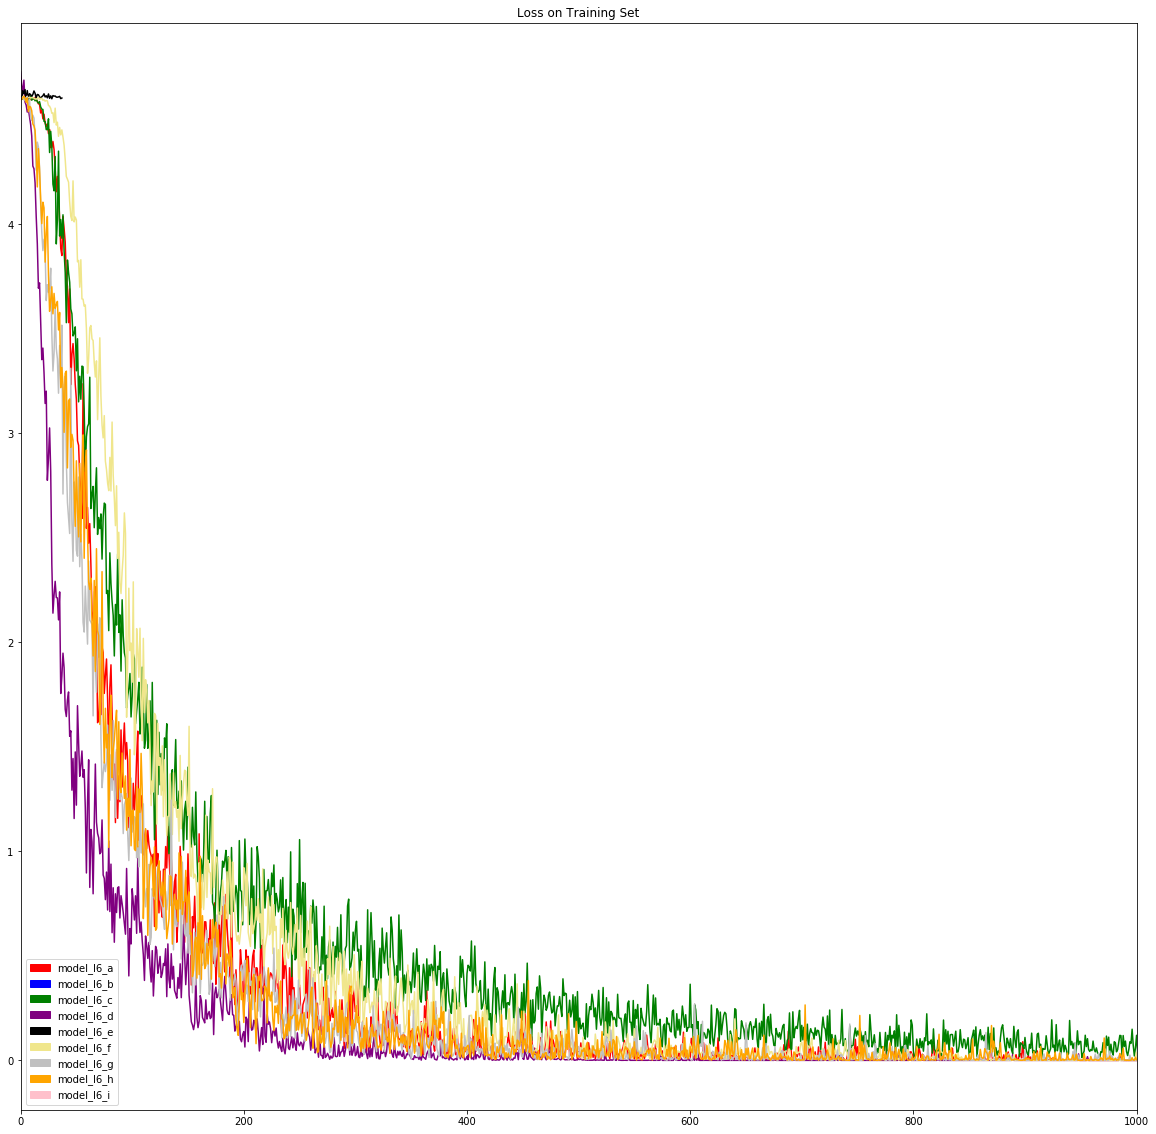

In [24]:
plt.figure(figsize=(20, 20))
plt.legend(handles=[red_patch,blue_patch,green_patch,purple_patch,black_patch,khaki_patch,silver_patch,orange_patch,pink_patch]
           , loc = 'lower left')
plt.title('Loss on Training Set')
plt.plot(model_l6_a.all_losses, 'red')
plt.plot(model_l6_b.all_losses, 'blue')
plt.plot(model_l6_c.all_losses, 'green')
plt.plot(model_l6_d.all_losses, 'purple')
plt.plot(model_l6_e.all_losses, 'black')
plt.plot(model_l6_f.all_losses, 'khaki')
plt.plot(model_l6_g.all_losses, 'silver')
plt.plot(model_l6_h.all_losses, 'orange')
# plt.plot(model_l6_i.all_losses, 'pink')

plt.xlim(0,1000)
plt.show()

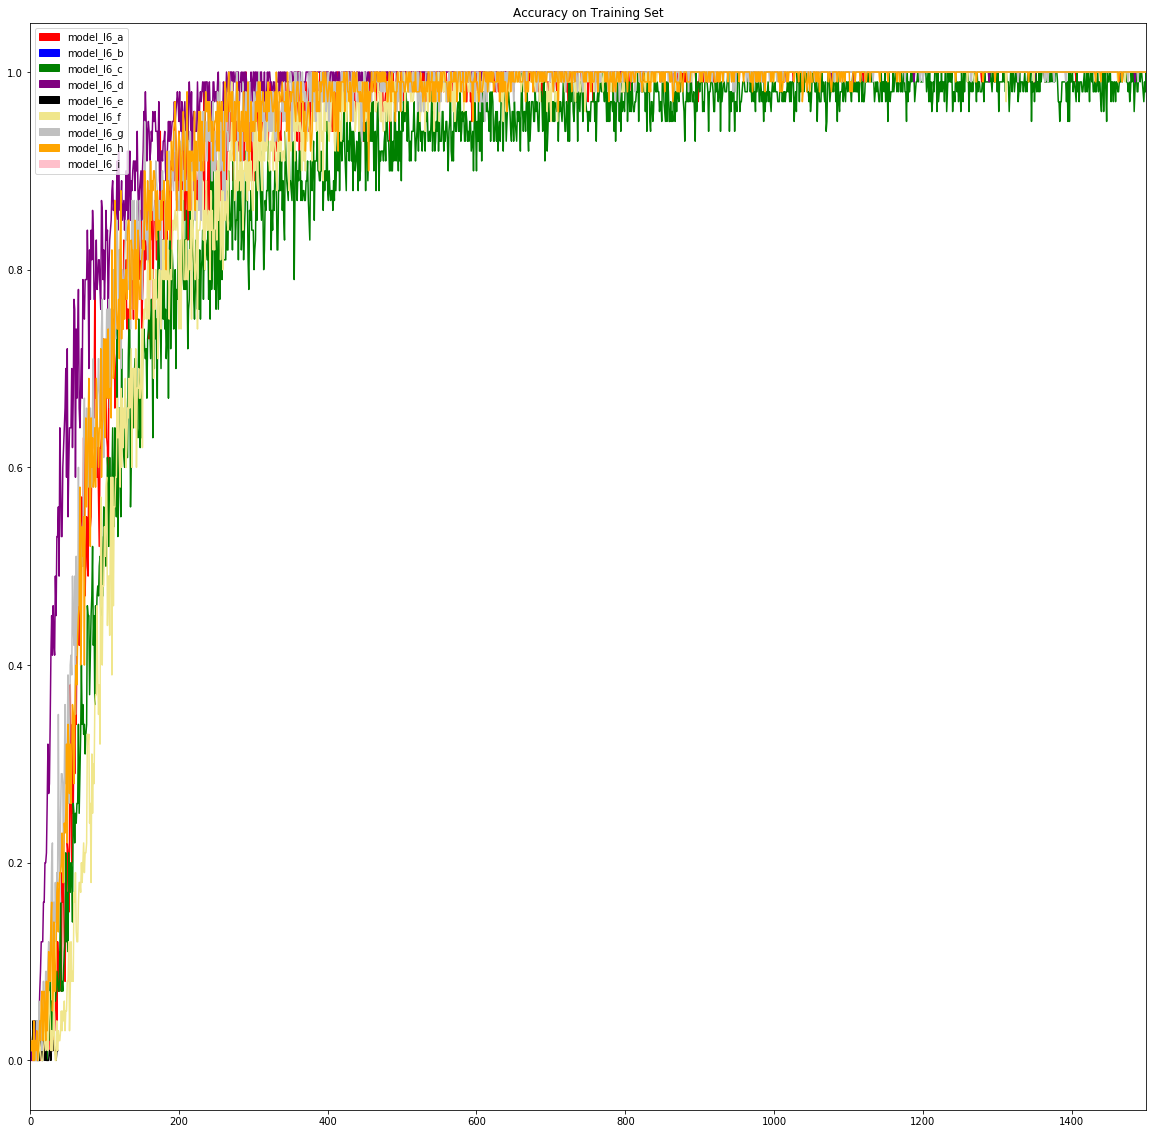

In [22]:
plt.figure(figsize=(20, 20))
plt.legend(handles=[red_patch,blue_patch,green_patch,purple_patch,black_patch,khaki_patch,silver_patch,orange_patch,pink_patch]
           , loc = 'upper left')
plt.title('Accuracy on Training Set')
plt.plot(model_l6_a.train_accuracy, 'red')
plt.plot(model_l6_b.train_accuracy, 'blue')
plt.plot(model_l6_c.train_accuracy, 'green')
plt.plot(model_l6_d.train_accuracy, 'purple')
plt.plot(model_l6_e.train_accuracy, 'black')
plt.plot(model_l6_f.train_accuracy, 'khaki')
plt.plot(model_l6_g.train_accuracy, 'silver')
plt.plot(model_l6_h.train_accuracy, 'orange')
plt.plot(model_l6_i.train_accuracy, 'pink')
plt.xlim(0,1500)
plt.show()

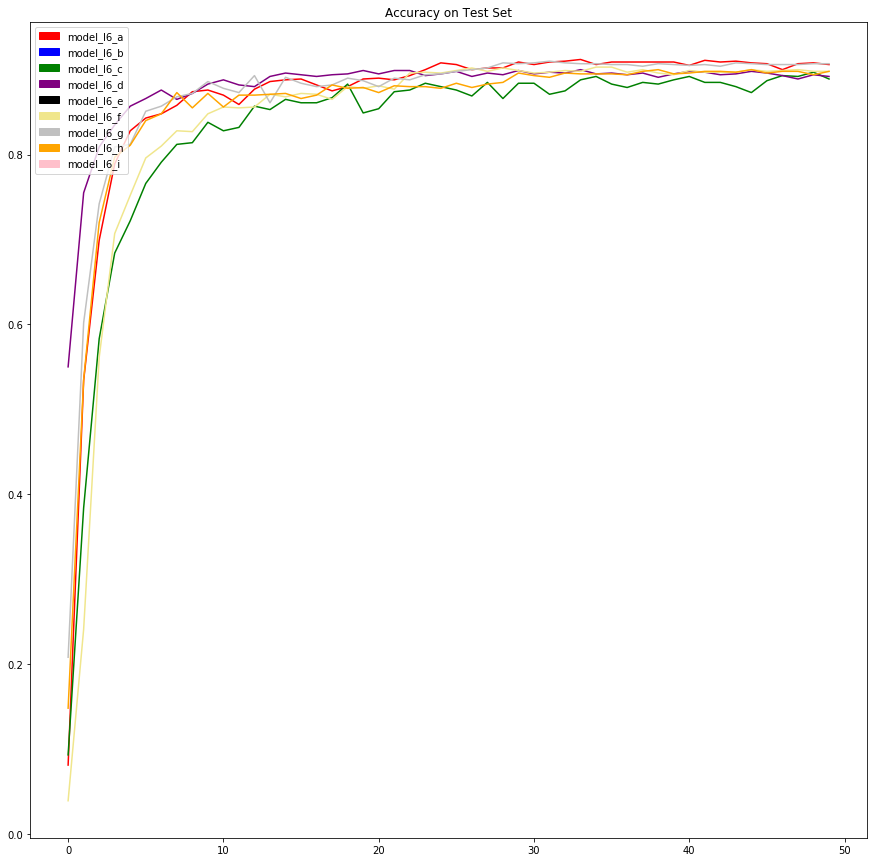

In [21]:
plt.figure(figsize=(15, 15))
plt.legend(handles=[red_patch,blue_patch,green_patch,purple_patch,black_patch,khaki_patch,silver_patch,orange_patch,pink_patch]
           , loc = 'upper left')
plt.title('Accuracy on Test Set')
plt.plot(model_l6_a.test_accuracy, 'red')
plt.plot(model_l6_b.test_accuracy, 'blue')
plt.plot(model_l6_c.test_accuracy, 'green')
plt.plot(model_l6_d.test_accuracy, 'purple')
plt.plot(model_l6_e.test_accuracy, 'black')
plt.plot(model_l6_f.test_accuracy, 'khaki')
plt.plot(model_l6_g.test_accuracy, 'silver')
plt.plot(model_l6_h.test_accuracy, 'orange')
plt.plot(model_l6_i.test_accuracy, 'pink')
# plt.xlim(0,30)
plt.show()

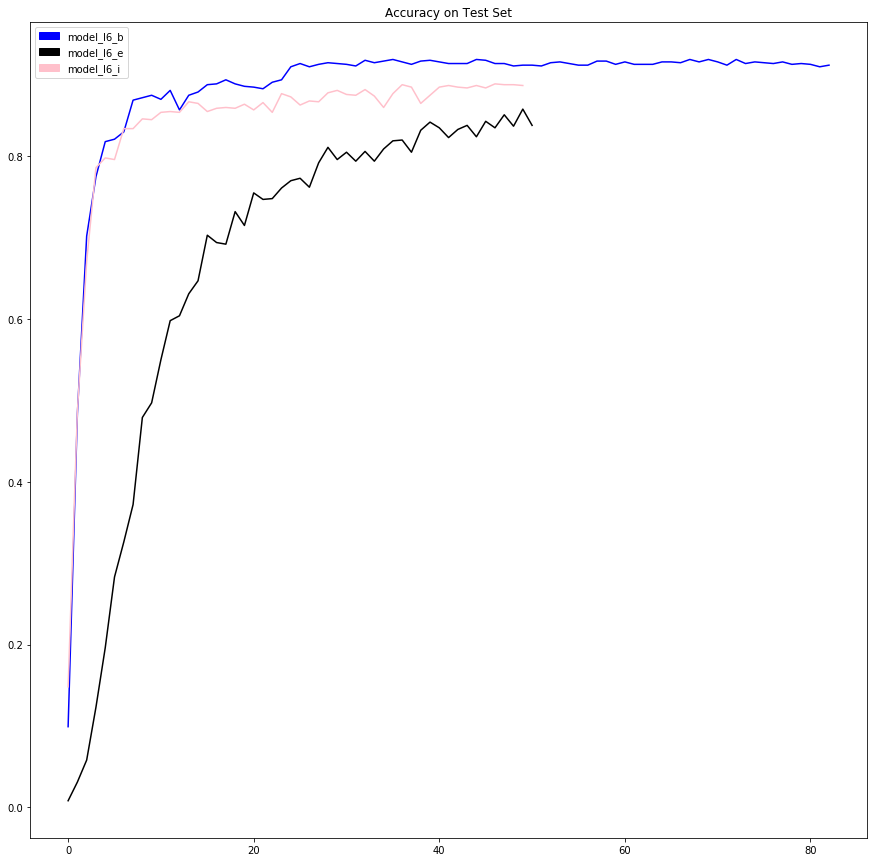

In [93]:
plt.figure(figsize=(15, 15))
plt.legend(handles=[blue_patch,black_patch,pink_patch]
           , loc = 'upper left')
plt.title('Accuracy on Test Set')
plt.plot(model_l6_a.test_accuracy, 'red')
plt.plot(model_l6_b.test_accuracy, 'blue')
plt.plot(model_l6_c.test_accuracy, 'green')
plt.plot(model_l6_d.test_accuracy, 'purple')
plt.plot(model_l6_e.test_accuracy, 'black')
plt.plot(model_l6_f.test_accuracy, 'khaki')
plt.plot(model_l6_g.test_accuracy, 'silver')
plt.plot(model_l6_h.test_accuracy, 'orange')
plt.plot(model_l6_i.test_accuracy, 'pink')
# plt.xlim(0,30)
plt.show()

In [87]:
def AccuracyHelperTop5(model,dataset):
    count = 0
    for batch_idx, (data,target) in enumerate(dataset):
        data, target = Variable(data.cuda()), Variable(target.cuda())
        y_pred = model(data)#model
        prediction, index = torch.topk(F.softmax(y_pred), 5)    
        pred_y = index.cpu().data.numpy().squeeze()
        target_y = target.cpu().data.numpy()
        for i in range(100):
            for x in pred_y[i]:
                if x == target_y[i]:
                    count += 1
#         count += sum(pred_y == target_y)
    accuracy = float(count)/float(batch_size*len(dataset))
    model.test_accuracy.append(accuracy)
    print('accuracy on test set: {:.3f}%'.format(100*accuracy),count)

In [95]:
model.cuda()
AccuracyHelperTop5(model,dataloaders['validation'])

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:6: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


accuracy on test set: 97.200% 972


In [16]:
AccuracyHelper(model_l6_e,dataloaders['test'])

accuracy on test set: 83.800% 838


In [37]:
AccuracyHelper(model_l6_b,dataloaders['validation'])

accuracy on test set: 91.200% 912


In [47]:
model = ConvNet_HBN_A()
model.load_state_dict(torch.load('./net.pth'))